# Preparation

## Load Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
%matplotlib inline
from pandas.plotting import scatter_matrix as sm
import seaborn as sns
import matplotlib.cm as cm

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
dataset = pd.read_excel('/content/drive/My Drive/Colab Notebooks/ta_rizal/kuesioner_1.xlsx')

In [ ]:
dataset.head()

No    Nama  Usia kabupaten Jenis Kelamin Pendidikan Terakhir  \
0   1  Ngatno    50  Boyolali     Laki-laki                 SMP   
1   2   Suyut    65  Boyolali     Laki-laki                  SD   
2   3   Sumar    40  Boyolali     Laki-laki                  SD   
3   4  Jumadi    50  Boyolali     Laki-laki                  SD   
4   5    wagi    38  Boyolali     Laki-laki                  SD   

   Lama menjadi petani bawang merah? Apakah merupakan anggota kelompok tani?  \
0                               30.0                                      Ya   
1                               50.0                                      Ya   
2                               20.0                                      Ya   
3                               20.0                                      Ya   
4                               23.0                                      Ya   

  Status Kepemilikan lahan  status_lahan_sendiri  status_lahan_bagi_hasil  \
0           Milik sendiri                      1                        0   
1           Milik sendiri                      1                        0   
2           Milik sendiri                      1                        0   
3           Milik sendiri                      1                        0   
4      Milik sendiri, Sewa                     1                        0   

   status_lahan_sewa  Luas Lahan bawang merah (m2)  \
0                  0                        7000.0   
1                  0                        3000.0   
2                  0                         800.0   
3                  0                        2000.0   
4                  1                        2000.0   

   Berapa lama penanaman bawang merah hingga panen per musim tanam? (hari)  \
0                                               60.0                         
1                                               60.0                         
2                                               60.0                         
3                                               60.0                         
4                                               60.0                         

   Rata-rata hasil panen bawng merah permusim (Kg)  \
0                                           1000.0   
1                                           2000.0   
2                                            600.0   
3                                           2000.0   
4                                            700.0   

   Berapa kali dalam satu tahun menanam bawang merah  \
0                                                2.0   
1                                                2.0   
2                                                3.0   
3                                                3.0   
4                                                2.0   

  Bulan dilakukan Penanaman  bulan_tanam_januari  bulan_tanam_februari  \
0         Januari, Desember                    1                     0   
1           Maret, Desember                    0                     0   
2    Maret, April, Desember                    0                     0   
3    Maret, April, Desember                    0                     0   
4                  Februari                    0                     1   

   bulan_tanam_maret  bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  \
0                  0                  0                0                 0   
1                  1                  0                0                 0   
2                  1                  1                0                 0   
3                  1                  1                0                 0   
4                  0                  0                0                 0   

   bulan_tanam_juli  bulan_tanam_agustus  bulan_tanam_september  \
0                 0                    0                      0   
1                 0                    0                      0   
2                 0                    0                      0   
3                 

Penjelasan maksud pada tiap kolom

## Preprocessing
disini ada beberapa kolom bertype object, yang kosong, maka perlu diperbaiki terlebih dahulu

### Rename Field

In [ ]:
dataset.rename(columns={'Lama menjadi petani bawang merah?':'durasi_petani','Apakah merupakan anggota kelompok tani?':'anggota_kelompok_tani',
                        'Luas Lahan bawang merah (m2)':'luas_lahan','Berapa lama penanaman bawang merah hingga panen per musim tanam? (hari)':'lama_tanam_hari',
                        'Rata-rata hasil panen bawng merah permusim (Kg)':'panen_kg','Berapa kali dalam satu tahun menanam bawang merah':'kali_tanam',
                        'Berapa kilogram bibit bawang merah yang anda butuhkan dalam satu musim tanam?':'bibit_kg',
                        'Berapa kilogram rata-rata pupuk yang anda butuhkan dalam satu musim tanam':'pupuk_kg',
                        'sumber_pupuk_toko_pertanian':'sumber_pupuk_anorganik_toko_pertanian','sumber_pupuk_kelompok_tani':'sumber_pupuk_anorganik_kelompok_tani','sumber_pupuk_peternak':'sumber_pupuk_anorganik_peternak',
                        'tempat_beli_toko_obat_pertanian':'beli_pestisida_toko_obat_pertanian', 'tempat_beli_kelompok_tani':'beli_pestisida_kelompok_tani'},inplace=True)

In [ ]:
df = dataset[['Nama','Usia','kabupaten','Jenis Kelamin','Pendidikan Terakhir','durasi_petani','anggota_kelompok_tani','status_lahan_sendiri','status_lahan_bagi_hasil','status_lahan_sewa','luas_lahan','lama_tanam_hari',
              'panen_kg','kali_tanam','pupuk_kg',
              'bulan_tanam_januari','bulan_tanam_februari','bulan_tanam_maret','bulan_tanam_april','bulan_tanam_mei','bulan_tanam_juni','bulan_tanam_juli','bulan_tanam_agustus','bulan_tanam_september','bulan_tanam_oktober','bulan_tanam_november','bulan_tanam_desember','bibit_kg',
              'varietas_bima_brebes','varietas_batu_karet','varietas_bali_karet','varietas_batu_ijo','varietas_putih','varietas_garut','varietas_tanjuk','varietas_bima_jokowi','varietas_bima_juna','varietas_bima_curut','varietas_bima_jaya','varietas_nganjuk',
              'modal_tanam_sendiri','modal_tanam_pinjam','jenis_pupuk_organik','jenis_pupuk_anorganik',
              'sumber_pupuk_organik_bantuan','sumber_pupuk_organik_beli_dipeternak','sumber_pupuk_organik_kompos','sumber_pupuk_organik_buat_sendiri','sumber_pupuk_organik_kelompok_tani','sumber_pupuk_organik_toko_pertanian','sumber_pupuk_organik_kotoran_ayam','sumber_pupuk_organik_kotoran_sapi','sumber_pupuk_organik_kotoran_kambing','sumber_pupuk_organik_kotoran_hewan',
              'sumber_pupuk_anorganik_toko_pertanian','sumber_pupuk_anorganik_kelompok_tani','sumber_pupuk_anorganik_peternak',
              'merk_pupuk_bio_to_grow','merk_pupuk_dgw',
              'merk_pupuk_mutiara','merk_pupuk_meganic','merk_pupuk_phoska','merk_pupuk_saprodap','merk_pupuk_hcl','merk_pupuk_kamas','merk_pupuk_meroke','merk_pupuk_pak_tani','merk_pupuk_lao_ying','merk_pupuk_mkp','merk_pupuk_phonska','merk_pupuk_za','merk_pupuk_dap','merk_pupuk_golden_max','merk_pupuk_kcl','merk_pupuk_mahkota','merk_pupuk_npk','merk_pupuk_sp36','merk_pupuk_subur_kali','merk_pupuk_ksn','merk_pupuk_petroganik','merk_pupuk_luar_negeri','merk_pupuk_randex','merk_pupuk_urea','merk_pupuk_fosfat',
              'hama_engkuk','hama_lalat','hama_grandong','hama_ulat','hama_kutu','hama_tikus','hama_wereng','hama_amitra_nosa','hama_belalang','hama_serangga',
              'penyakit_akar_busuk','penyakit_trotol','penyakit_akar_rusak','penyakit_daun_busuk','penyakit_buah_busuk','penyakit_daun_layu','penyakit_busuk_batang','penyakit_daun_bercak','penyakit_daun_kemerahan','penyakit_umbi_busuk','penyakit_fusarium','penyakit_inul','penyakit_jamur','penyakit_mulet','penyakit_rencek','penyakit_semu_kuning','penyakit_krapak','penyakit_pohon_kering','penyakit_pucuk_menguning',
              'beli_pestisida_toko_obat_pertanian','beli_pestisida_kelompok_tani',
              'pengairan_hujan','pengairan_irigasi','pengairan_sungai','pengairan_mata_air','pengairan_sumur',
              'setelah_panen_dijual','setelah_panen_disimpan','setelah_panen_tebas',
              'jual_pasar','jual_pengepul','jual_penggoreng','jual_penebas','jual_ecer','jual_pedagang'
              ]]

In [ ]:
# df.rename(columns={'Nama':'name','Usia':'age','kabupaten':'districts','Jenis Kelamin':'gender','Pendidikan Terakhir':'education','durasi_petani':'farmer_duration','anggota_kelompok_tani':'farmer_group',
#                    'status_lahan_sendiri':'land_status_own','status_lahan_bagi_hasil':'land_status_profit_sharing','status_lahan_sewa':'land_status_rent','luas_lahan':'land_area','lama_tanam_hari':'planting_time_day',
#                    'kali_tanam':'planting_times','panen_kg':'harvest_result_kg','bibit_kg':'seed_kg','pupuk_kg':'fertilizer_kg',
#                    'bulan_tanam_januari':'planting_month_january','bulan_tanam_februari':'planting_month_february','bulan_tanam_maret':'planting_month_march','bulan_tanam_april':'planting_month_april','bulan_tanam_mei':'planting_month_may','bulan_tanam_juni':'planting_month_june','bulan_tanam_juli':'planting_month_july','bulan_tanam_agustus':'planting_month_august','bulan_tanam_september':'planting_month_september','bulan_tanam_oktober':'planting_month_october','bulan_tanam_november':'planting_month_november','bulan_tanam_desember':'planting_month_desember',
#                    'varietas_bima_brebes':'variety_bima_brebes','varietas_batu_karet':'variety_batu_karet','varietas_bali_karet':'variety_bali_karet','varietas_batu_ijo':'variety_batu_ijo','varietas_putih':'variety_putih','varietas_garut':'variety_garut','varietas_tanjuk':'variety_tanjuk','varietas_bima_jokowi':'variety_bima_jokowi','varietas_bima_juna':'variety_bima_juna','varietas_bima_curut':'variety_bima_curut','varietas_bima_jaya':'variety_bima_jaya','varietas_nganjuk':'variety_nganjuk',
#                    'modal_tanam_sendiri':'planting_capital_own','modal_tanam_pinjam':'planting_capital_rent','jenis_pupuk_organik':'fertilizer_type_organic','jenis_pupuk_anorganik':'fertilizer_type_inorganic',
#                    'sumber_pupuk_organik_bantuan':'organic_fertilizer_source_support','sumber_pupuk_organik_beli_dipeternak':'organic_fertilizer_source_breeder','sumber_pupuk_organik_kompos':'organic_fertilizer_source_compost','sumber_pupuk_organik_buat_sendiri':'organic_fertilizer_source_byself','sumber_pupuk_organik_kelompok_tani':'organic_fertilizer_source_farmer_group','sumber_pupuk_organik_toko_pertanian':'organic_fertilizer_source_agriculture_store','sumber_pupuk_organik_kotoran_ayam':'organic_fertilizer_source_chicken_feces','sumber_pupuk_organik_kotoran_sapi':'organic_fertilizer_source_cow_feces','sumber_pupuk_organik_kotoran_kambing':'organic_fertilizer_source_goat_feces','sumber_pupuk_organik_kotoran_hewan':'organic_fertilizer_source_animal_feces',
#                    'sumber_pupuk_anorganik_toko_pertanian':'inorganic_fertilizer_source_agriculture_store','sumber_pupuk_anorganik_kelompok_tani':'inorganic_fertilizer_source_farmer_group','sumber_pupuk_anorganik_peternak':'inorganic_fertilizer_source_breeder',
#                    'merk_pupuk_bio_to_grow':'fertilizer_brand_bio_to_grow','merk_pupuk_dgw':'fertilizer_brand_dgw','merk_pupuk_mutiara':'fertilizer_brand_mutiara','merk_pupuk_meganic':'fertilizer_brand_meganic','merk_pupuk_phoska':'fertilizer_brand_phoska','merk_pupuk_saprodap':'fertilizer_brand_saprodap','merk_pupuk_hcl':'fertilizer_brand_hcl','merk_pupuk_kamas':'fertilizer_brand_kamas','merk_pupuk_meroke':'fertilizer_brand_meroke','merk_pupuk_pak_tani':'fertilizer_brand_pak_tani','merk_pupuk_lao_ying':'fertilizer_brand_lao_ying','merk_pupuk_mkp':'fertilizer_brand_mkp','merk_pupuk_phonska':'fertilizer_brand_phonska','merk_pupuk_za':'fertilizer_brand_za','merk_pupuk_dap':'fertilizer_brand_dap','merk_pupuk_golden_max':'fertilizer_brand_golden_max','merk_pupuk_kcl':'fertilizer_brand_kcl','merk_pupuk_mahkota':'fertilizer_brand_mahkota','merk_pupuk_npk':'fertilizer_brand_npk','merk_pupuk_sp36':'fertilizer_brand_sp36','merk_pupuk_subur_kali':'fertilizer_brand_subur_kali','merk_pupuk_ksn':'fertilizer_brand_ksn','merk_pupuk_petroganik':'fertilizer_brand_petroganik','merk_pupuk_luar_negeri':'fertilizer_brand_foreign','merk_pupuk_randex':'fertilizer_brand_randex','merk_pupuk_urea':'fertilizer_brand_urea','merk_pupuk_fosfat':'fertilizer_brand_fosfat',
#                    'hama_engkuk':'pest_engkuk','hama_lalat':'pest_fly','hama_grandong':'pest_grandong','hama_ulat':'pest_caterpillar','hama_kutu':'pest_flea','hama_tikus':'pest_rat','hama_wereng':'pest_wereng','hama_amitra_nosa':'pest_amitra_nosa','hama_belalang':'pest_grasshopper','hama_serangga':'pest_insect',
#                    'penyakit_akar_busuk':'disease_rotten_root','penyakit_trotol':'disease_trotol','penyakit_akar_rusak':'disease_broken_root','penyakit_daun_busuk':'disease_rotten_leaves','penyakit_buah_busuk':'disease_rotten_fruit','penyakit_daun_layu':'disease_withered_leaves','penyakit_busuk_batang':'disease_rotten_stem','penyakit_daun_bercak':'disease_spotting_leaves','penyakit_daun_kemerahan':'disease_reddish_leaves','penyakit_umbi_busuk':'disease_rotten_tubers','penyakit_fusarium':'disease_fusarium','penyakit_inul':'disease_inul','penyakit_jamur':'disease_fungus','penyakit_mulet':'disease_mulet','penyakit_rencek':'disease_rencek','penyakit_semu_kuning':'disease_pseudo_yellow','penyakit_krapak':'disease_krapak','penyakit_pohon_kering':'disease_dry_tree','penyakit_pucuk_menguning':'disease_yellow_shoots',
#                    'tempat_beli_toko_obat_pertanian':'buy_pesticide_agriculture_store','tempat_beli_kelompok_tani':'buy_pesticide_farmer_group',
#                    'pengairan_hujan':'watering_source_rain','pengairan_irigasi':'watering_source_irrigation','pengairan_sungai':'watering_source_river','pengairan_mata_air':'watering_source_water_springs','pengairan_sumur':'well',
#                    'setelah_panen_dijual':'after_harvest_sell','setelah_panen_disimpan':'after_harvest_stored','setelah_panen_tebas':'after_harvest_by_whole',
#                    'jual_pasar':'sell_market','jual_pengepul':'sell_collector','jual_penggoreng':'sell_fryer','jual_penebas':'sell_by_whole','jual_ecer':'sell_retail','jual_pedagang':'sell_merchant'
# },inplace=True)

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 129 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    Nama                                   176 non-null    object 
 1    Usia                                   176 non-null    int64  
 2    kabupaten                              176 non-null    object 
 3    Jenis Kelamin                          176 non-null    object 
 4    Pendidikan Terakhir                    173 non-null    object 
 5    durasi_petani                          156 non-null    float64
 6    anggota_kelompok_tani                  173 non-null    object 
 7    status_lahan_sendiri                   176 non-null    int64  
 8    status_lahan_bagi_hasil                176 non-null    int64  
 9    status_lahan_sewa                      176 non-null    int64  
 10   luas_lahan                             168 non-null    float

In [ ]:
df.loc[:, df.isnull().any()].columns

Index(['Pendidikan Terakhir', 'durasi_petani', 'anggota_kelompok_tani',
       'luas_lahan', 'lama_tanam_hari', 'panen_kg', 'kali_tanam', 'pupuk_kg',
       'bibit_kg'],
      dtype='object')

<Axes: >

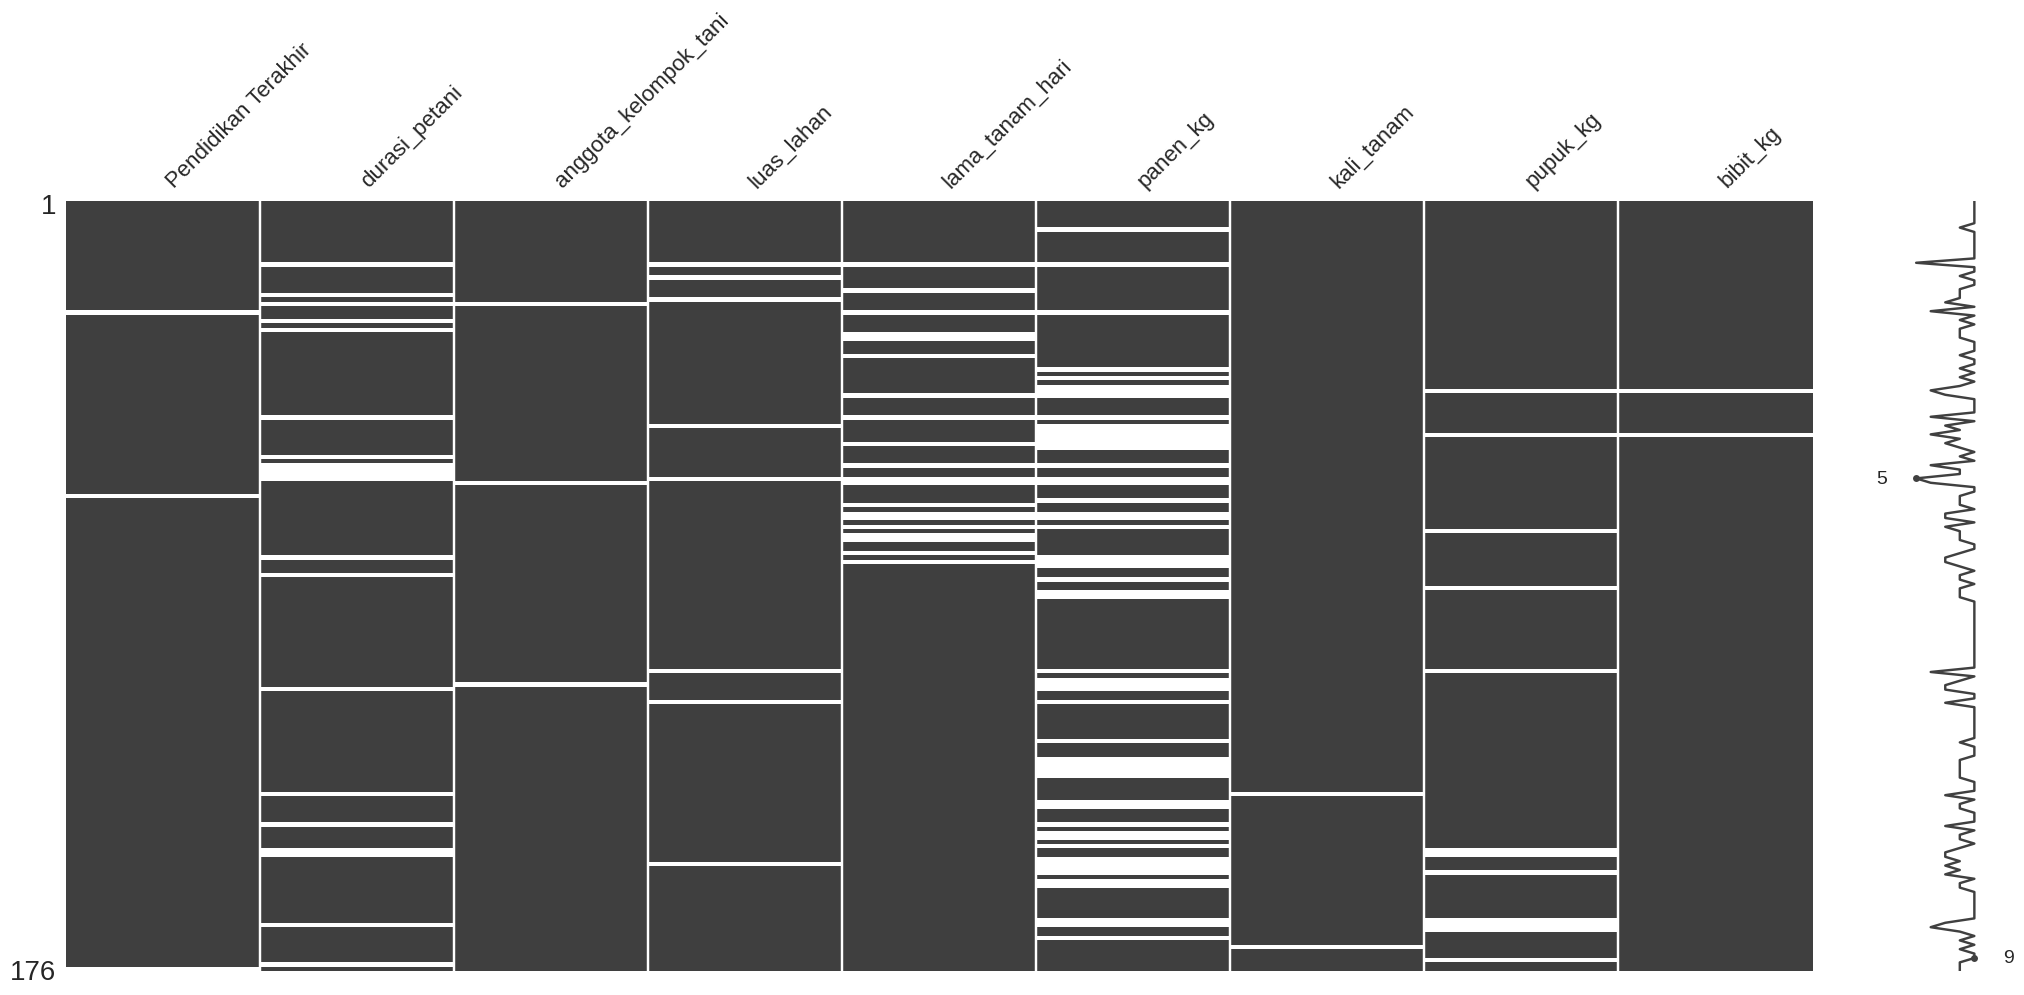

In [ ]:
import missingno
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
df.iloc[25,:]

Nama                                         Marmi
Usia                                            70
kabupaten                                 Boyolali
Jenis Kelamin                            Perempuan
Pendidikan Terakhir                            NaN
durasi_petani                                 50.0
anggota_kelompok_tani                           Ya
status_lahan_sendiri                             1
status_lahan_bagi_hasil                          0
status_lahan_sewa                                0
luas_lahan                                  1000.0
lama_tanam_hari                                NaN
panen_kg                                       NaN
kali_tanam                                     2.0
pupuk_kg                                     600.0
bulan_tanam_januari                              0
bulan_tanam_februari                             0
bulan_tanam_maret                                0
bulan_tanam_april                                0
bulan_tanam_mei                

### memperbaiki Rata-rata hasil panen bawng merah permusim (Kg)

In [ ]:
median_value=df['panen_kg'].median()
df['panen_kg']=df['panen_kg'].fillna(median_value)

<ipython-input-59-3245659ce598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['panen_kg']=df['panen_kg'].fillna(median_value)


### memperbaiki Berapa lama penanaman bawang merah hingga panen per musim tanam? (hari)

In [ ]:
median_value=df['lama_tanam_hari'].median()
df['lama_tanam_hari']=df['lama_tanam_hari'].fillna(median_value)

<ipython-input-60-64b3f7fb1f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lama_tanam_hari']=df['lama_tanam_hari'].fillna(median_value)


### memperbaiki Lama menjadi petani bawang merah?

In [ ]:
median_value=df['durasi_petani'].median()
df['durasi_petani']=df['durasi_petani'].fillna(median_value)

<ipython-input-61-61eda1a60717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['durasi_petani']=df['durasi_petani'].fillna(median_value)


### memperbaiki Berapa kilogram bibit bawang merah yang anda butuhkan dalam satu musim tanam?

In [ ]:
median_value=df['bibit_kg'].median()
df['bibit_kg']=df['bibit_kg'].fillna(median_value)

<ipython-input-62-3ca31090bbe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bibit_kg']=df['bibit_kg'].fillna(median_value)


### memperbaiki Luas Lahan bawang merah (m2)

In [ ]:
median_value=df['luas_lahan'].median()
df['luas_lahan']=df['luas_lahan'].fillna(median_value)

<ipython-input-63-62ccddeada41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luas_lahan']=df['luas_lahan'].fillna(median_value)


### memperbaiki Berapa kilogram rata-rata pupuk yang anda butuhkan dalam satu musim tanam

In [ ]:
median_value=df['pupuk_kg'].median()
df['pupuk_kg']=df['pupuk_kg'].fillna(median_value)

<ipython-input-64-d9199b37c557>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pupuk_kg']=df['pupuk_kg'].fillna(median_value)


### memperbaiki Berapa kali dalam satu tahun menanam bawang merah

In [ ]:
median_value=df['kali_tanam'].median()
df['kali_tanam']=df['kali_tanam'].fillna(median_value)

<ipython-input-65-b910952cd4a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kali_tanam']=df['kali_tanam'].fillna(median_value)


### memperbaiki Pendidikan terakhir

In [ ]:
df['Pendidikan Terakhir'].value_counts()

SD          75
SMA         43
SMP         42
Lulus SD    10
Diploma      2
Sarjana      1
Name: Pendidikan Terakhir, dtype: int64

karena sebagian besar lulus SD, maka nilai yang hilang diganti dengan **SD** (menggunakan Mode)

In [ ]:
df['Pendidikan Terakhir'] = df['Pendidikan Terakhir'].fillna(df['Pendidikan Terakhir'].mode()[0])

<ipython-input-67-0e42f8928383>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pendidikan Terakhir'] = df['Pendidikan Terakhir'].fillna(df['Pendidikan Terakhir'].mode()[0])


In [ ]:
df['Pendidikan Terakhir'].value_counts()

SD          78
SMA         43
SMP         42
Lulus SD    10
Diploma      2
Sarjana      1
Name: Pendidikan Terakhir, dtype: int64

### memperbaiki anggota kelompok tani

In [ ]:
df['anggota_kelompok_tani'].value_counts()

Ya       162
Tidak     11
Name: anggota_kelompok_tani, dtype: int64

In [ ]:
df['anggota_kelompok_tani'] = df['anggota_kelompok_tani'].fillna(df['anggota_kelompok_tani'].mode()[0])

<ipython-input-70-f882ebedfc43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anggota_kelompok_tani'] = df['anggota_kelompok_tani'].fillna(df['anggota_kelompok_tani'].mode()[0])


### cek kembali apakah ada yang kosong

In [ ]:
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 129 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    Nama                                   176 non-null    object 
 1    Usia                                   176 non-null    int64  
 2    kabupaten                              176 non-null    object 
 3    Jenis Kelamin                          176 non-null    object 
 4    Pendidikan Terakhir                    176 non-null    object 
 5    durasi_petani                          176 non-null    float64
 6    anggota_kelompok_tani                  176 non-null    object 
 7    status_lahan_sendiri                   176 non-null    int64  
 8    status_lahan_bagi_hasil                176 non-null    int64  
 9    status_lahan_sewa                      176 non-null    int64  
 10   luas_lahan                             176 non-null    float

### hapus duplikat

tidak digunakan, karena bisa jadi, ada 2 petani atau lebih, yang mempunyai karakteristik yang sama, dan tujuan cluster ini, adalah mengetahui, petani tersebut masuk ke cluster mana.

sehingga jika data duplikat di drop, maka akan kehilangan informasi petani yang di drop

In [ ]:
# df = df.drop_duplicates()

tidak ada data duplikat

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean = df_clean.drop('Nama', axis=1)

In [ ]:
df_clean = df_clean.drop('beli_pestisida_toko_obat_pertanian', axis=1)

In [ ]:
df_clean = df_clean.drop('beli_pestisida_kelompok_tani', axis=1)

In [ ]:
df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 126 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    Usia                                   int64  
 1    kabupaten                              object 
 2    Jenis Kelamin                          object 
 3    Pendidikan Terakhir                    object 
 4    durasi_petani                          float64
 5    anggota_kelompok_tani                  object 
 6    status_lahan_sendiri                   int64  
 7    status_lahan_bagi_hasil                int64  
 8    status_lahan_sewa                      int64  
 9    luas_lahan                             float64
 10   lama_tanam_hari                        float64
 11   panen_kg                               float64
 12   kali_tanam                             float64
 13   pupuk_kg                               float64
 14   bulan_tanam_januari                    i

### Konversi Nilai

In [ ]:
categorical_col = []
for column in df_clean.columns:
    if df_clean[column].dtype == object and len(df_clean[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df_clean[column].unique()}")
        print("====================================")

kabupaten : ['Boyolali' 'Demak' 'Kendal' 'Brebes' 'Temanggung']
Jenis Kelamin : ['Laki-laki' 'Perempuan']
Pendidikan Terakhir : ['SMP' 'SD' 'SMA' 'Diploma' 'Sarjana' 'Lulus SD']
anggota_kelompok_tani : ['Ya' 'Tidak']


### konversi kabupaten

In [ ]:
kab_dict = {'Boyolali':1,'Demak':2,'Kendal':3,'Brebes':4,'Temanggung':5}
df_clean['kabupaten'] = df['kabupaten'].map(kab_dict)

### konversi Jenis Kelamin

In [ ]:
jk_dict = {'Laki-laki':1,'Perempuan':0}
df_clean['Jenis Kelamin'] = df['Jenis Kelamin'].map(jk_dict)

### konversi Pendidikan terakhir
disini ada SD dan lulus SD, kita masukkan menjadi 1 variabel

In [ ]:
pendidikan_dict = {'Tidak lulus SD':0,'SD':1,'Lulus SD':1, 'SMP':2, 'SMA':3, 'Diploma':4, 'Sarjana':5}
df_clean['Pendidikan Terakhir'] = df['Pendidikan Terakhir'].map(pendidikan_dict)

### konversi kelompok tani

In [ ]:
kelompok_dict = {'Ya':1,'Tidak':0}
df_clean['anggota_kelompok_tani'] = df['anggota_kelompok_tani'].map(kelompok_dict)

### cek finalisasi

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Columns: 126 entries, Usia to jual_pedagang
dtypes: float64(7), int64(119)
memory usage: 173.4 KB


In [ ]:
df_clean.head()

Usia  kabupaten  Jenis Kelamin  Pendidikan Terakhir  durasi_petani  \
0    50          1              1                    2           30.0   
1    65          1              1                    1           50.0   
2    40          1              1                    1           20.0   
3    50          1              1                    1           20.0   
4    38          1              1                    1           23.0   

   anggota_kelompok_tani  status_lahan_sendiri  status_lahan_bagi_hasil  \
0                      1                     1                        0   
1                      1                     1                        0   
2                      1                     1                        0   
3                      1                     1                        0   
4                      1                     1                        0   

   status_lahan_sewa  luas_lahan  lama_tanam_hari  panen_kg  kali_tanam  \
0                  0      7000.0             60.0    1000.0         2.0   
1                  0      3000.0             60.0    2000.0         2.0   
2                  0       800.0             60.0     600.0         3.0   
3                  0      2000.0             60.0    2000.0         3.0   
4                  1      2000.0             60.0     700.0         2.0   

   pupuk_kg  bulan_tanam_januari  bulan_tanam_februari  bulan_tanam_maret  \
0     200.0                    1                     0                  0   
1     350.0                    0                     0                  1   
2      50.0                    0                     0                  1   
3      50.0                    0                     0                  1   
4     250.0                    0                     1                  0   

   bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  bulan_tanam_juli  \
0                  0                0                 0                 0   
1                  0                0                 0                 0   
2                  1                0                 0                 0   
3                  1                0                 0                 0   
4                  0                0                 0                 0   

   bulan_tanam_agustus  bulan_tanam_september  bulan_tanam_oktober  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   

   bulan_tanam_november  bulan_tanam_desember  bibit_kg  varietas_bima_brebes  \
0                     0                     1     200.0                     0   
1                     0                     1     350.0                     0   
2                     0                     1     500.0                     0   
3                     0                     1     250.0                     0   
4                     0                     0     250.0                     0   

   varietas_batu_karet  varietas_bali_karet  varietas_batu_ijo  \
0                    0                    1                  1   
1                    0                    0                  1   
2                    0                    1                  0   
3                    0                    0                  1   
4                    0                    0                  1   

   varietas_putih  varietas_garut  varietas_tanjuk  varietas_bima_jokowi  \
0               0               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               1                0                     0   
4               0               0                0 

In [ ]:
df_clean

Usia  kabupaten  Jenis Kelamin  Pendidikan Terakhir  durasi_petani  \
0      50          1              1                    2           30.0   
1      65          1              1                    1           50.0   
2      40          1              1                    1           20.0   
3      50          1              1                    1           20.0   
4      38          1              1                    1           23.0   
5      46          1              1                    1           25.0   
6      42          1              1                    1           27.0   
7      54          1              1                    1           20.0   
8      57          1              1                    1           50.0   
9      72          1              1                    1           58.0   
10     38          1              1                    3           22.0   
11     41          1              1                    1           17.0   
12     40          1              1                    1           30.0   
13     28          1              1                    3            8.0   
14     29          1              1                    3           10.0   
15     36          1              1                    3           10.0   
16     45          1              1                    3            5.0   
17     25          1              0                    2           10.0   
18     33          1              0                    2           15.0   
19     42          1              0                    1           25.0   
20     30          1              0                    3           10.0   
21     43          1              0                    1           10.0   
22     45          1              0                    1           15.0   
23     50          1              0                    1           10.0   
24     38          1              0                    1           15.0   
25     70          1              0                    1           50.0   
26     50          1              0                    1           30.0   
27     60          1              0                    1           10.0   
28     38          1              0                    1           25.0   
29     50          1              0                    3           10.0   
30     40          1              0                    1           21.0   
31     37          1              0                    3            5.0   
32     40          1              0                    1           22.0   
33     48          1              0                    1           25.0   
34     40          1              0                    1           25.0   
35     32          1              0                    4            9.0   
36     48          1              0                    2           25.0   
37     60          2              1                    1           15.0   
38     55          2              1                    1           50.0   
39     55          2              1                    3            7.0   
40     35          2              1                    3           10.0   
41     28          2              1                    3            7.0   
42     40          2              1                    2            5.0   
43     47          2              1                    3            5.0   
44     35          2              1                    5            5.0   
45     41          2              1                    3           10.0   
46     65          2              1                    1           50.0   
47     45          2              1                    2            2.0   
48     54          2              1                    1            6.0   
49     49          2              1                    2           10.0   
50     42          2              1                    1            4.0   
51     46          2              1                    1            3.0   
52     38          2          

In [ ]:
df_clean.describe()

Usia   kabupaten  Jenis Kelamin  Pendidikan Terakhir  \
count  176.000000  176.000000     176.000000           176.000000   
mean    46.687500    2.590909       0.880682             1.784091   
std     11.208112    1.344928       0.325087             0.893774   
min     16.000000    1.000000       0.000000             1.000000   
25%     38.000000    2.000000       1.000000             1.000000   
50%     46.000000    2.000000       1.000000             1.500000   
75%     54.000000    3.250000       1.000000             3.000000   
max     75.000000    5.000000       1.000000             5.000000   

       durasi_petani  anggota_kelompok_tani  status_lahan_sendiri  \
count     176.000000             176.000000            176.000000   
mean       13.710227               0.937500              0.761364   
std        10.993042               0.242752              0.427466   
min         1.000000               0.000000              0.000000   
25%         5.000000               1.000000              1.000000   
50%        10.000000               1.000000              1.000000   
75%        20.000000               1.000000              1.000000   
max        58.000000               1.000000              1.000000   

       status_lahan_bagi_hasil  status_lahan_sewa    luas_lahan  \
count               176.000000         176.000000    176.000000   
mean                  0.045455           0.284091   3906.789773   
std                   0.208893           0.452267   3340.212492   
min                   0.000000           0.000000    500.000000   
25%                   0.000000           0.000000   2000.000000   
50%                   0.000000           0.000000   2500.000000   
75%                   0.000000           1.000000   5000.000000   
max                   1.000000           1.000000  20000.000000   

       lama_tanam_hari      panen_kg  kali_tanam     pupuk_kg  \
count       176.000000    176.000000  176.000000   176.000000   
mean         65.511364   1907.954545    2.409091   379.431818   
std          14.122723   1612.662153    0.669949   303.467985   
min          30.000000    200.000000    1.000000    20.000000   
25%          60.000000   1000.000000    2.000000   200.000000   
50%          60.000000   1500.000000    2.000000   300.000000   
75%          71.250000   2000.000000    3.000000   500.000000   
max          90.000000  12000.000000    4.000000  1600.000000   

       bulan_tanam_januari  bulan_tanam_februari  bulan_tanam_maret  \
count           176.000000            176.000000         176.000000   
mean              0.119318              0.210227           0.193182   
std               0.325087              0.408632           0.395921   
min               0.000000              0.000000           0.000000   
25%               0.000000              0.000000           0.000000   
50%               0.000000              0.000000           0.000000   
75%               0.000000              0.000000           0.000000   
max               1.000000              1.000000           1.000000   

       bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  bulan_tanam_juli  \
count         176.000000       176.000000        176.000000        176.000000   
mean            0.142045         0.056818          0.039773          0.085227   
std             0.350093         0.232155          0.195982          0.280016   
min             0.000000         0.000000          0.000000          0.000000   
25%             0.000000         0.000000          0.000000          0.000000   
50%             0.000000         0.000000          0.000000          0.000000   
75%             0.000000         0.000000          0.000000          0.000000   
max             1.000000         1.000000          1.000000          1.000000   

       bulan_tanam_agustus  bulan_tanam_september  bulan_tanam_oktober  \
count           176.000000             176.000000           176.000000   
mean              0.096591               0.369318            

## EDA

### Box Plot

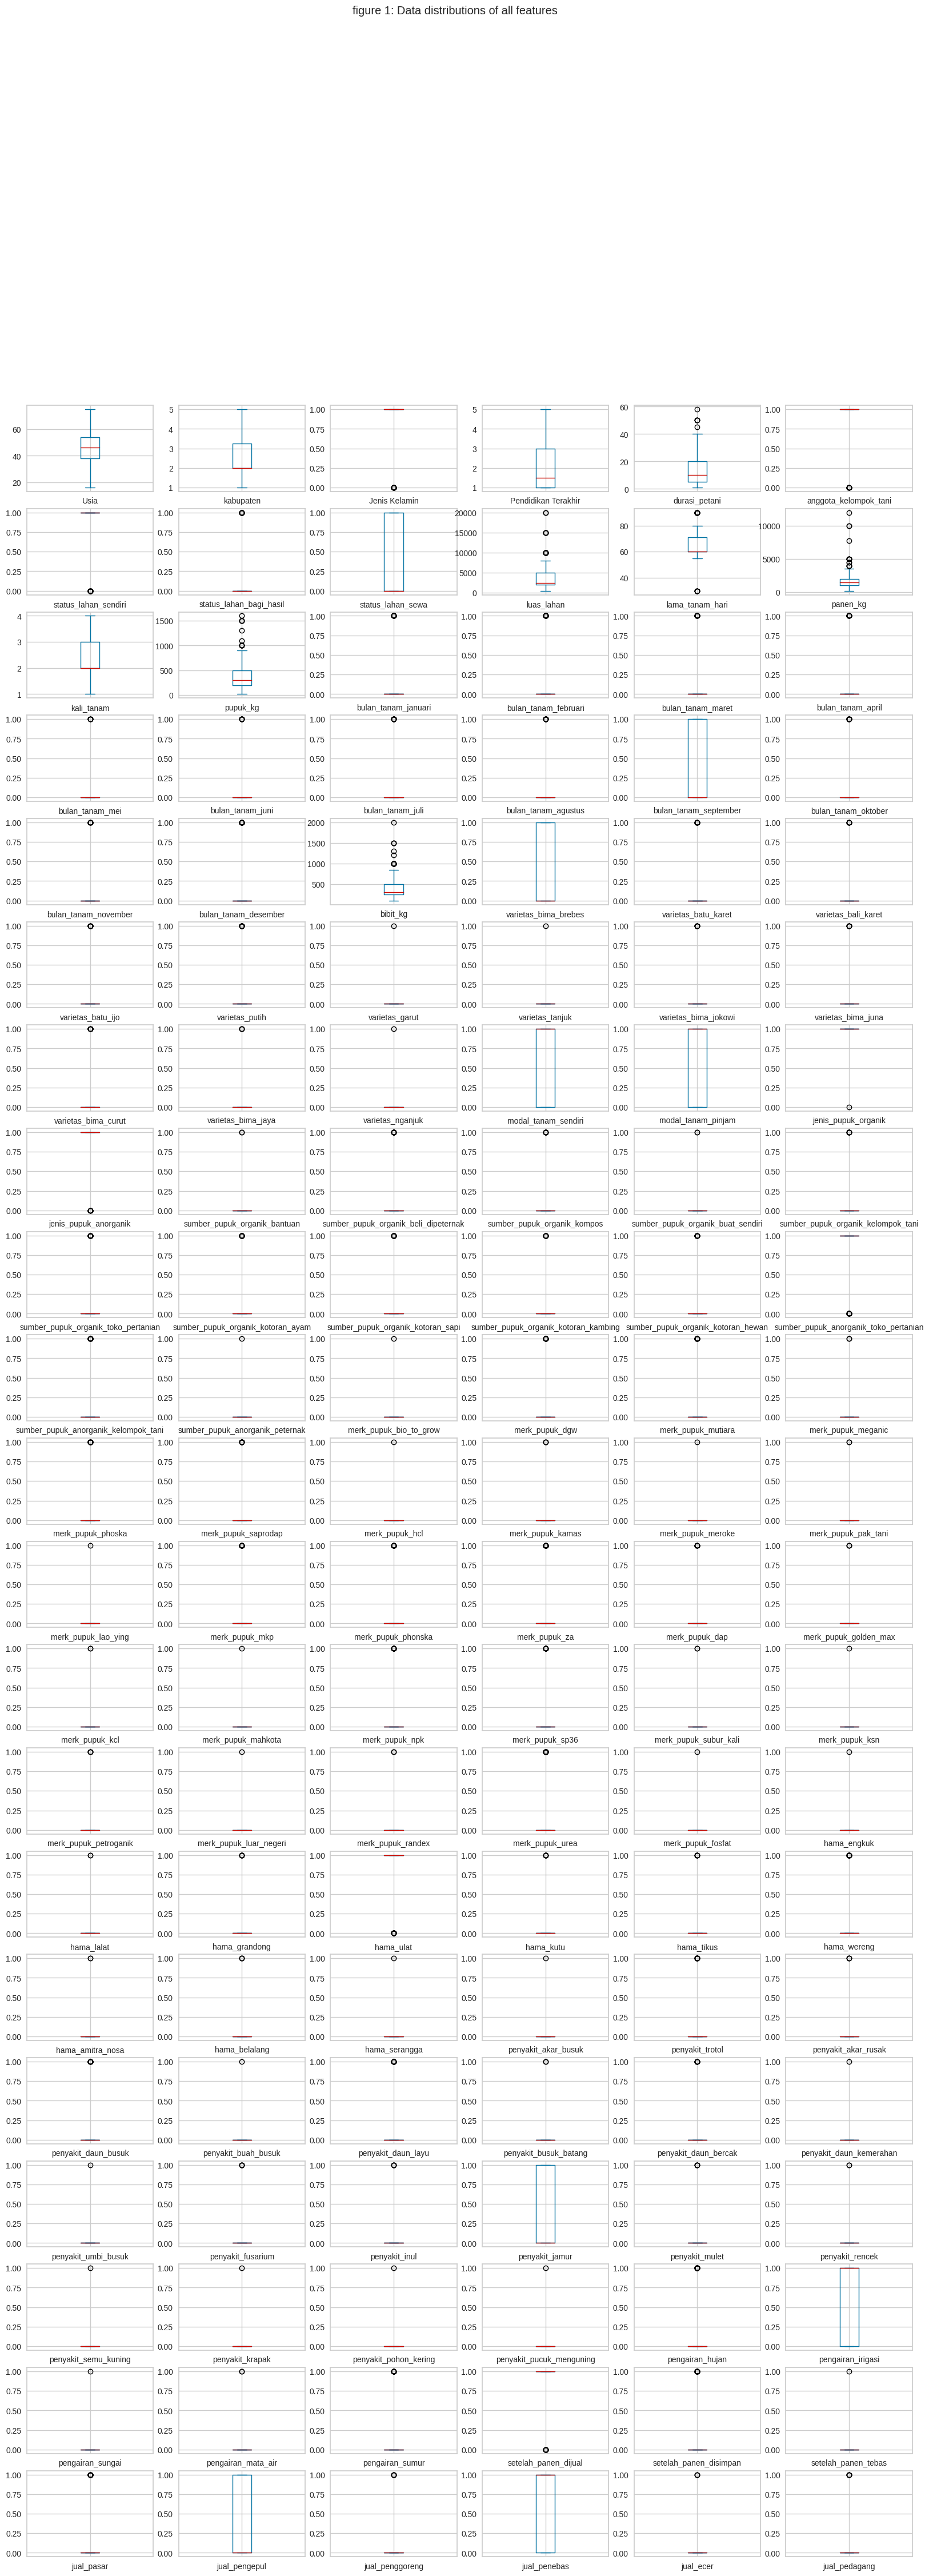

In [ ]:
df_clean.plot(kind='box',subplots=True,layout=(30,6), sharex=False,figsize = (20,70),
                           title='figure 1: Data distributions of all features')
plt.show()

### Scatter Plot

In [ ]:
# Scatter plot
#sm(df_clean, alpha = 0.7, figsize = (20,70))
#plt.show()

### Correlation

In [ ]:
# Correlation Heatmap
#correlation = df_clean.corr()
#plt.subplots(figsize = (9,9))
#sns.heatmap(correlation.round(2),
#            annot = True,
#            vmax = 1,
#            square = True,
#            cmap = 'RdYlGn_r')
#plt.show()

## Evaluasi Cluster

### Hopkins Test
digunakan untuk mengetahui apakah dataset sudah layak untuk di klaster

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(df_clean)
    hopkin_avg.append(a)

np.array(hopkin_avg).mean()

0.886728385816174

karena bernilai 0.89, maka dataset dapat di cluster dengan mudah - tanpa PCA

### K-Means Standard



```
# Ini diformat sebagai kode
```

### Penghitungan Elbow Method

In [ ]:
#Elbow Method
seed = 2022

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # standardize data
# scaler = StandardScaler()
# data_std = scaler.fit_transform(df_clean)

# # calculate SSE for each k
# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(data_std)
#     sse.append(kmeans.inertia_)

# plt.plot(range(1, 11),sse, marker='o')
# plt.title('Elbow curve')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

### Klaster terbaik dengan silhouette elbow

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

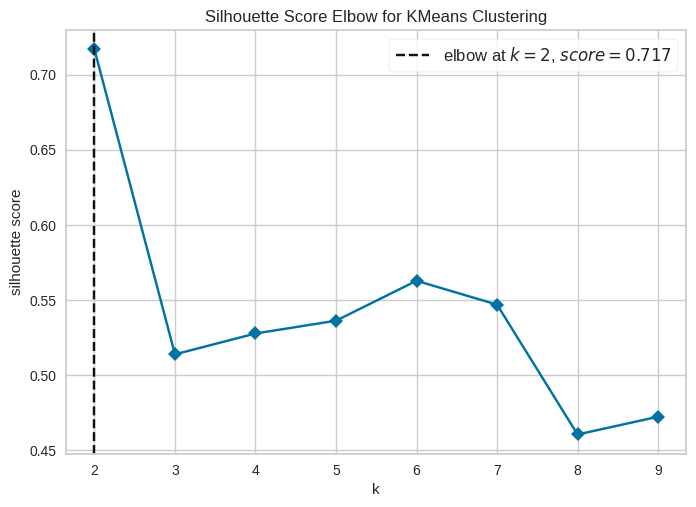

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_S = KElbowVisualizer(KMeans(random_state=seed), k=(2,10), metric='silhouette',timings=False)
Elbow_S.fit(df_clean)
Elbow_S.show()

### Pengujian Model Cluster dengan Silhouette Score

#### Perhitungan Sederhana

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

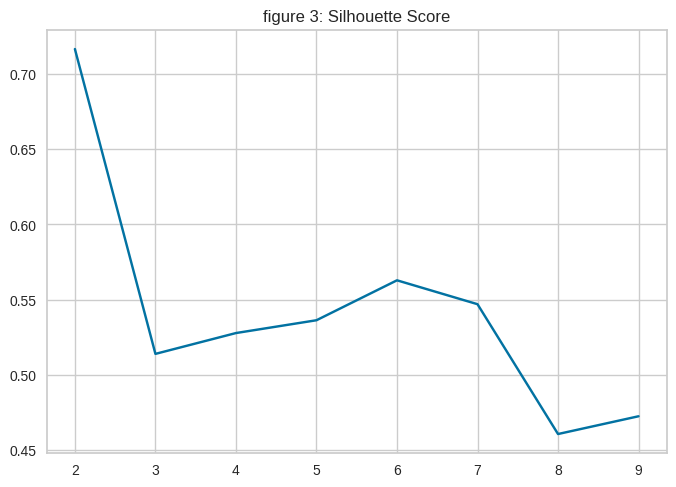

In [ ]:
#First we'll do the silhouette score analysis
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = seed).fit(df_clean)
    sse_.append([k, silhouette_score(df_clean, kmeans.labels_)])

plt.title('figure 3: Silhouette Score')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Perhitungan Lanjut

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7167262984700572


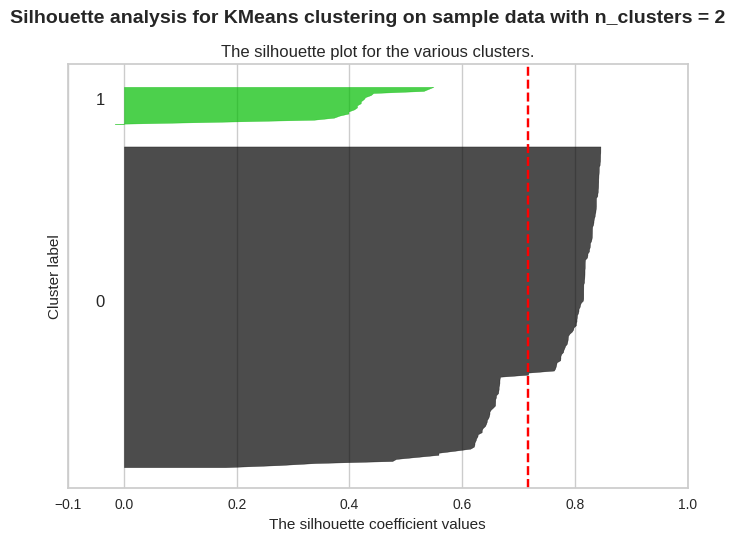

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5139244928593782


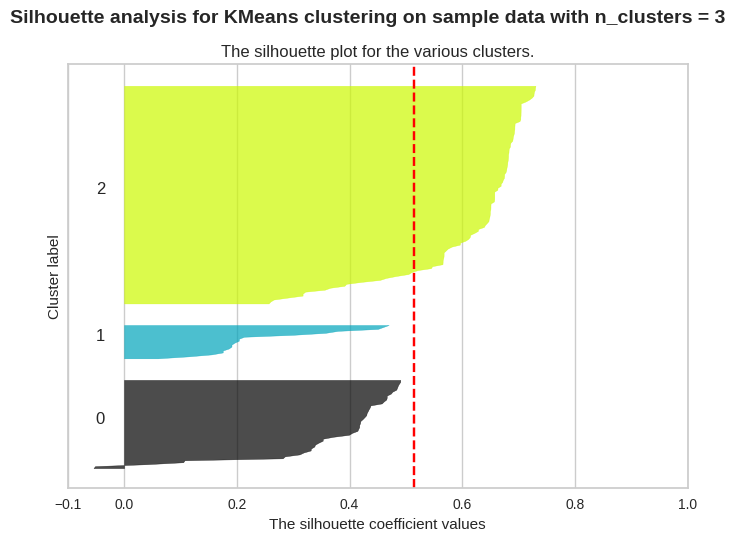

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5277828392584895


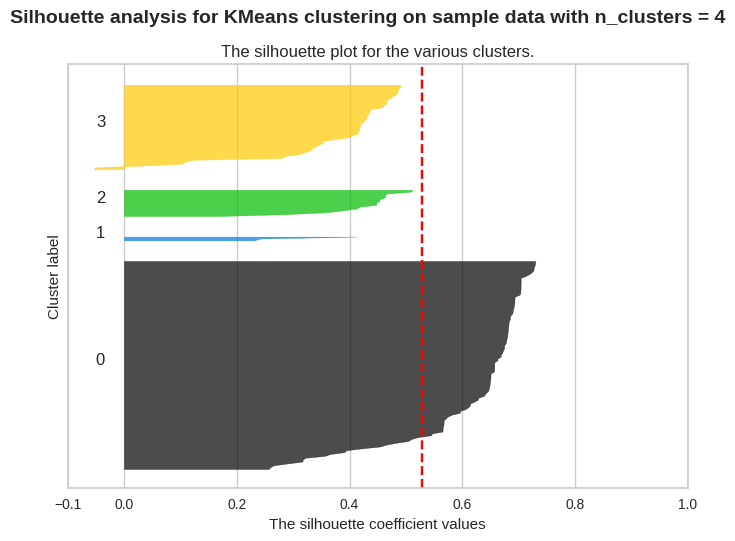

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5363022295416818


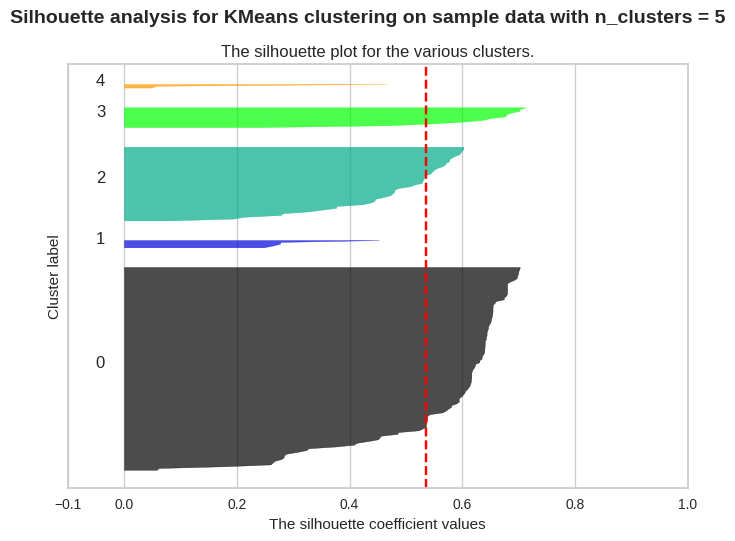

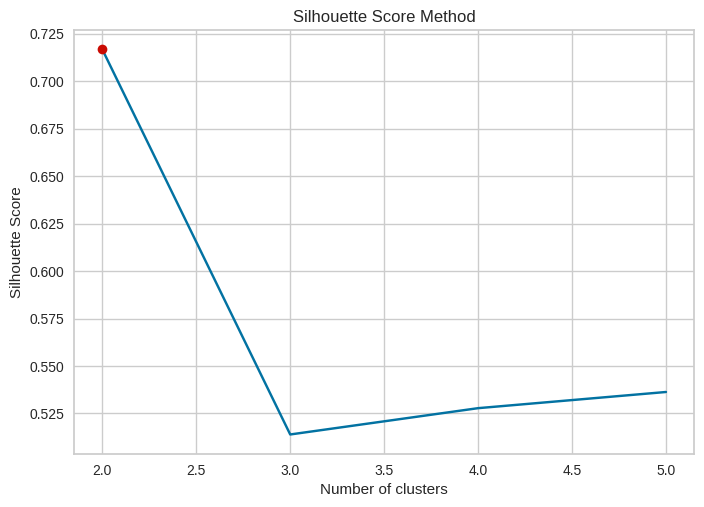

In [ ]:
# Silhouette Score Method
seed = 2022
dict_silhouette_avg = dict()
range_n_clusters = range(2,6)

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, df_clean.shape[0] + (n_clusters + 1) * 10])

    estimator = KMeans(n_clusters = n_clusters,random_state=seed)
    cluster_labels = estimator.fit_predict(df_clean)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_clean,cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    dict_silhouette_avg[n_clusters] = silhouette_avg

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clean,cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(2,silhouette_df[2],'ro')

### Silhouette Score dengan Metric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

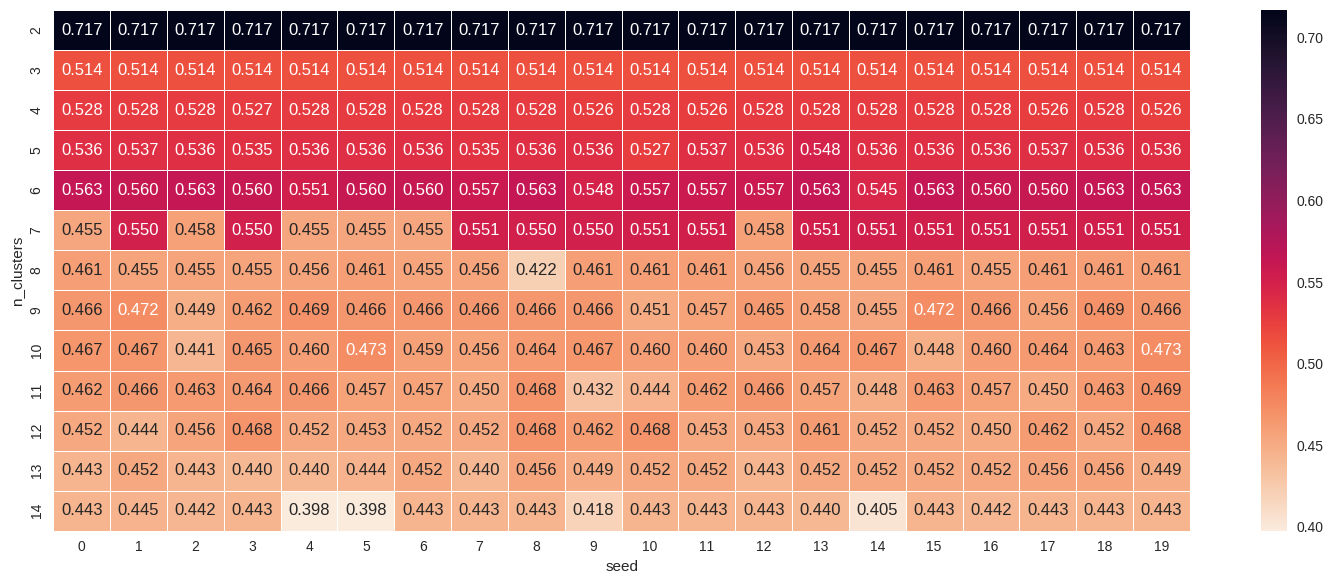

In [ ]:
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(df_clean)
        silhouette_avg = silhouette_score(df_clean, cluster_labels)
        # print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

## CLustering Dengan N_Cluster = 2

In [ ]:
#Let's perform K means using K=2
KM = KMeans(n_clusters = 2, random_state=seed)
res = KM.fit_predict(df_clean)

label_pred_KM = KM.labels_
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)

centroids_KM= KM.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

inertia_KM = KM.inertia_
print("Inertia:",inertia_KM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels predicted by K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
Length of labels is same as data entry (176,)
Shape of centroids_KM (2, 126)
Centroids: [[ 4.61910828e+01  2.56687898e+00  8.78980892e-01  1.76433121e+00
   1.35286624e+01  9.36305732e-01  7.51592357e-01  3.82165605e-02
   3.12101911e-01  2.92735669e+03  6.49044586e+01  1.76815287e+03
   2.41401274e+00  3.44777070e+02  1.14649682e-01  2.16560510e-01
   1.91082803e-01  1.33757962e-01  3.82165605e-02  4.45859873e-02
   7.64331210e-02  1.08280255e-01  3.43949045e-01  1.52866242e-01
   1.33757962e-01  1.40127389e-01  3.86624204e+02  4.58598726e-01
   1.27388535e-01  4.45859873e-02  9.55414013e-02  7.64331210e-

### memasukkan cluster ke dataframe awal

In [ ]:
df_Kmean4 =df.copy()
df_Kmean4 = pd.concat([df_Kmean4, pd.Series(KM.labels_, index = df.index)], axis=1)
df_Kmean4.head()

Nama  Usia kabupaten Jenis Kelamin Pendidikan Terakhir  durasi_petani  \
0  Ngatno    50  Boyolali     Laki-laki                 SMP           30.0   
1   Suyut    65  Boyolali     Laki-laki                  SD           50.0   
2   Sumar    40  Boyolali     Laki-laki                  SD           20.0   
3  Jumadi    50  Boyolali     Laki-laki                  SD           20.0   
4    wagi    38  Boyolali     Laki-laki                  SD           23.0   

  anggota_kelompok_tani  status_lahan_sendiri  status_lahan_bagi_hasil  \
0                    Ya                     1                        0   
1                    Ya                     1                        0   
2                    Ya                     1                        0   
3                    Ya                     1                        0   
4                    Ya                     1                        0   

   status_lahan_sewa  luas_lahan  lama_tanam_hari  panen_kg  kali_tanam  \
0                  0      7000.0             60.0    1000.0         2.0   
1                  0      3000.0             60.0    2000.0         2.0   
2                  0       800.0             60.0     600.0         3.0   
3                  0      2000.0             60.0    2000.0         3.0   
4                  1      2000.0             60.0     700.0         2.0   

   pupuk_kg  bulan_tanam_januari  bulan_tanam_februari  bulan_tanam_maret  \
0     200.0                    1                     0                  0   
1     350.0                    0                     0                  1   
2      50.0                    0                     0                  1   
3      50.0                    0                     0                  1   
4     250.0                    0                     1                  0   

   bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  bulan_tanam_juli  \
0                  0                0                 0                 0   
1                  0                0                 0                 0   
2                  1                0                 0                 0   
3                  1                0                 0                 0   
4                  0                0                 0                 0   

   bulan_tanam_agustus  bulan_tanam_september  bulan_tanam_oktober  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   

   bulan_tanam_november  bulan_tanam_desember  bibit_kg  varietas_bima_brebes  \
0                     0                     1     200.0                     0   
1                     0                     1     350.0                     0   
2                     0                     1     500.0                     0   
3                     0                     1     250.0                     0   
4                     0                     0     250.0                     0   

   varietas_batu_karet  varietas_bali_karet  varietas_batu_ijo  \
0                    0                    1                  1   
1                    0                    0                  1   
2                    0                    1                  0   
3                    0                    0                  1   
4                    0                    0                  1   

   varietas_putih  varietas_garut  varietas_tanjuk  varietas_bima_jokowi  \
0               0               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               1                0                     0   
4               0            

In [ ]:
df_Kmean4.rename(columns = {0:'Cluster'}, inplace = True)
df_Kmean4.head()

Nama  Usia kabupaten Jenis Kelamin Pendidikan Terakhir  durasi_petani  \
0  Ngatno    50  Boyolali     Laki-laki                 SMP           30.0   
1   Suyut    65  Boyolali     Laki-laki                  SD           50.0   
2   Sumar    40  Boyolali     Laki-laki                  SD           20.0   
3  Jumadi    50  Boyolali     Laki-laki                  SD           20.0   
4    wagi    38  Boyolali     Laki-laki                  SD           23.0   

  anggota_kelompok_tani  status_lahan_sendiri  status_lahan_bagi_hasil  \
0                    Ya                     1                        0   
1                    Ya                     1                        0   
2                    Ya                     1                        0   
3                    Ya                     1                        0   
4                    Ya                     1                        0   

   status_lahan_sewa  luas_lahan  lama_tanam_hari  panen_kg  kali_tanam  \
0                  0      7000.0             60.0    1000.0         2.0   
1                  0      3000.0             60.0    2000.0         2.0   
2                  0       800.0             60.0     600.0         3.0   
3                  0      2000.0             60.0    2000.0         3.0   
4                  1      2000.0             60.0     700.0         2.0   

   pupuk_kg  bulan_tanam_januari  bulan_tanam_februari  bulan_tanam_maret  \
0     200.0                    1                     0                  0   
1     350.0                    0                     0                  1   
2      50.0                    0                     0                  1   
3      50.0                    0                     0                  1   
4     250.0                    0                     1                  0   

   bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  bulan_tanam_juli  \
0                  0                0                 0                 0   
1                  0                0                 0                 0   
2                  1                0                 0                 0   
3                  1                0                 0                 0   
4                  0                0                 0                 0   

   bulan_tanam_agustus  bulan_tanam_september  bulan_tanam_oktober  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   

   bulan_tanam_november  bulan_tanam_desember  bibit_kg  varietas_bima_brebes  \
0                     0                     1     200.0                     0   
1                     0                     1     350.0                     0   
2                     0                     1     500.0                     0   
3                     0                     1     250.0                     0   
4                     0                     0     250.0                     0   

   varietas_batu_karet  varietas_bali_karet  varietas_batu_ijo  \
0                    0                    1                  1   
1                    0                    0                  1   
2                    0                    1                  0   
3                    0                    0                  1   
4                    0                    0                  1   

   varietas_putih  varietas_garut  varietas_tanjuk  varietas_bima_jokowi  \
0               0               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               1                0                     0   
4               0            

### Distribusi Cluster

<Axes: xlabel='Cluster', ylabel='count'>

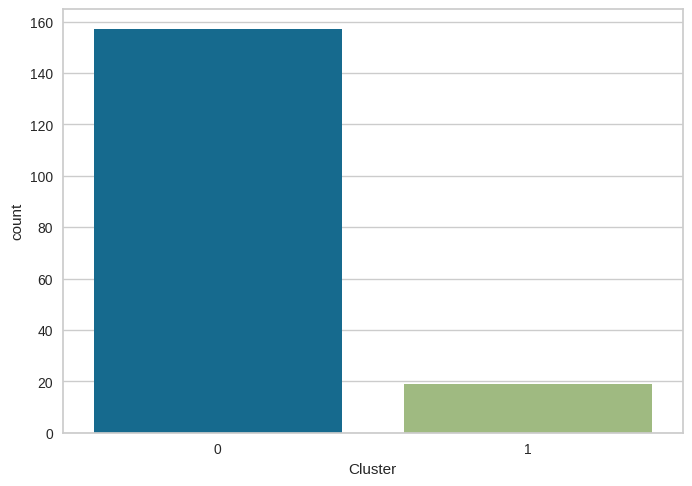

In [ ]:
sns.countplot(x=df_Kmean4.iloc[:, -1])

In [ ]:
df_Kmean4['Cluster'].value_counts()

0    157
1     19
Name: Cluster, dtype: int64

### Member tiap Cluster

In [ ]:
cluster_0 = df_Kmean4[df_Kmean4['Cluster'] == 0]
cluster_1 = df_Kmean4[df_Kmean4['Cluster'] == 1]

## Pelaporan Temuan

In [ ]:
cluster_0

Nama  Usia   kabupaten Jenis Kelamin  \
0                     Ngatno    50    Boyolali     Laki-laki   
1                      Suyut    65    Boyolali     Laki-laki   
2                      Sumar    40    Boyolali     Laki-laki   
3                     Jumadi    50    Boyolali     Laki-laki   
4                       wagi    38    Boyolali     Laki-laki   
5                    Suwardi    46    Boyolali     Laki-laki   
6                      Supri    42    Boyolali     Laki-laki   
7                    Tunggal    54    Boyolali     Laki-laki   
8                     Wahono    57    Boyolali     Laki-laki   
9                Hadi Suradi    72    Boyolali     Laki-laki   
10                    Subadi    38    Boyolali     Laki-laki   
11                    Sarmin    41    Boyolali     Laki-laki   
12                   Sumarno    40    Boyolali     Laki-laki   
13              Joko Triyono    28    Boyolali     Laki-laki   
14              Nur Khamid 1    29    Boyolali     Laki-laki   
16                   Triyono    45    Boyolali     Laki-laki   
17                   Suwarni    25    Boyolali     Perempuan   
18              Sri sumarsih    33    Boyolali     Perempuan   
19                     Tarmi    42    Boyolali     Perempuan   
20           Nanik istiqomah    30    Boyolali     Perempuan   
21                    Juanah    43    Boyolali     Perempuan   
22                 Rubiyanti    45    Boyolali     Perempuan   
23                     Yamti    50    Boyolali     Perempuan   
24                      Sogi    38    Boyolali     Perempuan   
25                     Marmi    70    Boyolali     Perempuan   
27                     Turut    60    Boyolali     Perempuan   
29                   Sutatik    50    Boyolali     Perempuan   
30                   Tuminah    40    Boyolali     Perempuan   
31                 Sumiyatun    37    Boyolali     Perempuan   
32                     Titik    40    Boyolali     Perempuan   
33                     Tarni    48    Boyolali     Perempuan   
34                      Yati    40    Boyolali     Perempuan   
35                       Eni    32    Boyolali     Perempuan   
36                    Supami    48    Boyolali     Perempuan   
38                   Suripan    55       Demak     Laki-laki   
39                    Rohmat    55       Demak     Laki-laki   
40        Bambang Dwi Atmoyo    35       Demak     Laki-laki   
41         Dwi Tulus Adhityo    28       Demak     Laki-laki   
42           Slamet Haryanto    40       Demak     Laki-laki   
43                Sutrisno 1    47       Demak     Laki-laki   
44              Nur khamid 2    35       Demak     Laki-laki   
46                   Jamiran    65       Demak     Laki-laki   
47                   Martoyo    45       Demak     Laki-laki   
48                     Mardi    54       Demak     Laki-laki   
49              Shofi Yullah    49       Demak     Laki-laki   
50                Sutrisno 2    42       Demak     Laki-laki   
51               Eko Hartono    46       Demak     Laki-laki   
52               Lis Darmoko    38       Demak     Laki-laki   
54                     Muhdi    62       Demak     Laki-laki   
55                  Siswanto    48       Demak     Laki-laki   
56                   Harnowo    36       Demak     Laki-laki   
57                   Kamsidi    49       Demak     Laki-laki   
58                 Abdulhadi    57       Demak     Laki-laki   
59                     Patmi    60       Demak     Perempuan   
60                  Jumangin    45       Demak     Laki-laki   
61             Ngasidi Rofiq    51       Demak     Laki-laki   
62               Supriyono 1    40       Demak     Laki-laki   
63                  Nuryanto    47       Demak     Laki-laki   
64                  Sutarmin    50       Demak     Laki-laki   
65                   Karmito    61       Demak     Laki-laki   
66             Heru Prasetyo    29       Demak     Laki-laki   
67               Supriyono 2    40       Demak     Laki-

In [ ]:
cluster_1

Nama  Usia   kabupaten Jenis Kelamin Pendidikan Terakhir  \
15               Suyono    36    Boyolali     Laki-laki                 SMA   
26                Miyah    50    Boyolali     Perempuan                  SD   
28              Wartini    38    Boyolali     Perempuan                  SD   
37             Ngatemin    60       Demak     Laki-laki                  SD   
45               Guntur    41       Demak     Laki-laki                 SMA   
53               Suwoto    57       Demak     Laki-laki                 SMA   
87               Sugito    54       Demak     Laki-laki                  SD   
88              Sukron     52       Demak     Laki-laki                 SMP   
90            Karsipan     58       Demak     Laki-laki                 SMP   
92        Ahmad Sholeh     67       Demak     Laki-laki                 SMA   
98          Rusminduki     65       Demak     Laki-laki                  SD   
113              Masrur    44      Kendal     Laki-laki                 SMP   
131         Nur Rozikin    46      Kendal     Laki-laki                 SMP   
133          A. Taslim     55      Brebes     Laki-laki                 SMP   
134            Sumardi     63      Brebes     Laki-laki                  SD   
154        Anto Prayogo    46  Temanggung     Laki-laki                 SMP   
162           Purwanto     60  Temanggung     Laki-laki            Lulus SD   
173  Kukuh Edi Santosa     33  Temanggung     Laki-laki                 SMA   
174              Herdi     40  Temanggung     Laki-laki                 SMA   

     durasi_petani anggota_kelompok_tani  status_lahan_sendiri  \
15            10.0                    Ya                     1   
26            30.0                    Ya                     1   
28            25.0                    Ya                     1   
37            15.0                    Ya                     1   
45            10.0                    Ya                     1   
53            17.0                    Ya                     1   
87             8.0                    Ya                     1   
88            20.0                 Tidak                     1   
90            32.0                    Ya                     1   
92            25.0                    Ya                     1   
98             8.0                    Ya                     0   
113            5.0                    Ya                     0   
131            3.0                    Ya                     0   
133           10.0                    Ya                     1   
134           15.0                    Ya                     1   
154           16.0                    Ya                     1   
162            5.0                    Ya                     1   
173           25.0                    Ya                     1   
174           10.0                    Ya                     1   

     status_lahan_bagi_hasil  status_lahan_sewa  luas_lahan  lama_tanam_hari  \
15                         0                  0     10000.0             90.0   
26                         0                  0     10000.0             90.0   
28                         0                  0     10000.0             90.0   
37                         0                  0     10000.0             60.0   
45                         0                  0     10000.0             30.0   
53                         0                  0      8000.0             90.0   
87                         0                  0     20000.0             60.0   
88                         0                  0     15000.0             60.0   
90                         0                  0     10000.0             60.0   
92                         0                  0     10000.0             60.0   
98                         0                  1     15000.0             60.0   
113                        1                  0     15000.0             60.0   
131                        1                  0     15000.0             60.0 

In [ ]:
pal = ["#E21818","#19A7CE"]

### Cluster dari Pupuk Kg

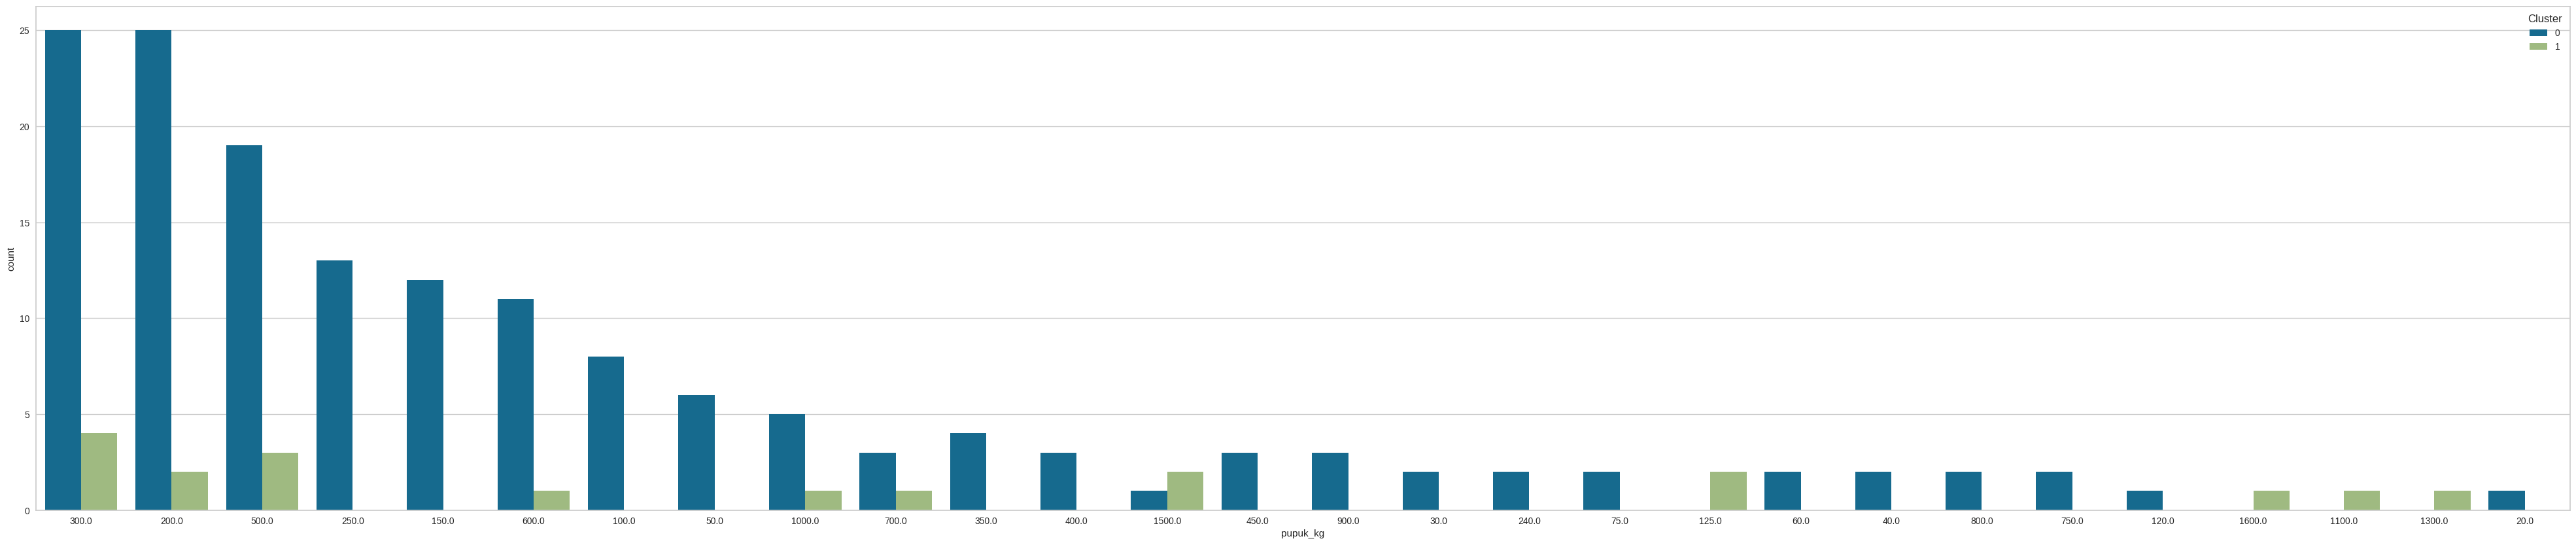

In [ ]:
plt.subplots(figsize = (50,10))
sns.countplot(x=df_Kmean4['pupuk_kg'],order=df_Kmean4['pupuk_kg'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster Dari Bibit Kg

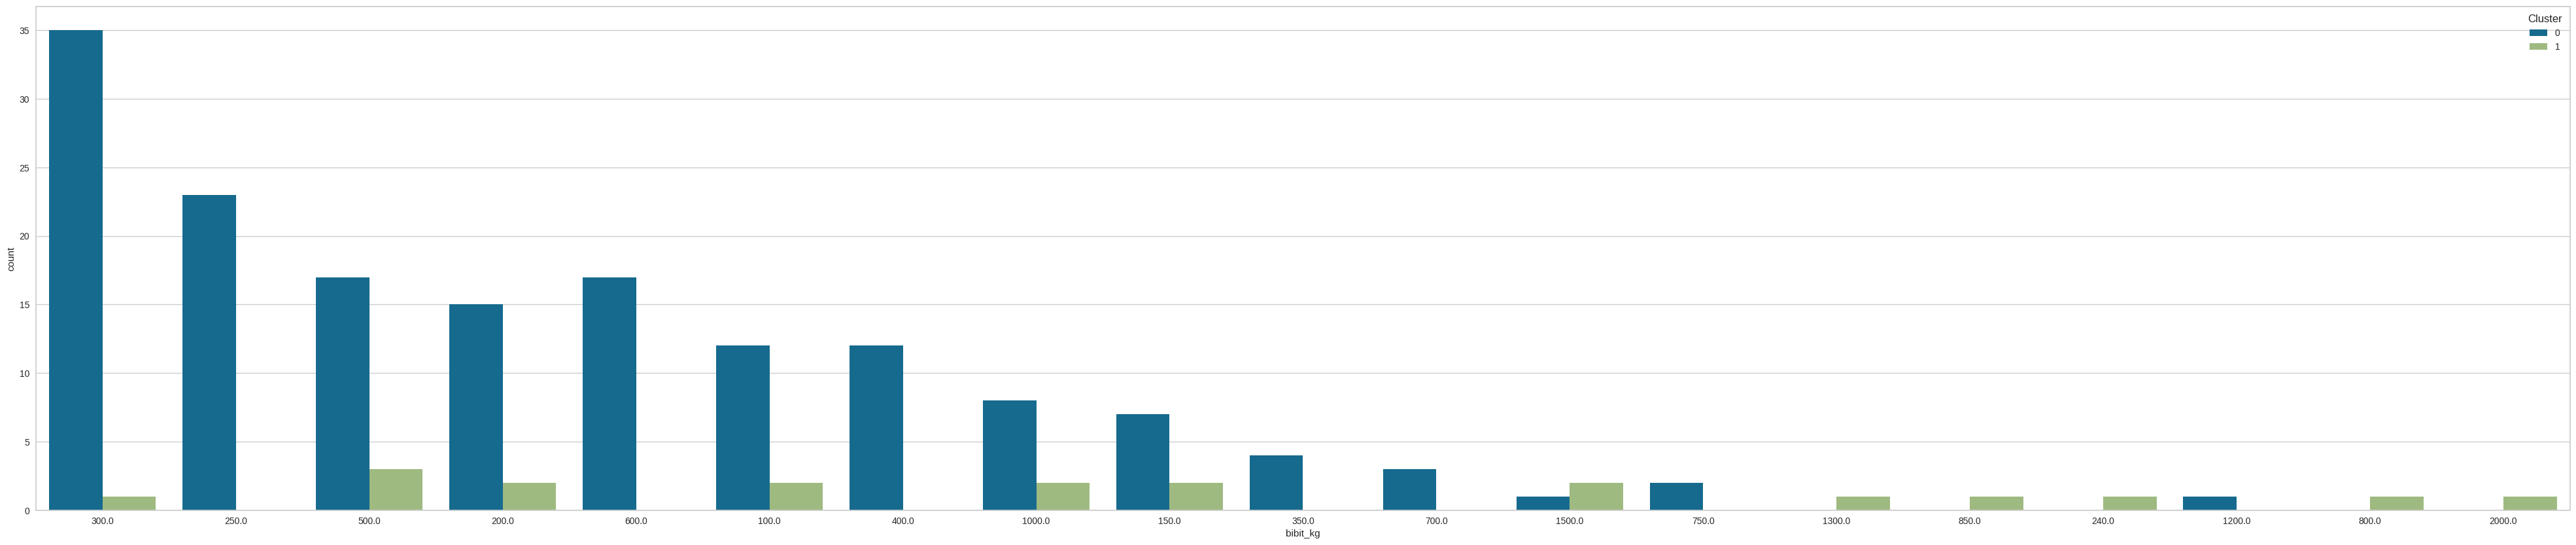

In [ ]:
plt.subplots(figsize = (50,10))
sns.countplot(x=df_Kmean4['bibit_kg'],order=df_Kmean4['bibit_kg'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster Dari Lama tanam hari

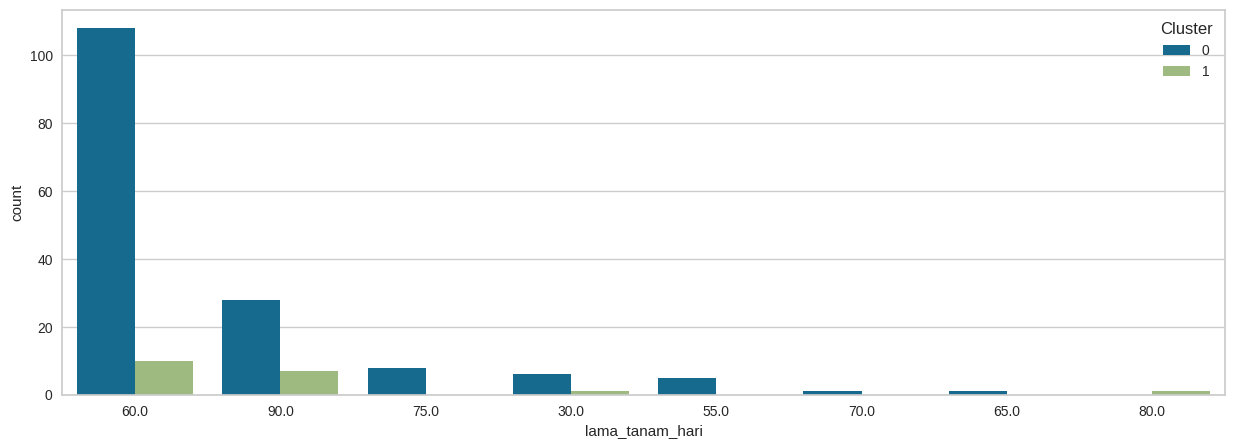

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['lama_tanam_hari'],order=df_Kmean4['lama_tanam_hari'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster Dari kali_tanam

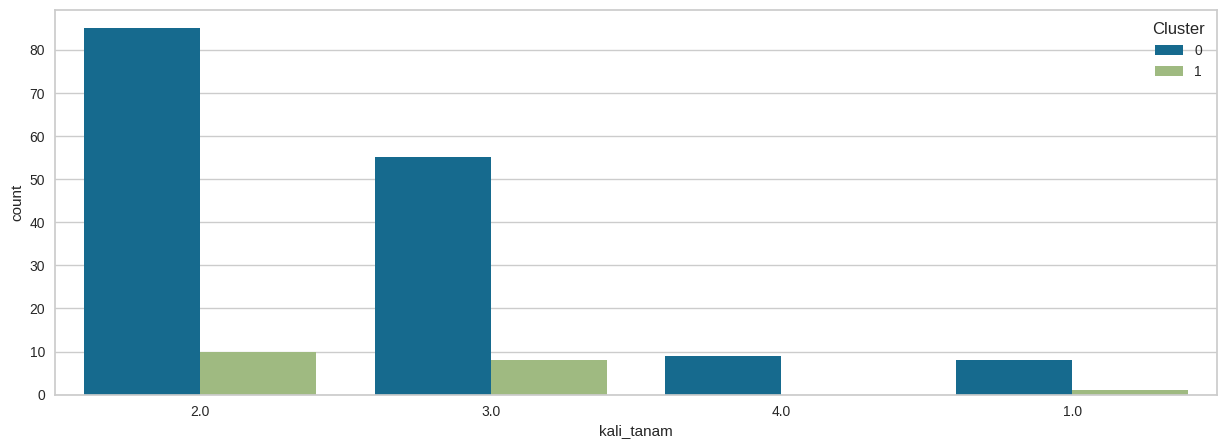

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['kali_tanam'],order=df_Kmean4['kali_tanam'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster Hasil panen Kg

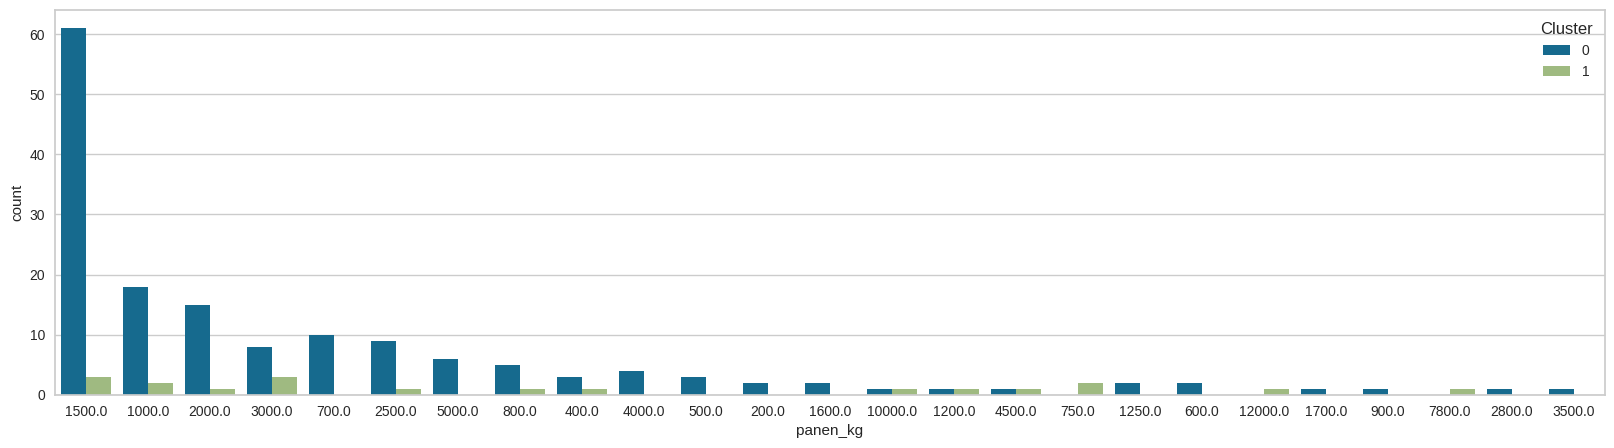

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=df_Kmean4['panen_kg'],order=df_Kmean4['panen_kg'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari Luas lahan m2

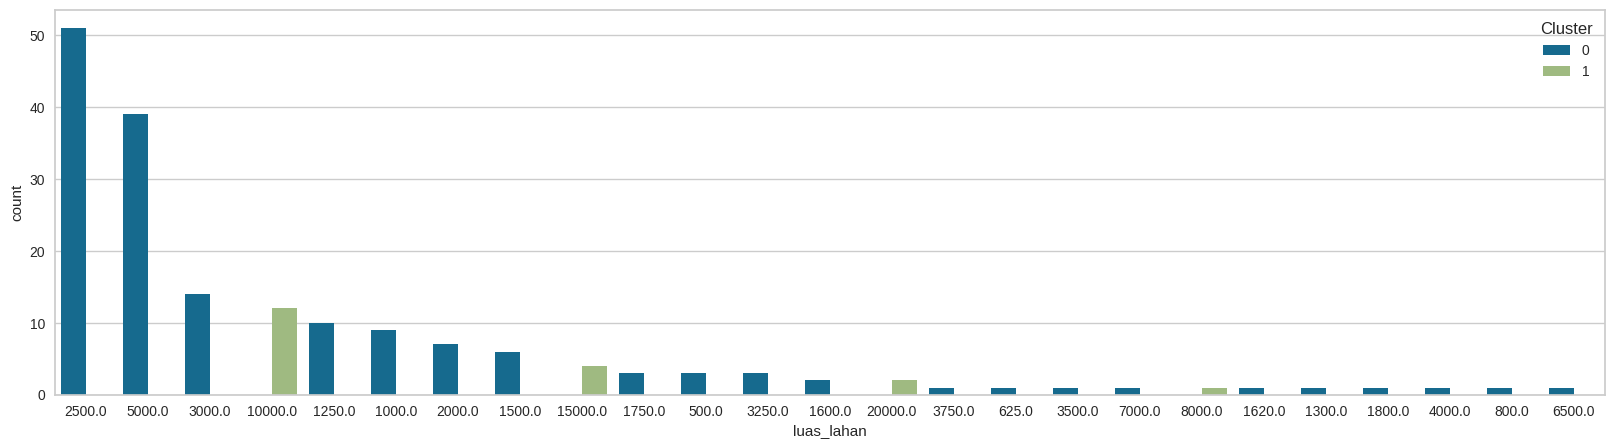

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=df_Kmean4['luas_lahan'],order=df_Kmean4['luas_lahan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari durasi_petani

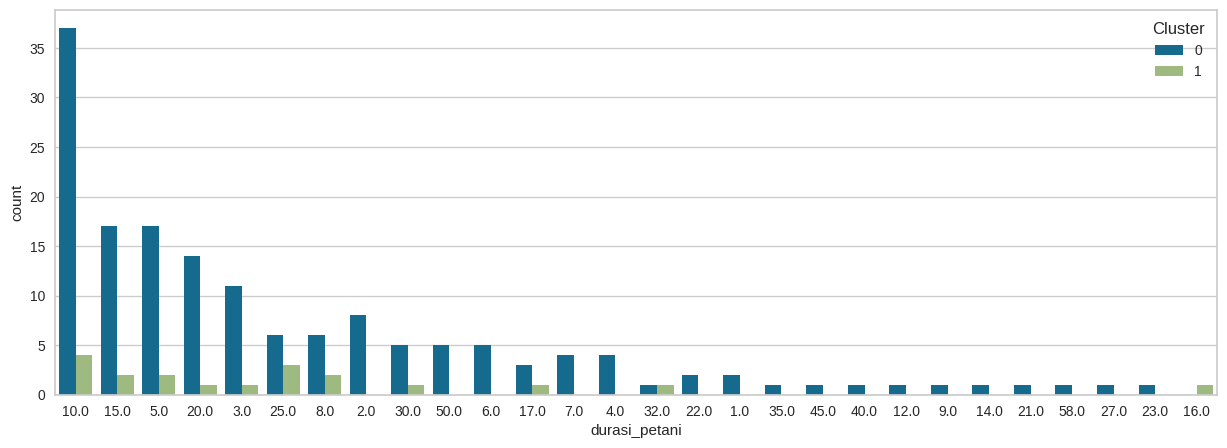

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['durasi_petani'],order=df_Kmean4['durasi_petani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari Usia

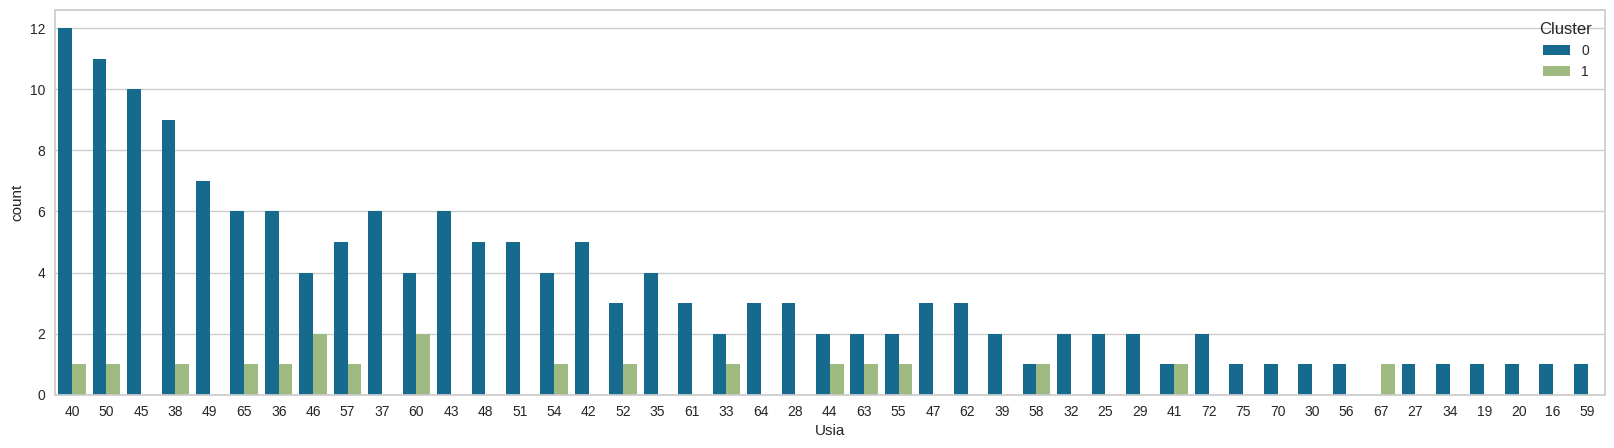

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=df_Kmean4['Usia'],order=df_Kmean4['Usia'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari kabupaten

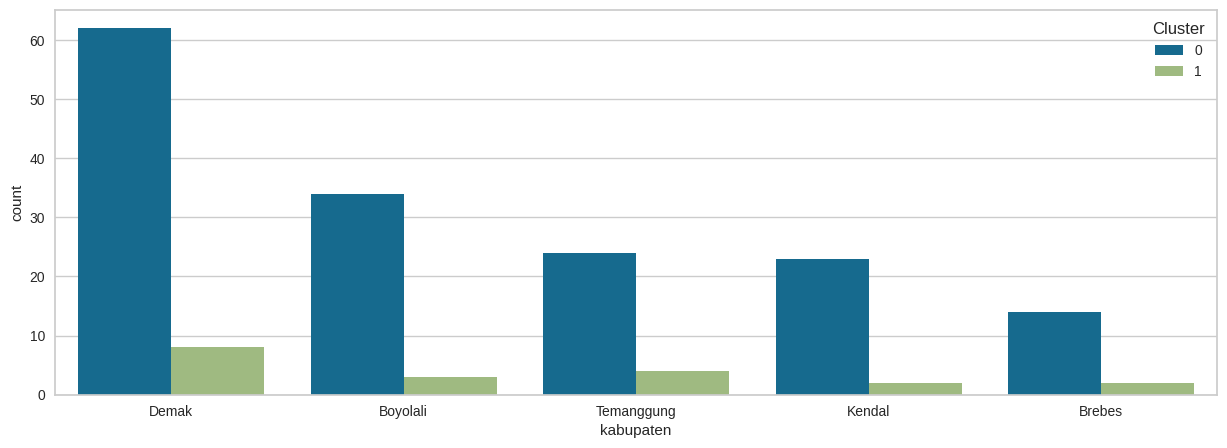

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['kabupaten'],order=df_Kmean4['kabupaten'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari Jenis Kelamin

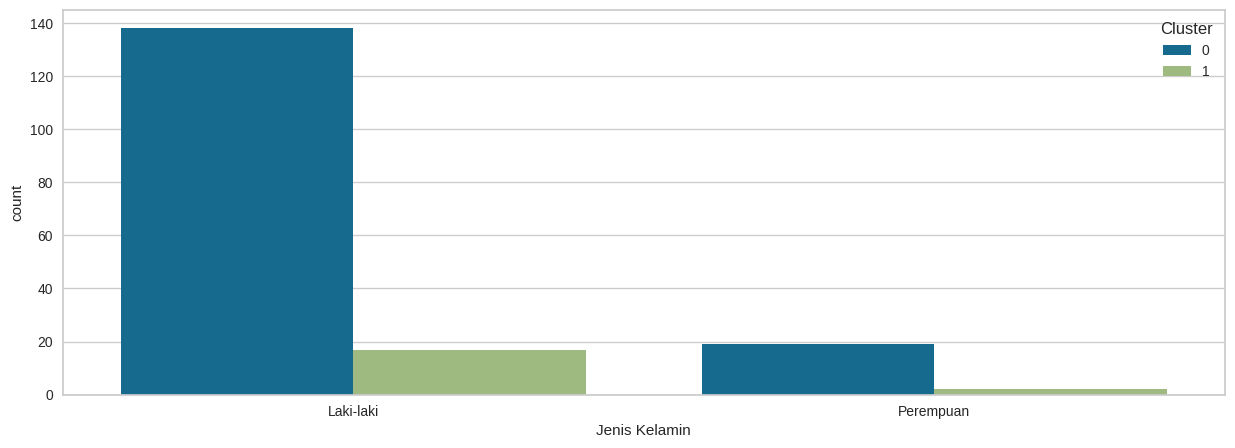

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['Jenis Kelamin'],order=df_Kmean4['Jenis Kelamin'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari Usia Petani

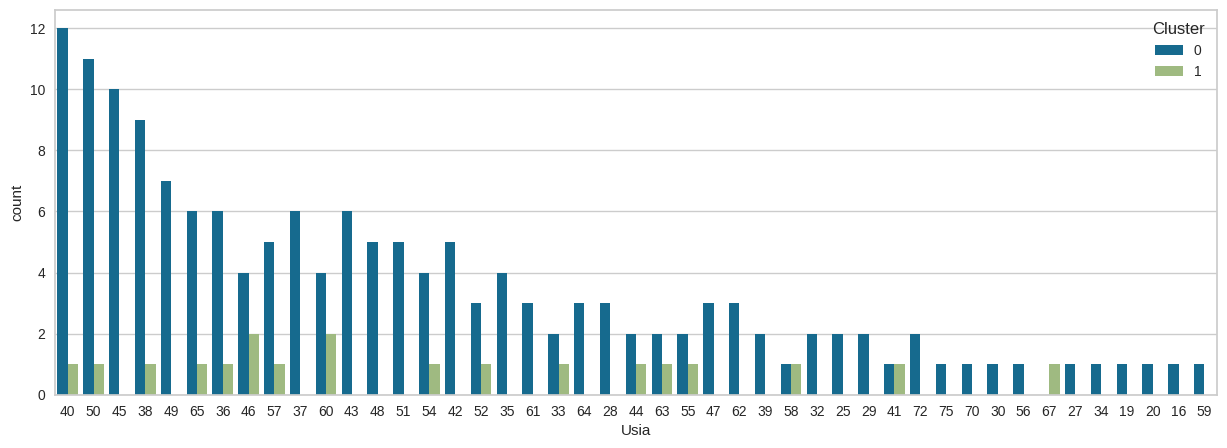

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['Usia'],order=df_Kmean4['Usia'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari Pendidikan Terakhir

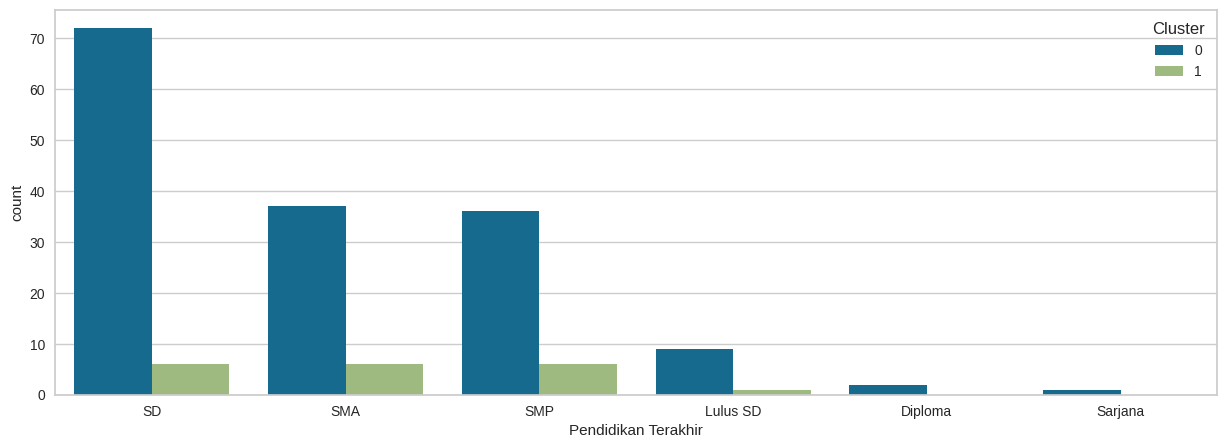

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['Pendidikan Terakhir'],order=df_Kmean4['Pendidikan Terakhir'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari anggota_kelompok_tani

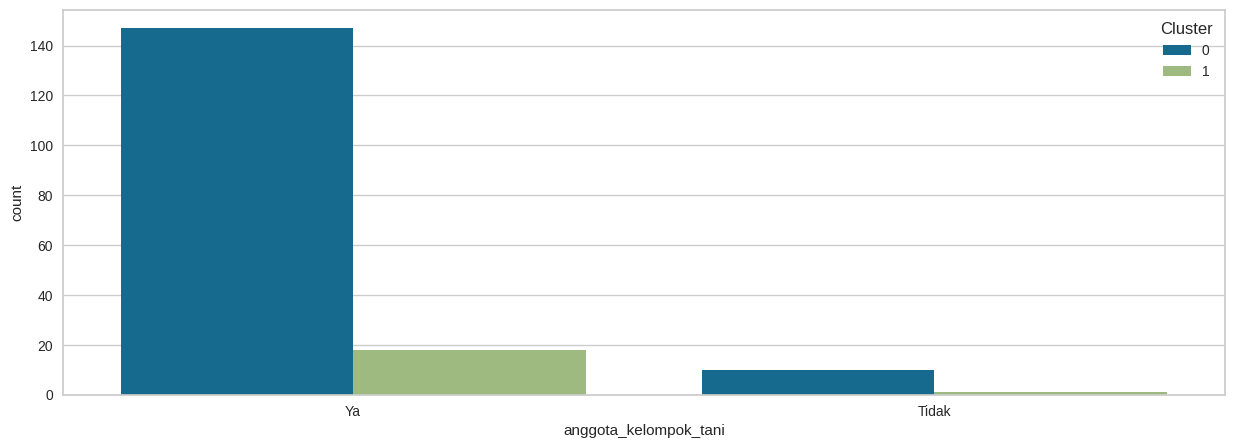

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['anggota_kelompok_tani'],order=df_Kmean4['anggota_kelompok_tani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari status_lahan_sendiri

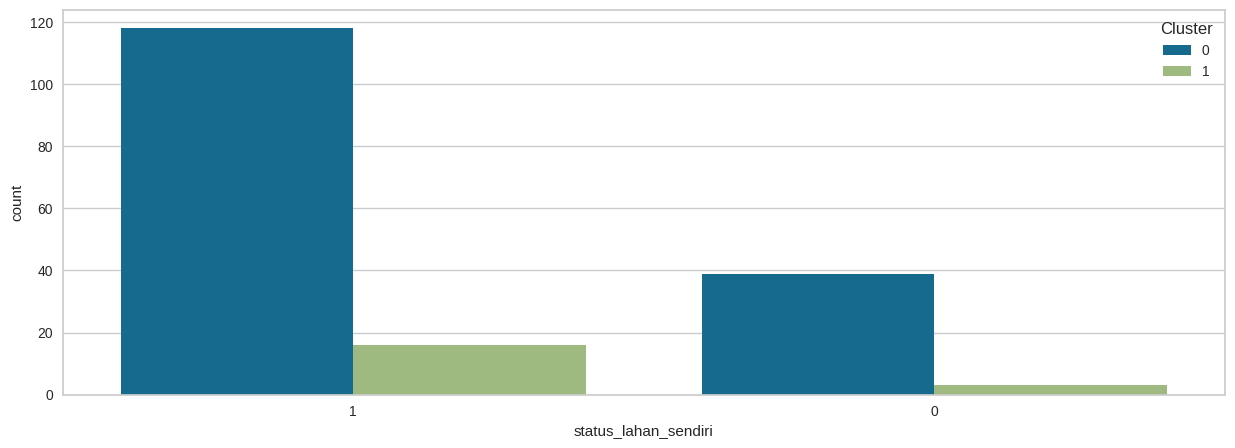

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['status_lahan_sendiri'],order=df_Kmean4['status_lahan_sendiri'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari status_lahan_sewa


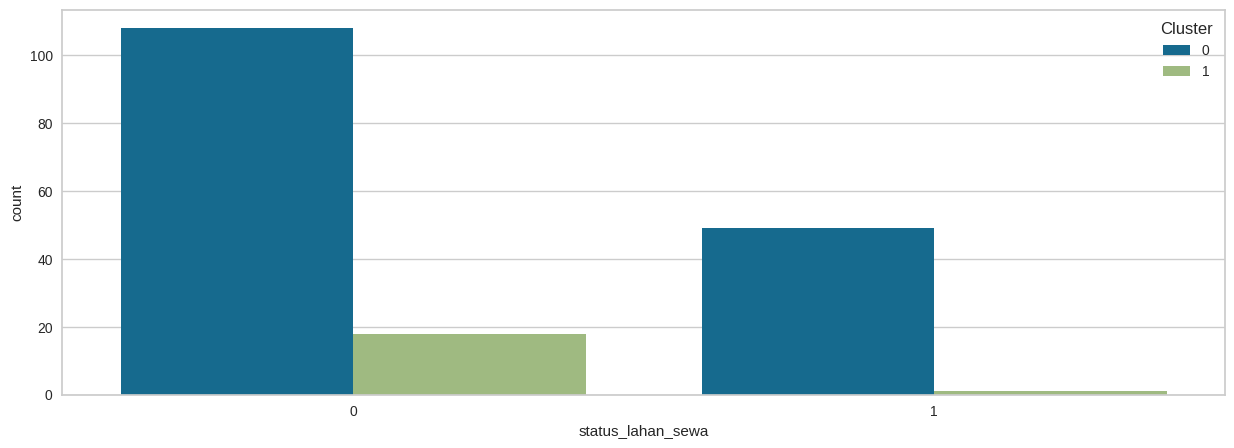

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['status_lahan_sewa'],order=df_Kmean4['status_lahan_sewa'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari status_lahan_bagi_hasil

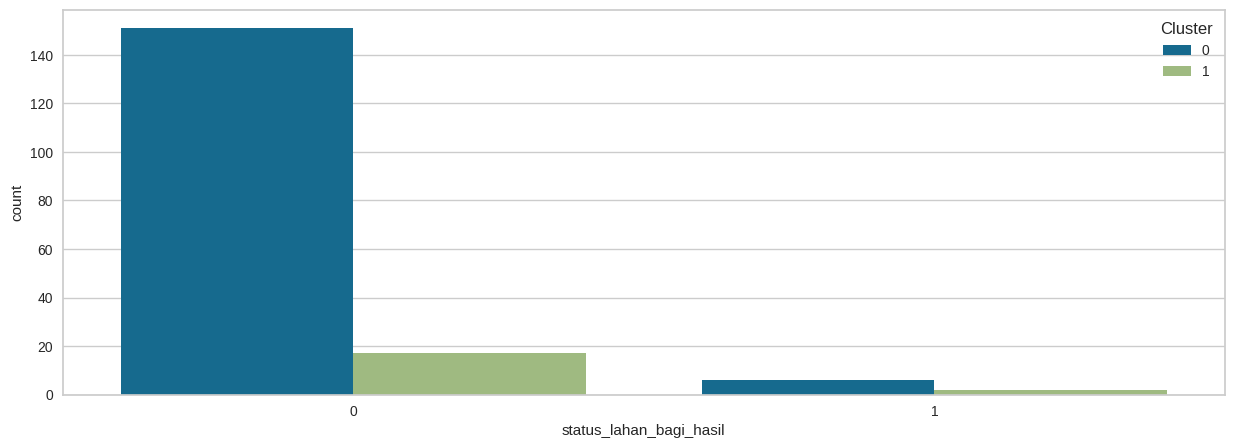

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['status_lahan_bagi_hasil'],order=df_Kmean4['status_lahan_bagi_hasil'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_januari

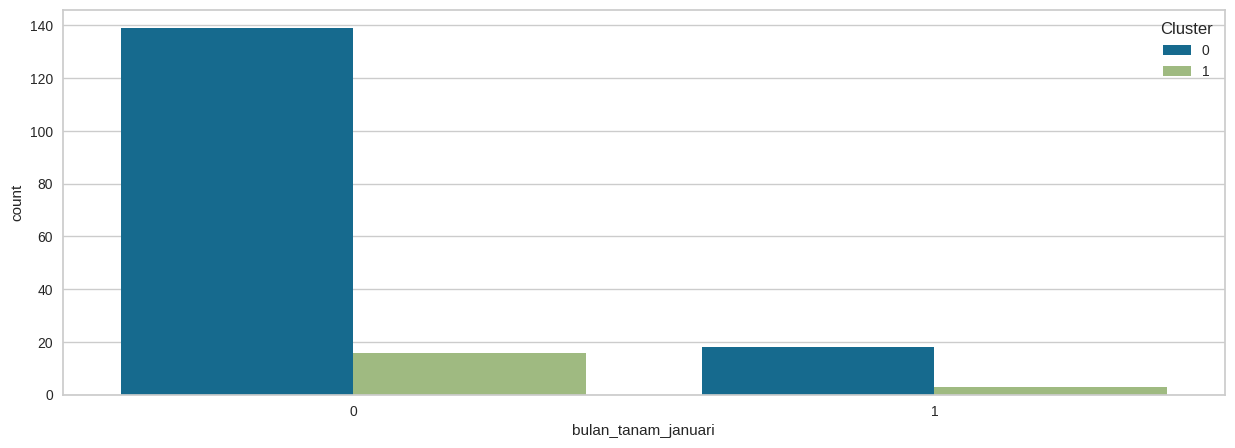

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_januari'],order=df_Kmean4['bulan_tanam_januari'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_februari

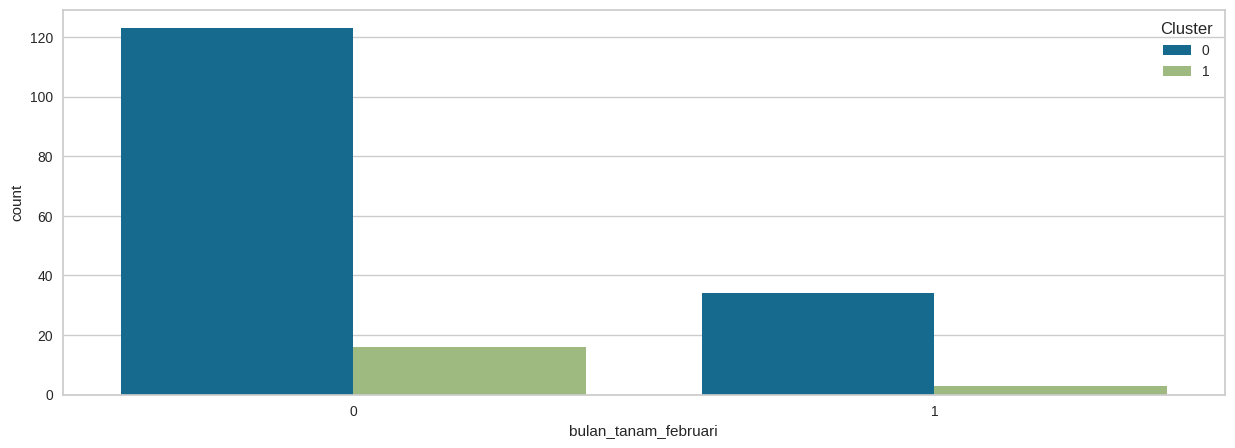

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_februari'],order=df_Kmean4['bulan_tanam_februari'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_maret

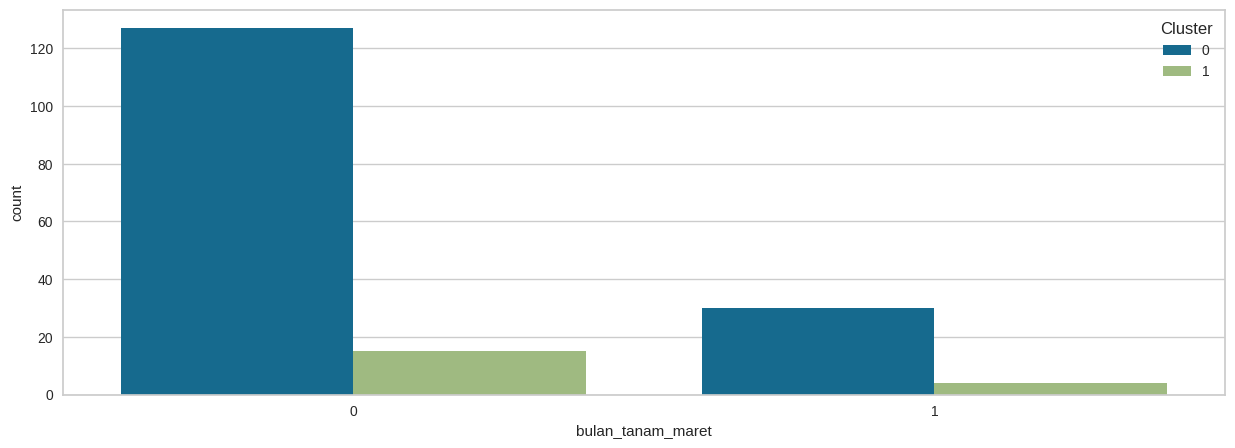

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_maret'],order=df_Kmean4['bulan_tanam_maret'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari bulan_tanam_april

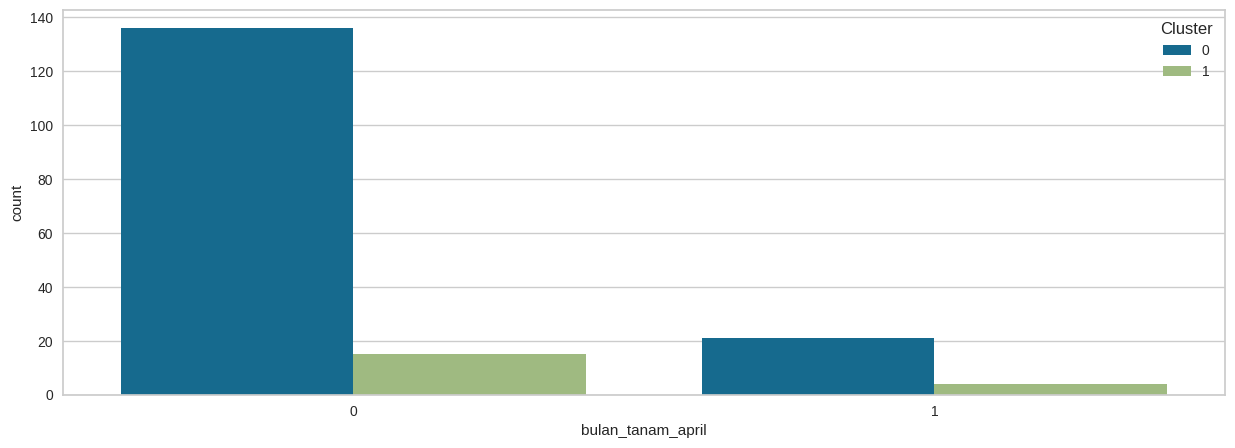

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_april'],order=df_Kmean4['bulan_tanam_april'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari bulan_tanam_mei

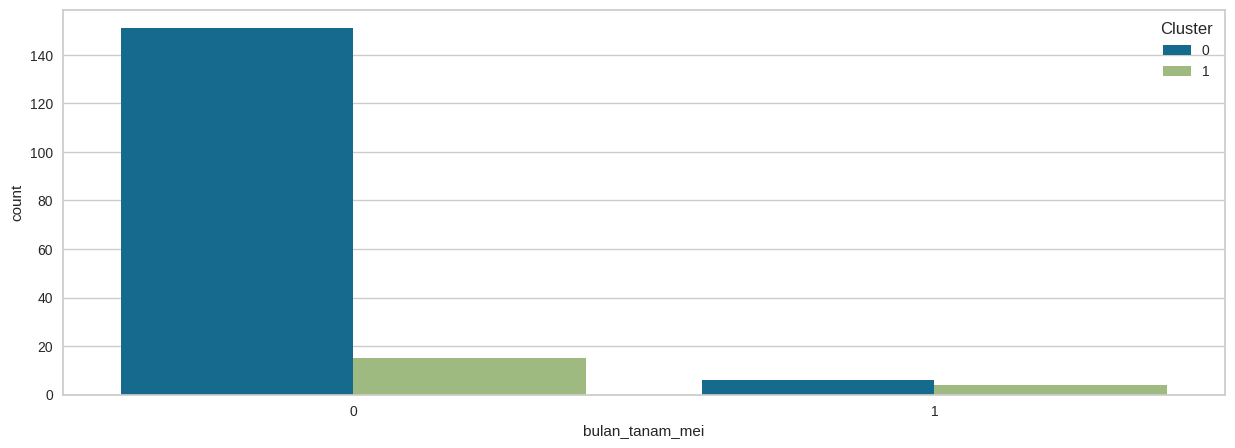

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_mei'],order=df_Kmean4['bulan_tanam_mei'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari bulan_tanam_juni

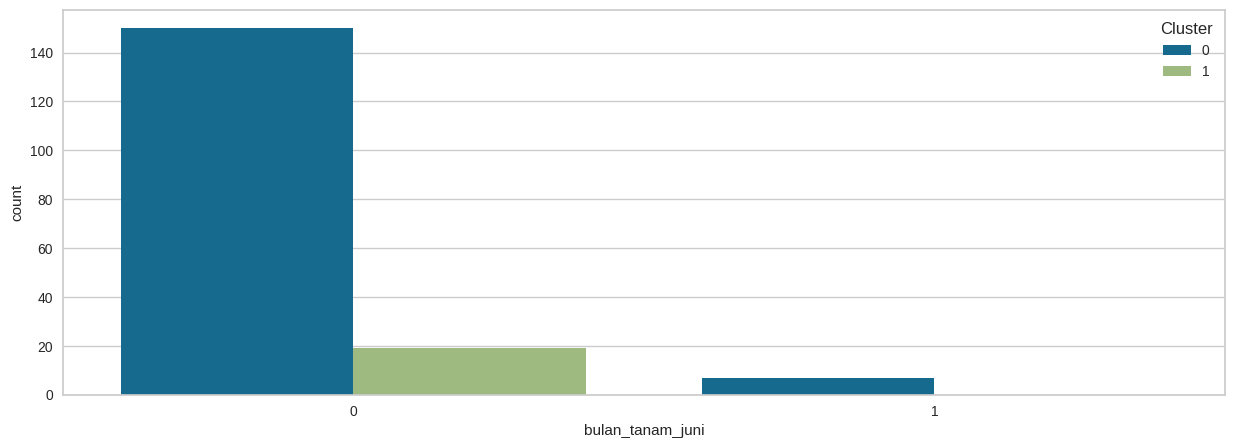

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_juni'],order=df_Kmean4['bulan_tanam_juni'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari bulan_tanam_juli

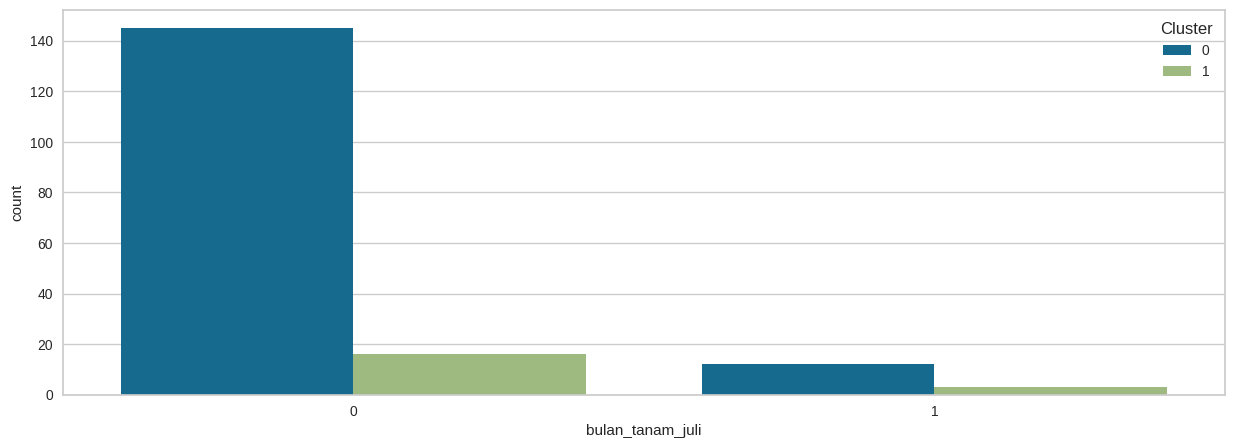

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_juli'],order=df_Kmean4['bulan_tanam_juli'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_agustus

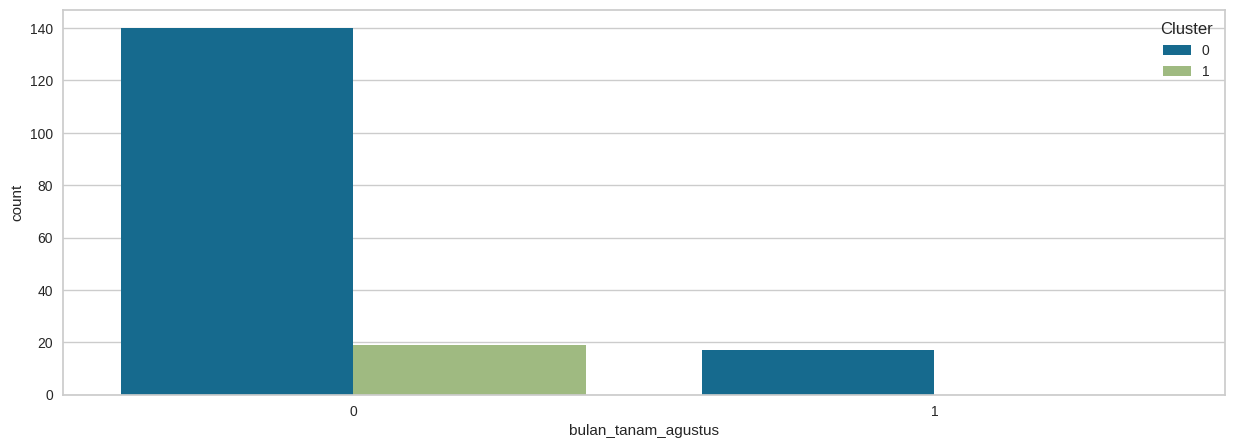

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_agustus'],order=df_Kmean4['bulan_tanam_agustus'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_september

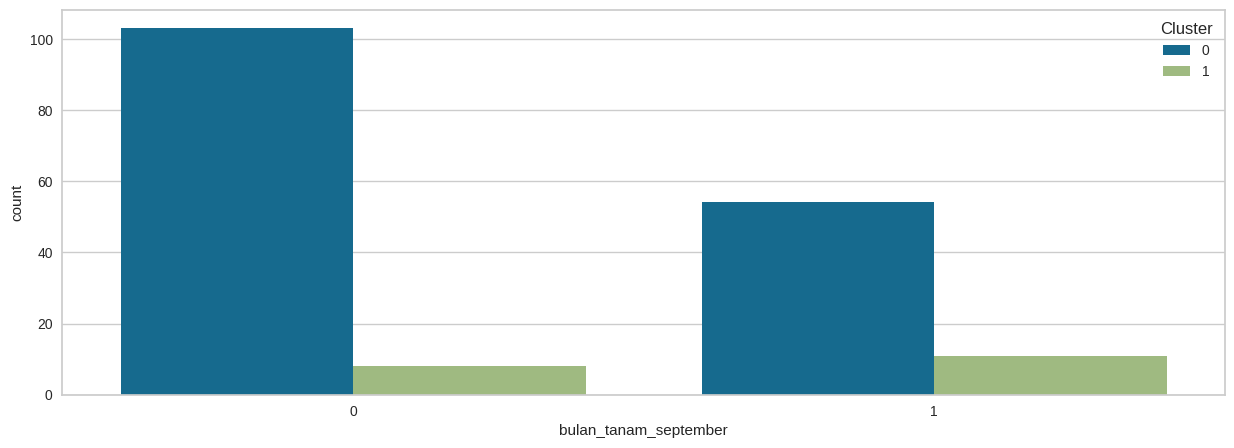

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_september'],order=df_Kmean4['bulan_tanam_september'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_oktober

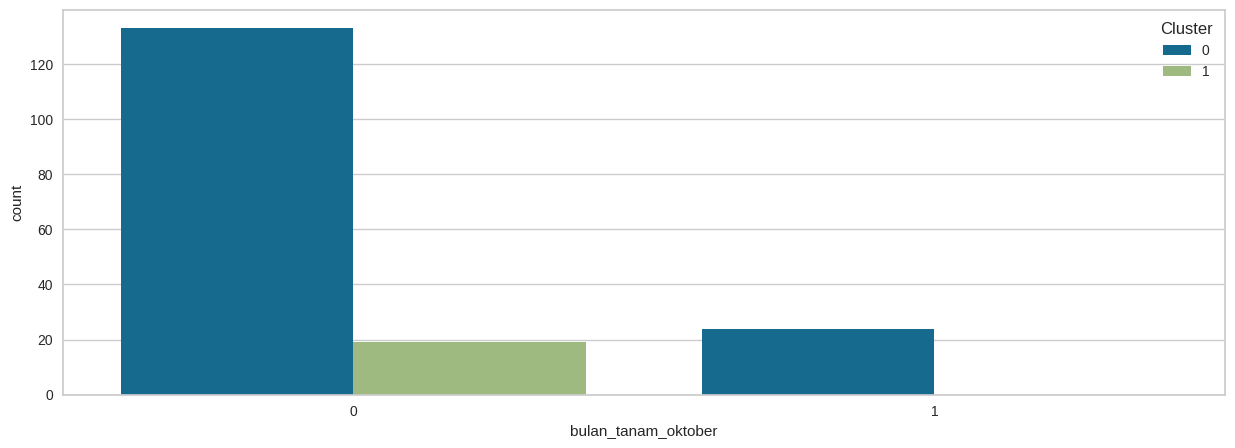

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_oktober'],order=df_Kmean4['bulan_tanam_oktober'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_november

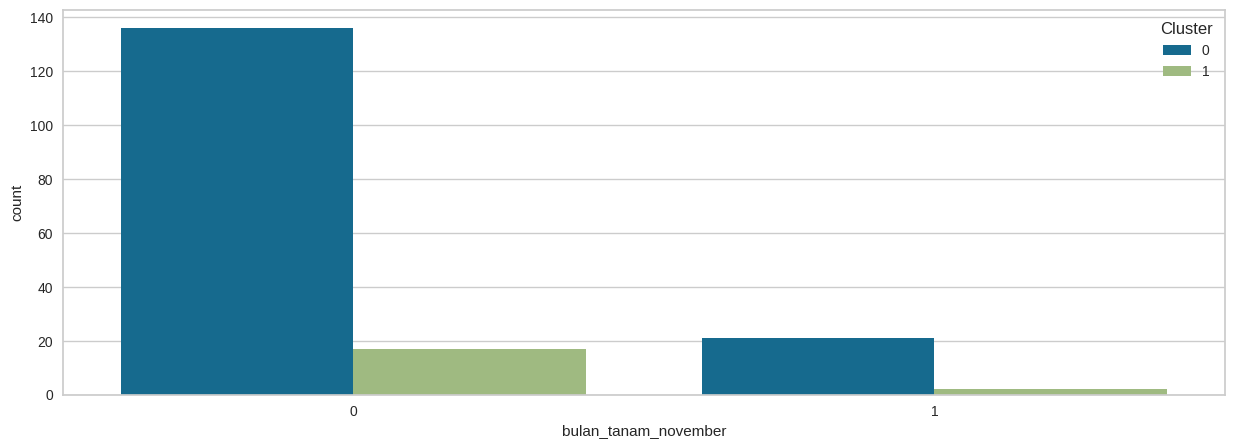

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_november'],order=df_Kmean4['bulan_tanam_november'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari bulan_tanam_desember

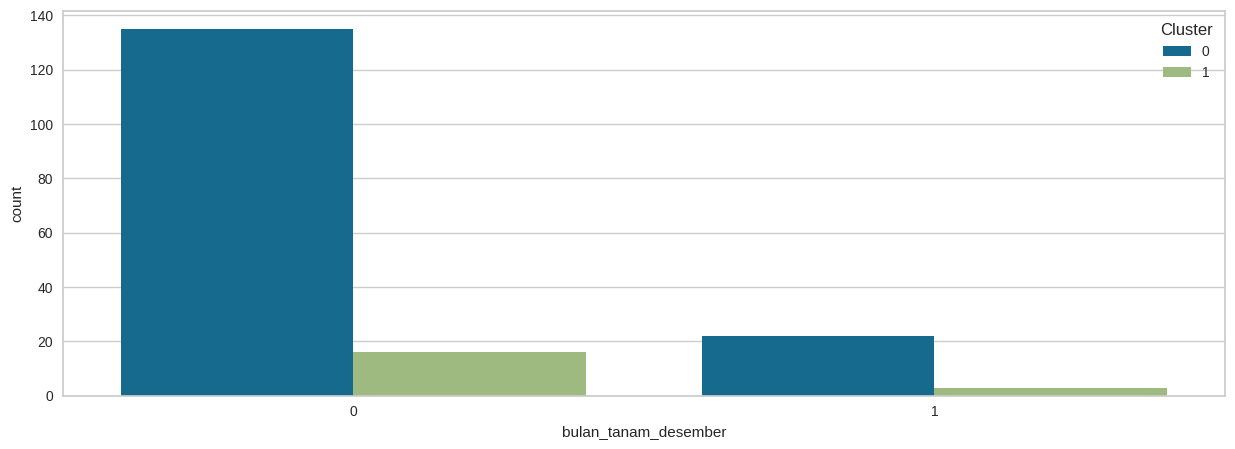

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['bulan_tanam_desember'],order=df_Kmean4['bulan_tanam_desember'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari varietas_bali_karet

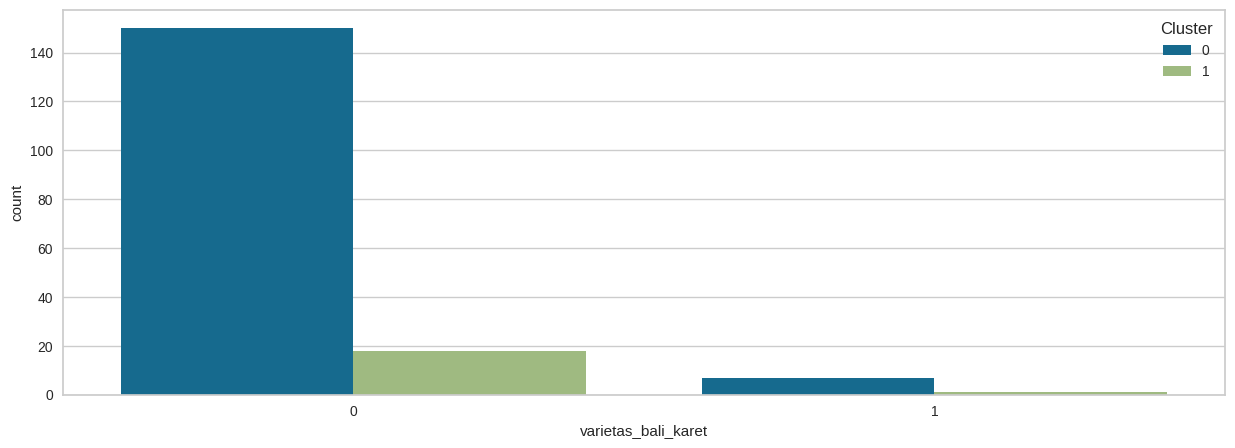

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bali_karet'],order=df_Kmean4['varietas_bali_karet'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari varietas_batu_karet

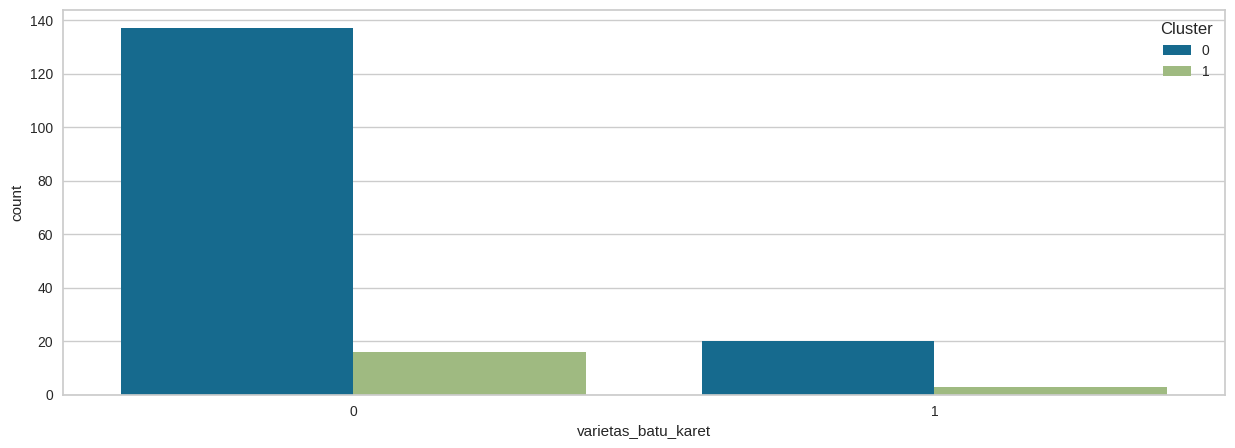

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_batu_karet'],order=df_Kmean4['varietas_batu_karet'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari varietas_bima_brebes

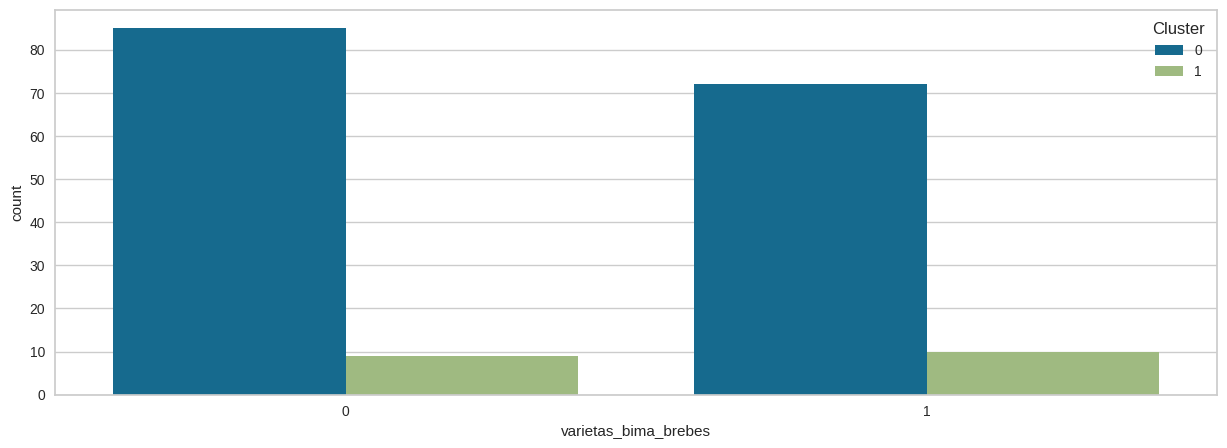

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bima_brebes'],order=df_Kmean4['varietas_bima_brebes'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari varietas_bima_juna

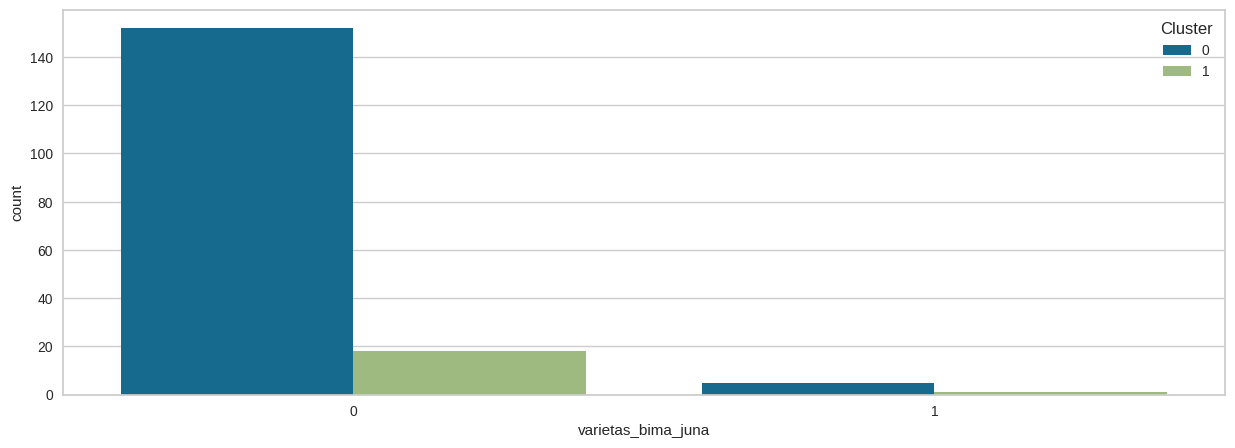

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bima_juna'],order=df_Kmean4['varietas_bima_juna'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari varietas_bima_jokowi

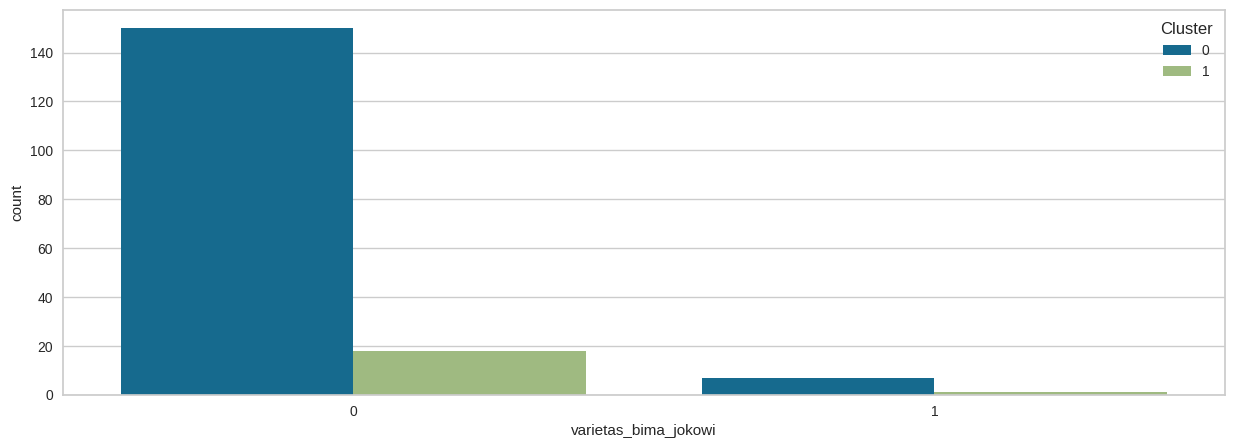

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bima_jokowi'],order=df_Kmean4['varietas_bima_jokowi'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_batu_ijo

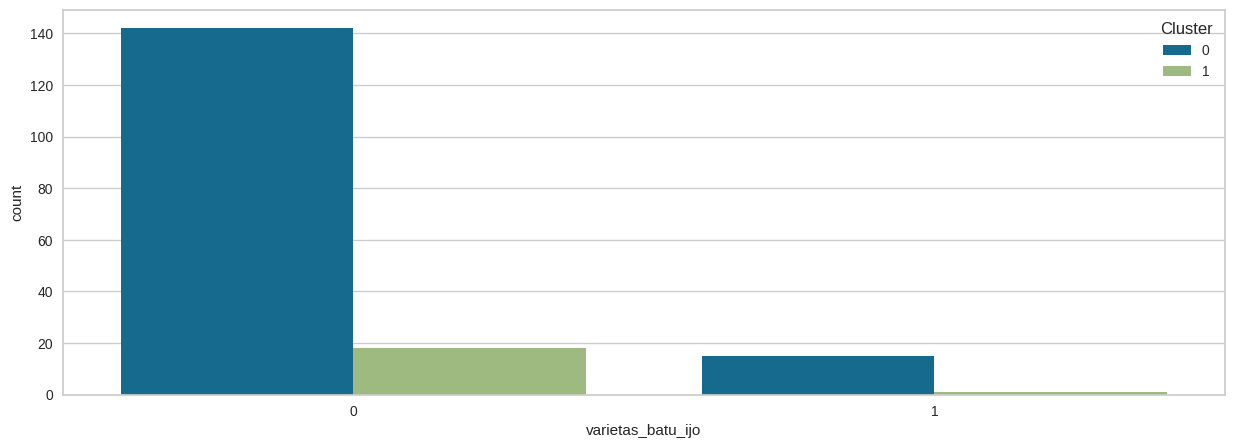

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_batu_ijo'],order=df_Kmean4['varietas_batu_ijo'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_putih

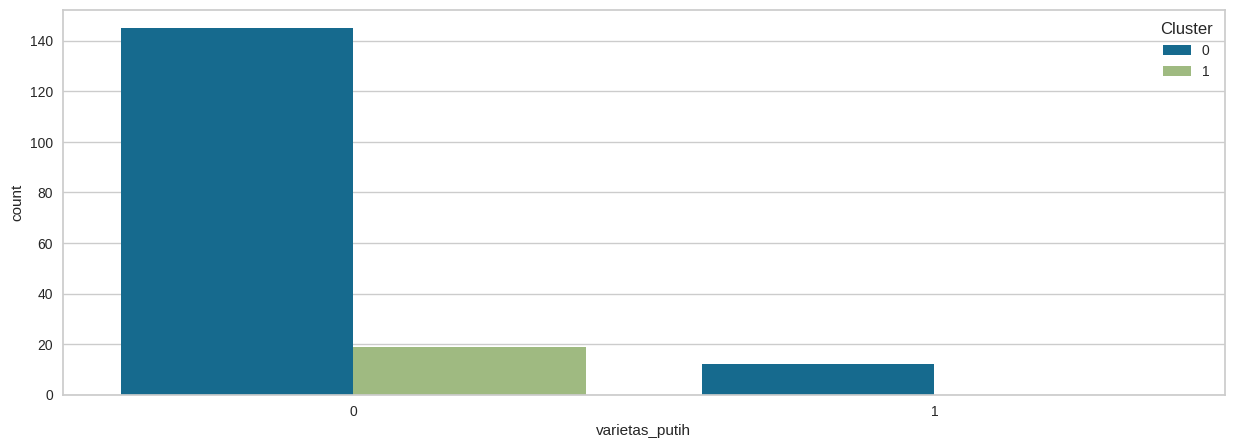

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_putih'],order=df_Kmean4['varietas_putih'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_garut

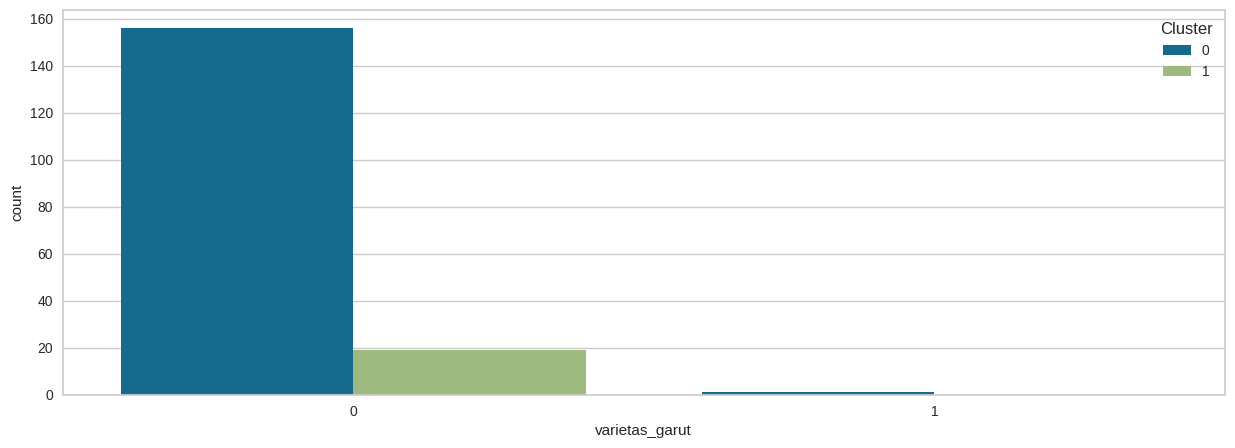

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_garut'],order=df_Kmean4['varietas_garut'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_tanjuk

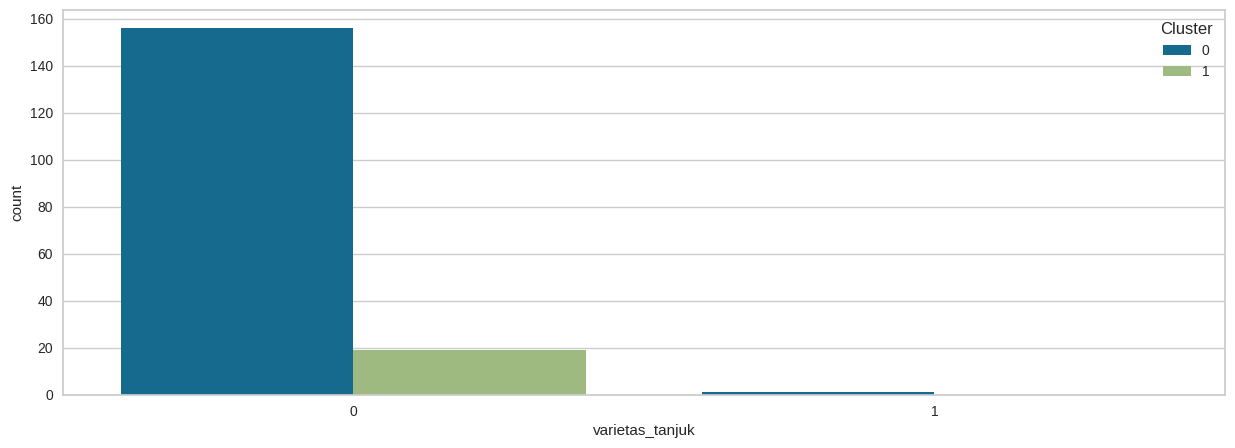

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_tanjuk'],order=df_Kmean4['varietas_tanjuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_bima_curut

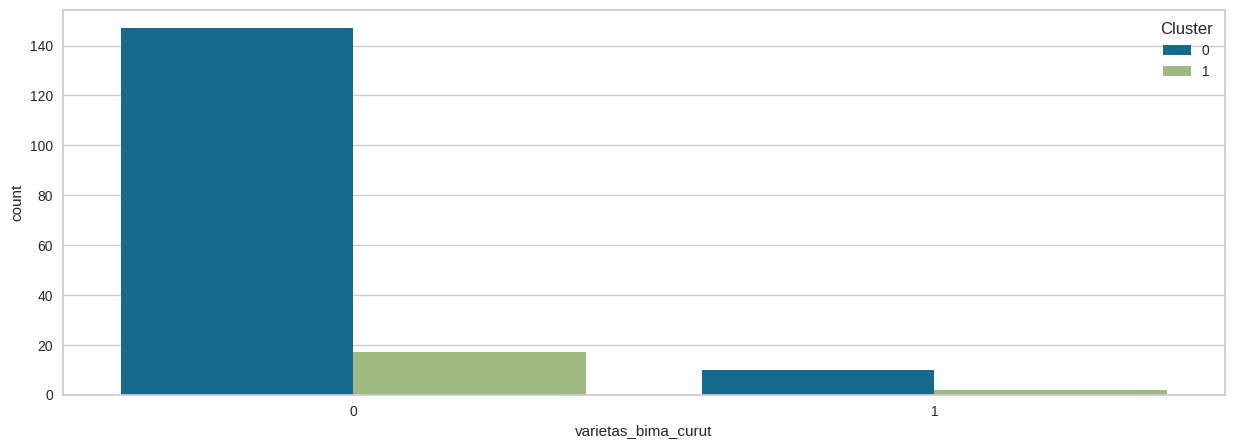

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bima_curut'],order=df_Kmean4['varietas_bima_curut'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_bima_jaya

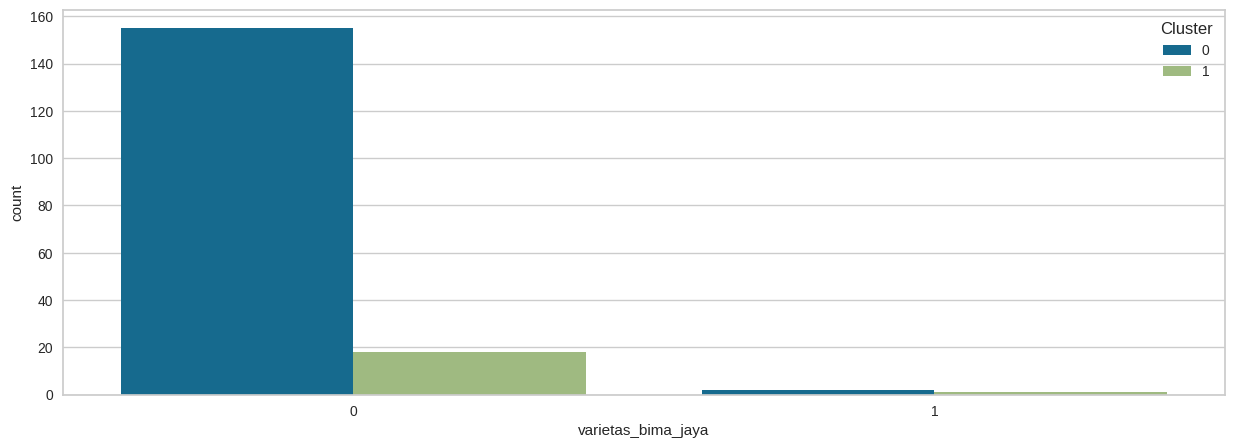

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_bima_jaya'],order=df_Kmean4['varietas_bima_jaya'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari varietas_nganjuk

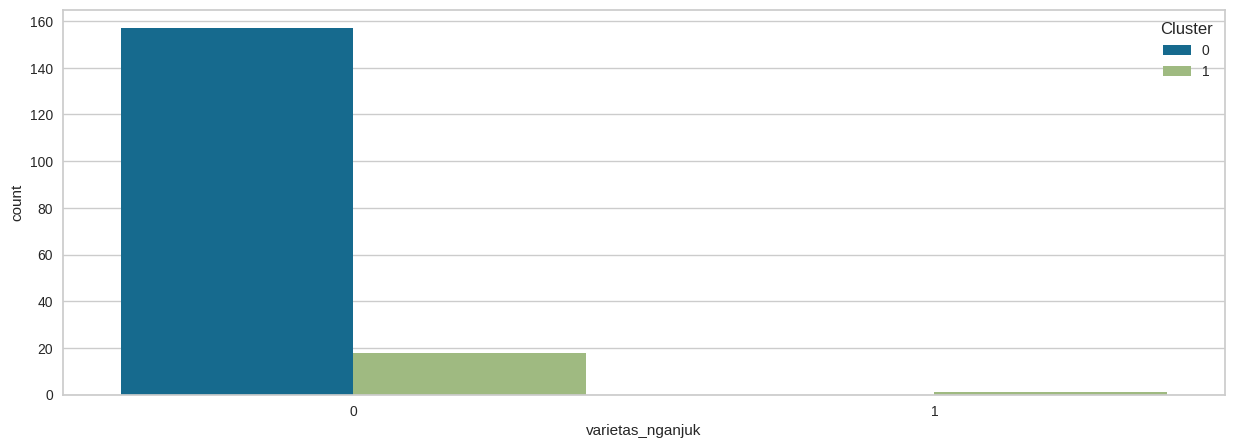

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['varietas_nganjuk'],order=df_Kmean4['varietas_nganjuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari modal_tanam_sendiri

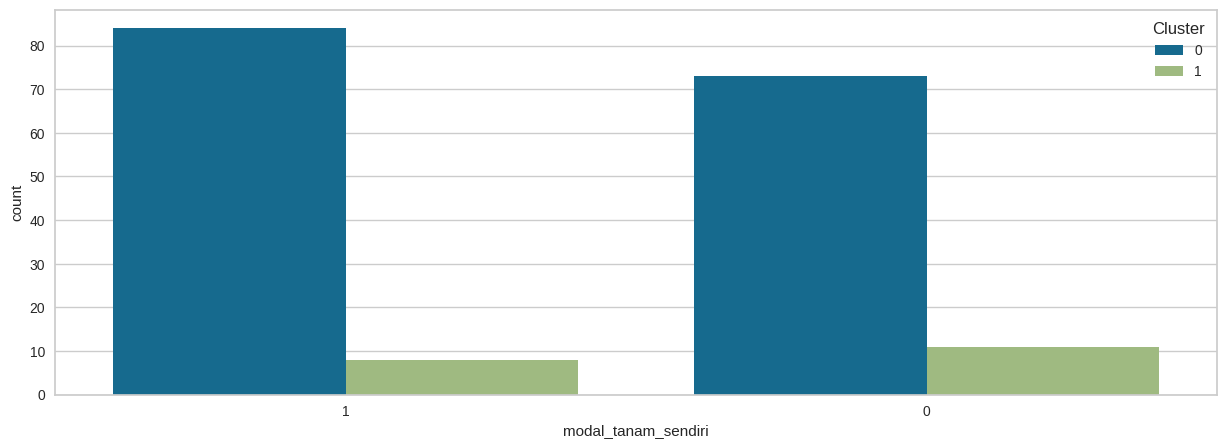

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['modal_tanam_sendiri'],order=df_Kmean4['modal_tanam_sendiri'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari modal_tanam_pinjam

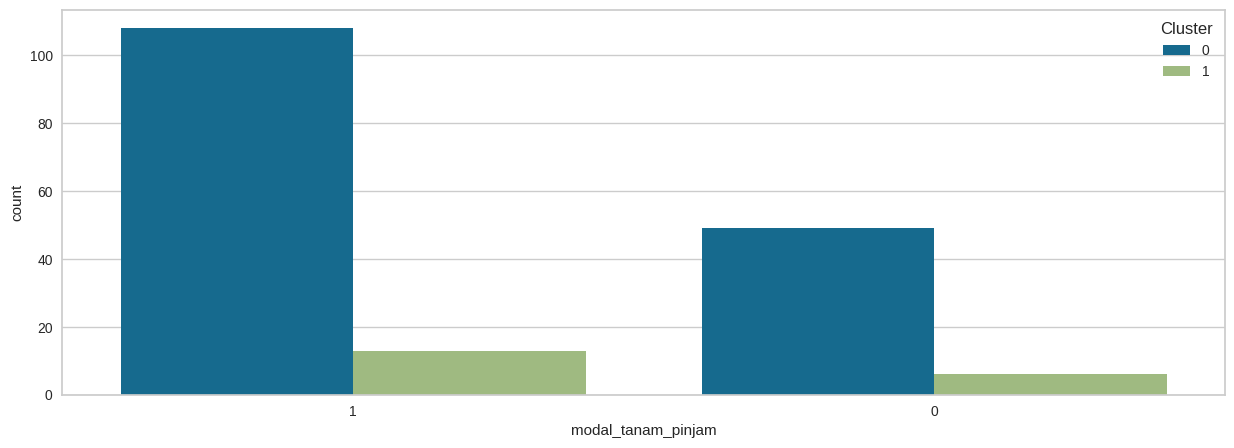

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['modal_tanam_pinjam'],order=df_Kmean4['modal_tanam_pinjam'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari jenis_pupuk_organik

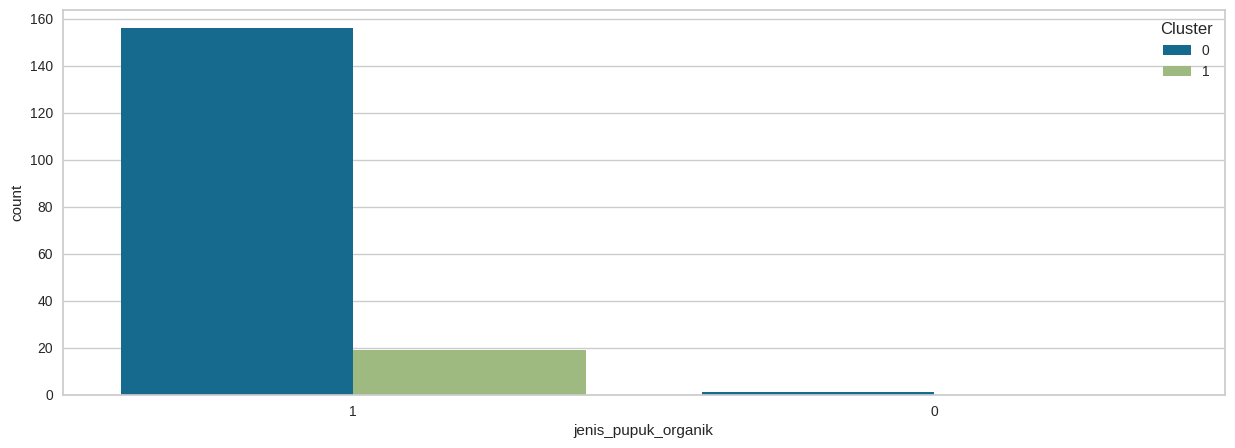

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jenis_pupuk_organik'],order=df_Kmean4['jenis_pupuk_organik'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari jenis_pupuk_anorganik

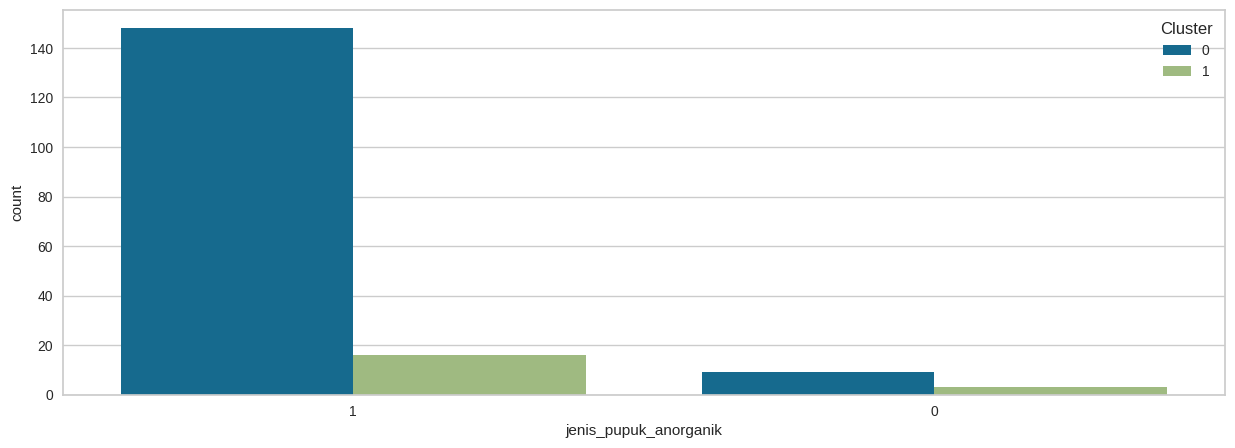

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jenis_pupuk_anorganik'],order=df_Kmean4['jenis_pupuk_anorganik'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_bantuan

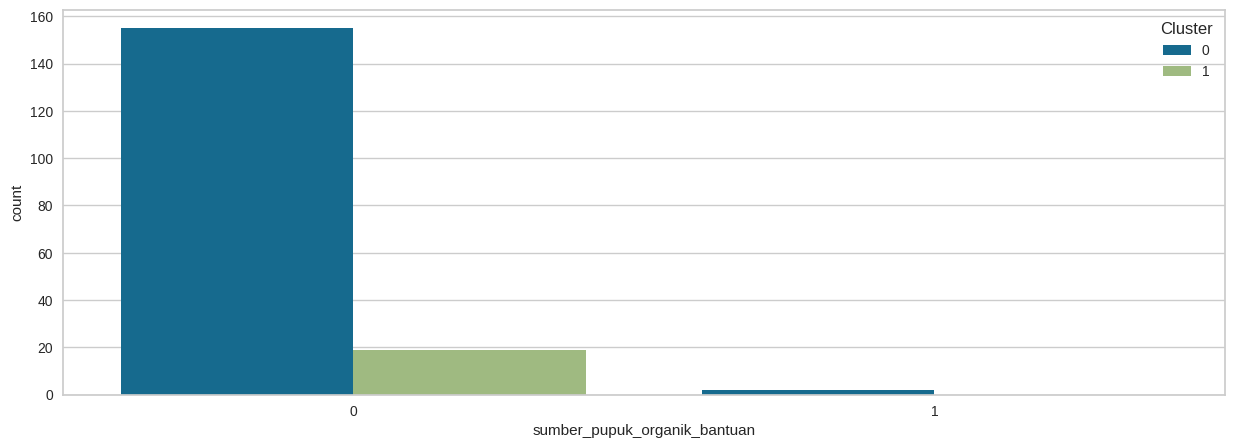

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_bantuan'],order=df_Kmean4['sumber_pupuk_organik_bantuan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_beli_dipeternak

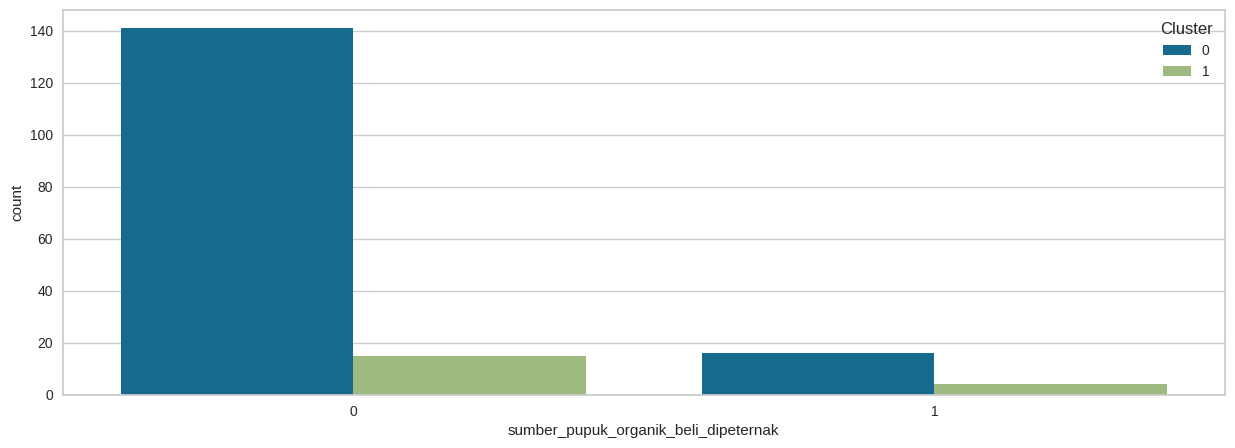

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_beli_dipeternak'],order=df_Kmean4['sumber_pupuk_organik_beli_dipeternak'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_kompos

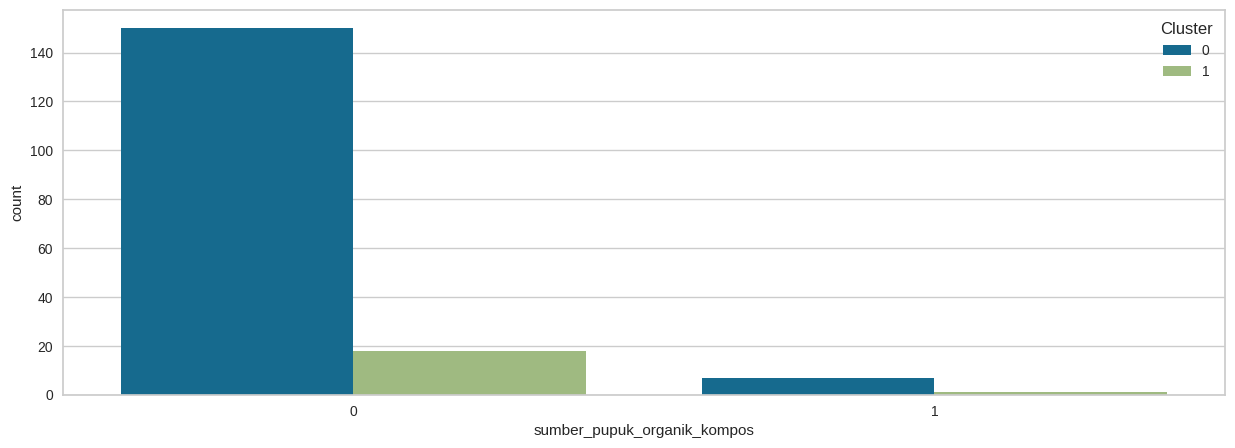

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kompos'],order=df_Kmean4['sumber_pupuk_organik_kompos'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_buat_sendiri

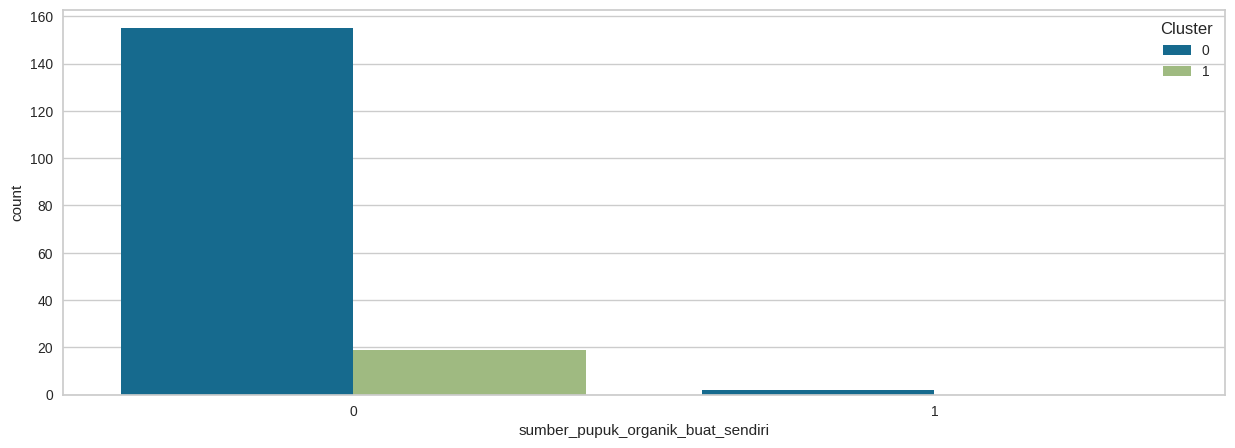

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_buat_sendiri'],order=df_Kmean4['sumber_pupuk_organik_buat_sendiri'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_kelompok_tani

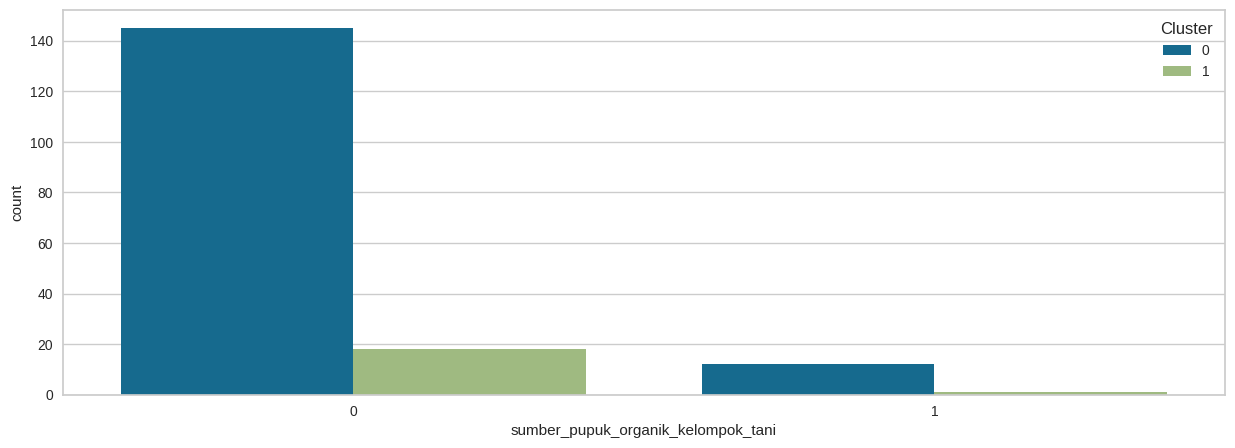

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kelompok_tani'],order=df_Kmean4['sumber_pupuk_organik_kelompok_tani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_toko_pertanian

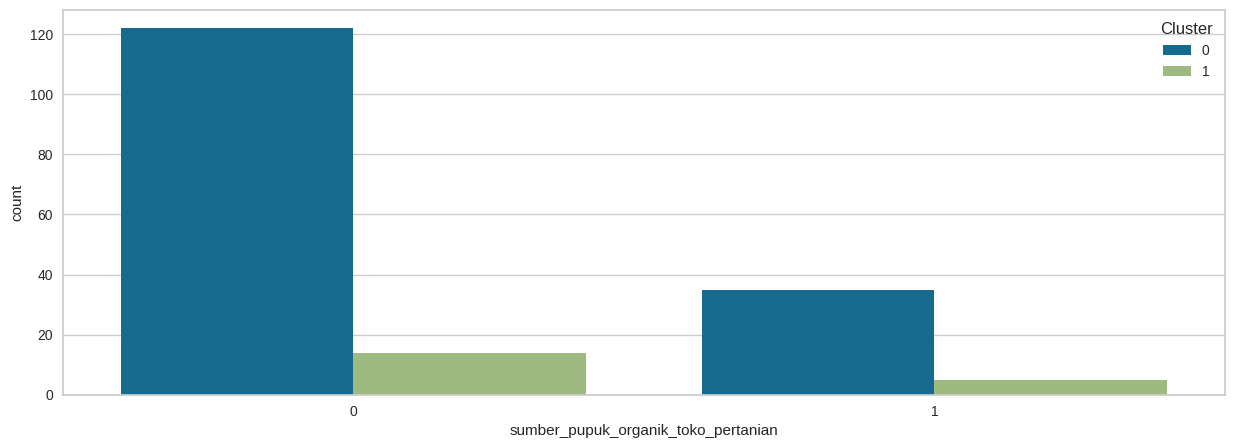

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_toko_pertanian'],order=df_Kmean4['sumber_pupuk_organik_toko_pertanian'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_kotoran_ayam

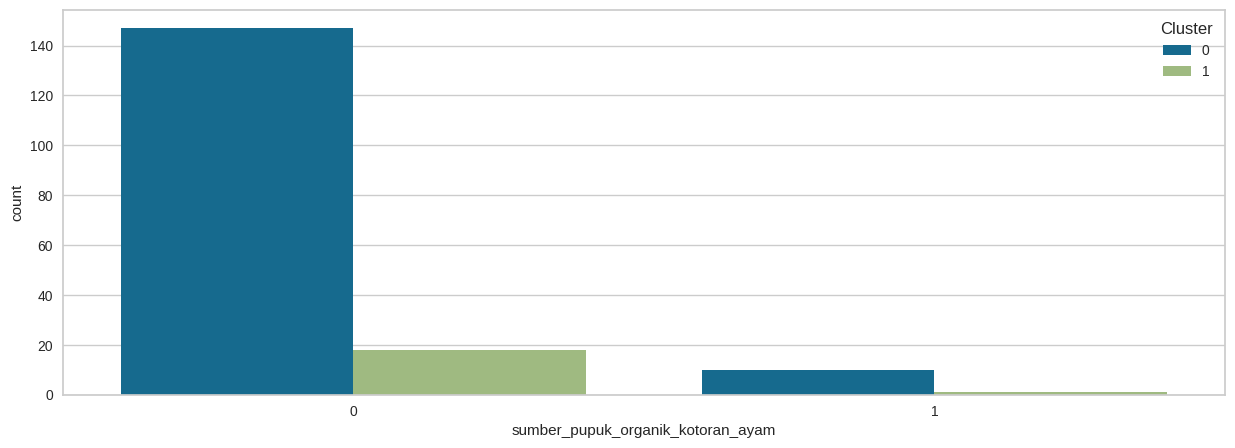

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kotoran_ayam'],order=df_Kmean4['sumber_pupuk_organik_kotoran_ayam'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_kotoran_sapi

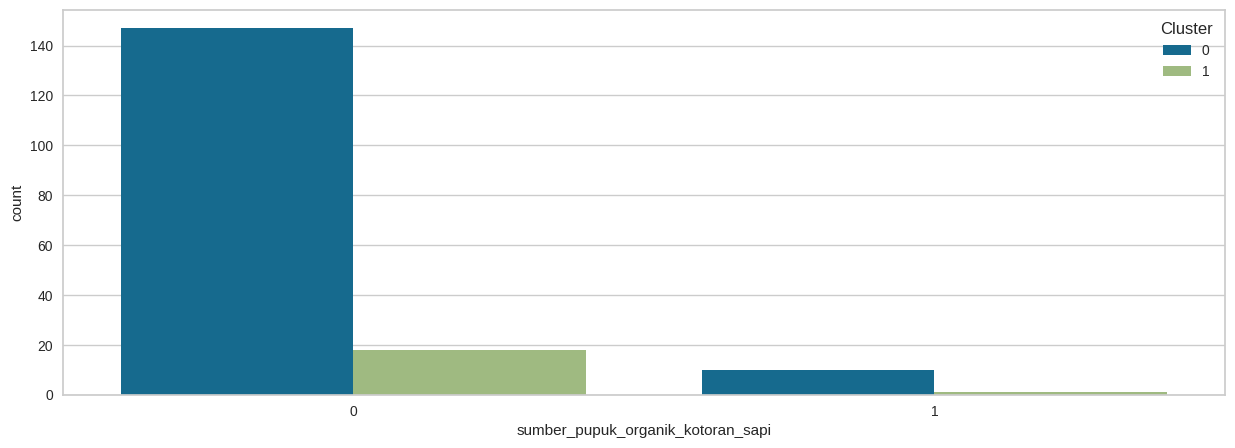

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kotoran_sapi'],order=df_Kmean4['sumber_pupuk_organik_kotoran_sapi'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_organik_kotoran_kambing

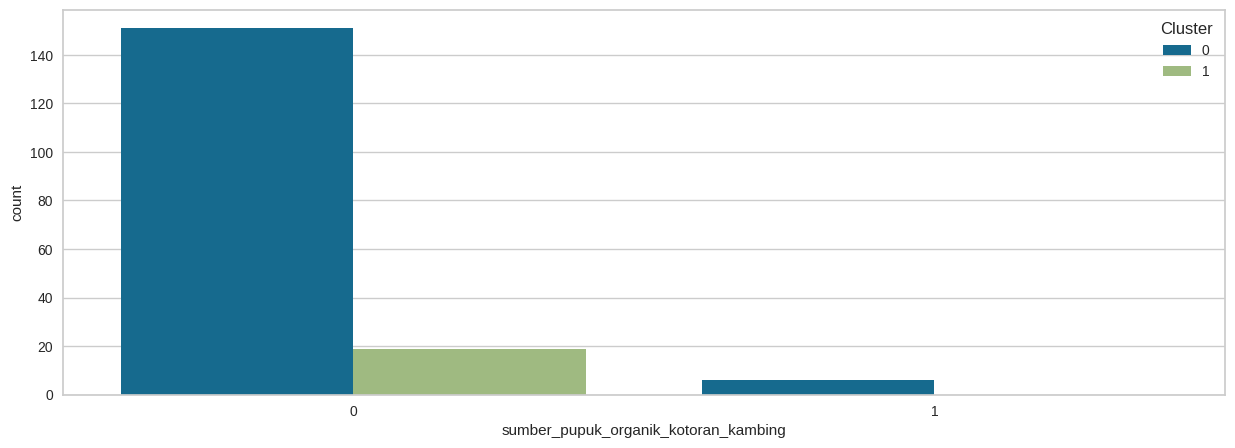

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kotoran_kambing'],order=df_Kmean4['sumber_pupuk_organik_kotoran_kambing'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari sumber_pupuk_organik_kotoran_hewan

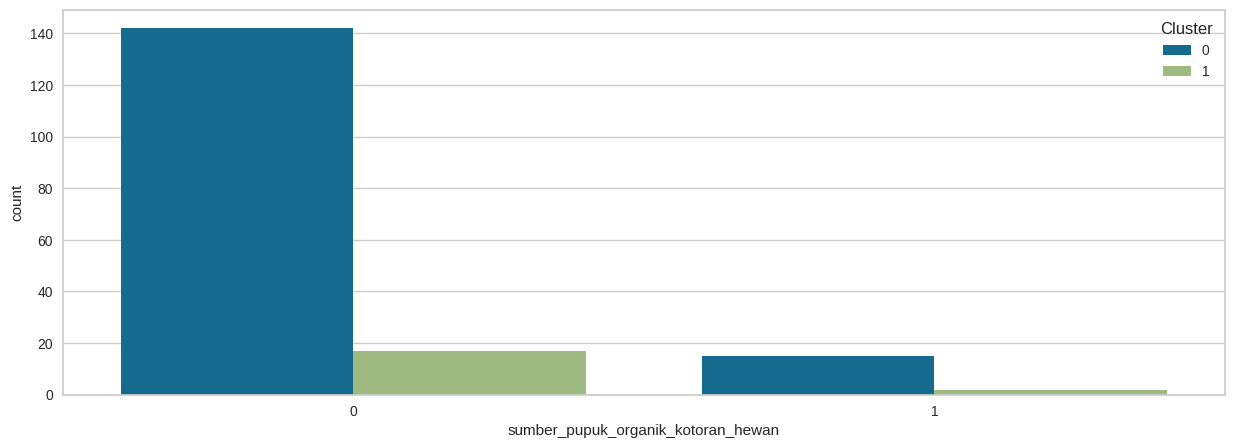

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_organik_kotoran_hewan'],order=df_Kmean4['sumber_pupuk_organik_kotoran_hewan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_anorganik_toko_pertanian

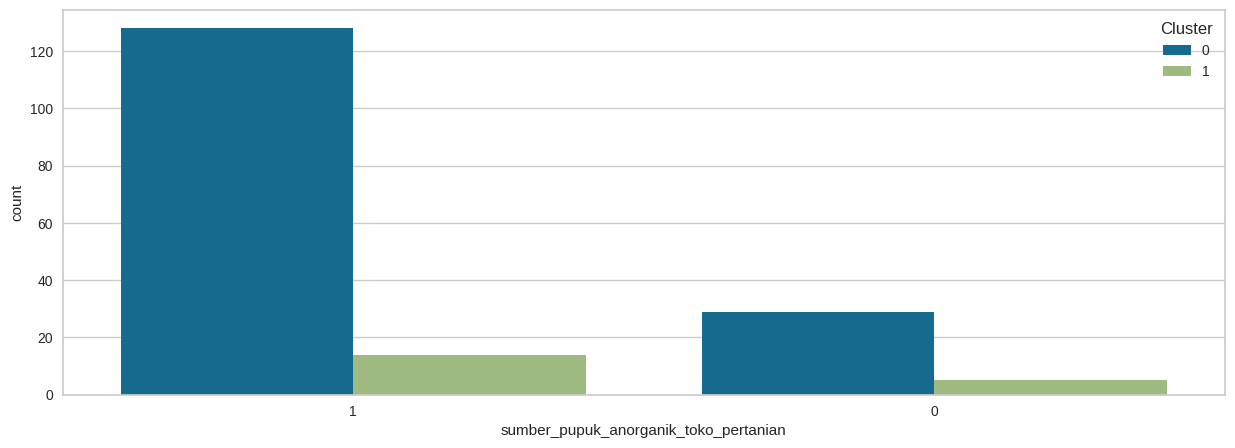

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_anorganik_toko_pertanian'],order=df_Kmean4['sumber_pupuk_anorganik_toko_pertanian'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari sumber_pupuk_anorganik_kelompok_tani

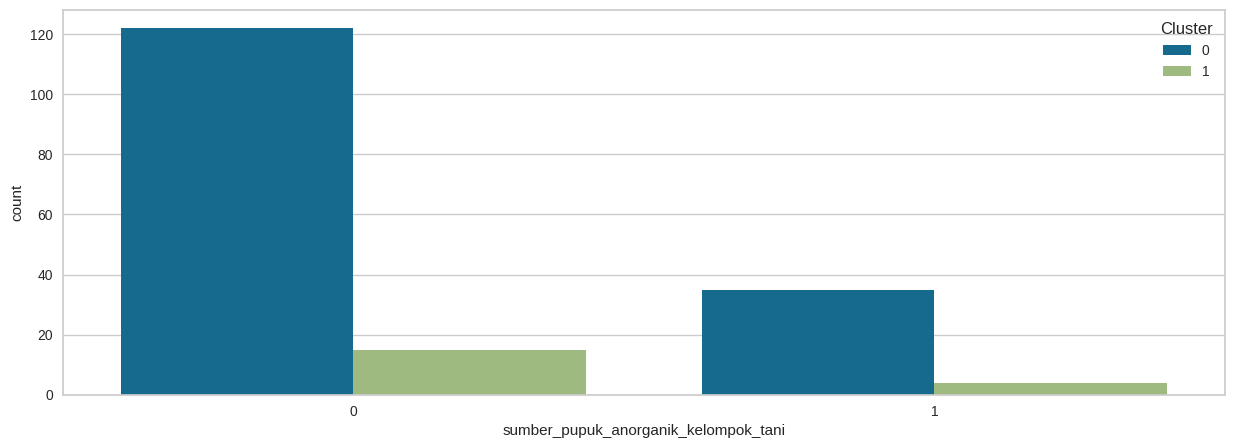

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_anorganik_kelompok_tani'],order=df_Kmean4['sumber_pupuk_anorganik_kelompok_tani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari sumber_pupuk_anorganik_peternak

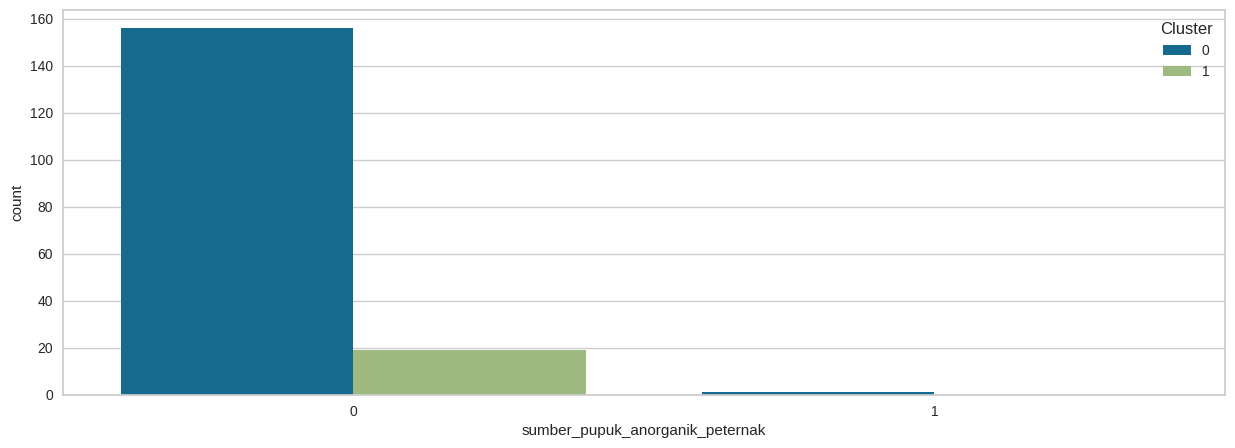

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['sumber_pupuk_anorganik_peternak'],order=df_Kmean4['sumber_pupuk_anorganik_peternak'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_bio_to_grow

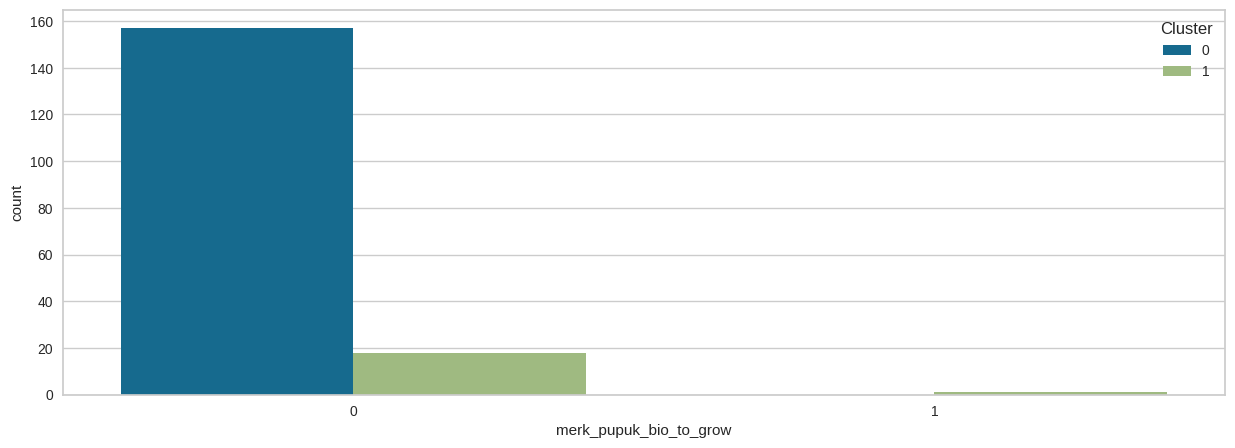

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_bio_to_grow'],order=df_Kmean4['merk_pupuk_bio_to_grow'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari merk_pupuk_meganic

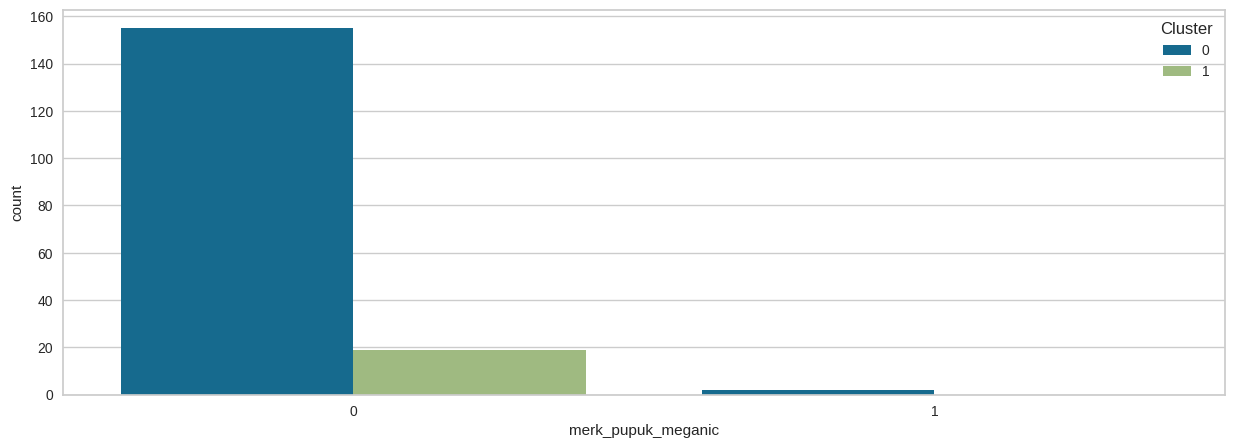

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_meganic'],order=df_Kmean4['merk_pupuk_meganic'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari merk_pupuk_dgw

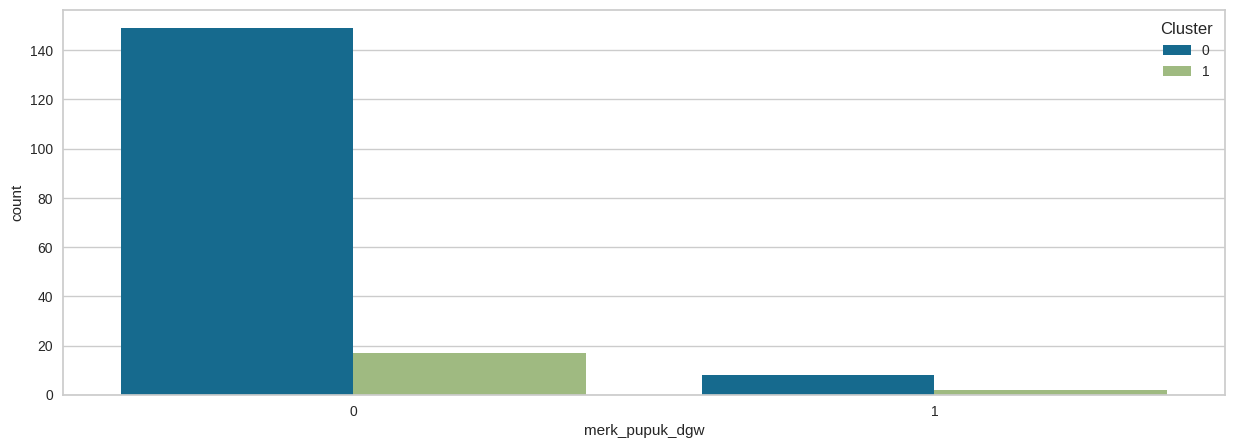

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_dgw'],order=df_Kmean4['merk_pupuk_dgw'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_mutiara

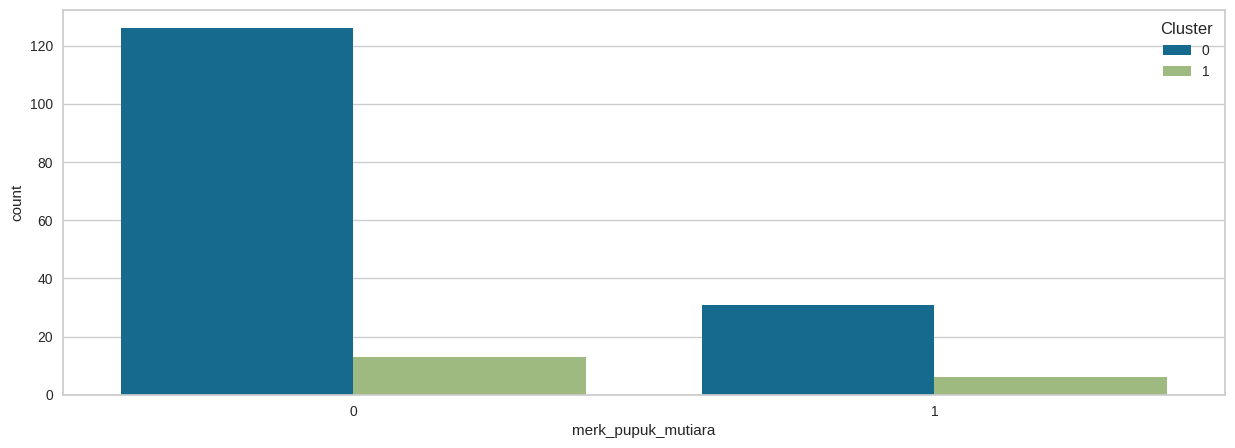

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_mutiara'],order=df_Kmean4['merk_pupuk_mutiara'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_phoska

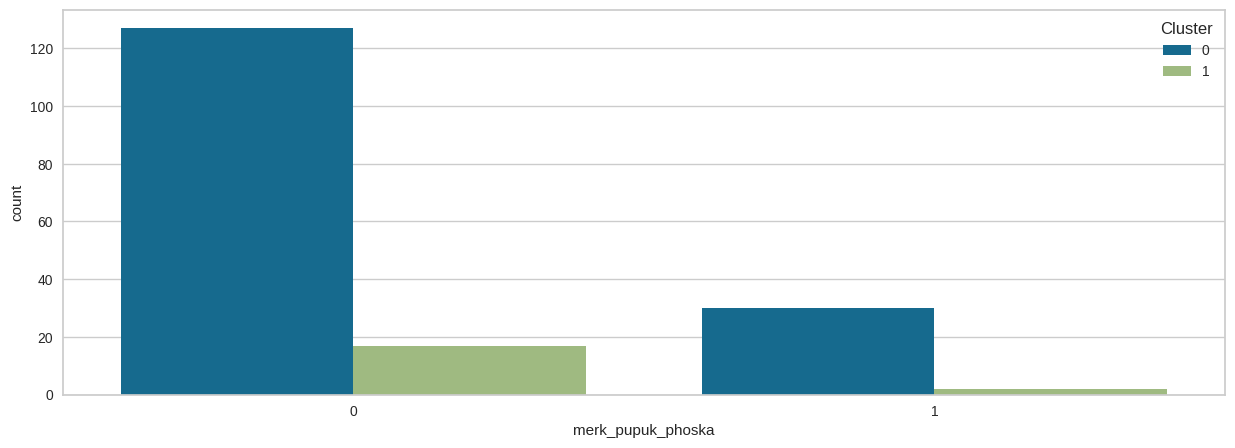

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_phoska'],order=df_Kmean4['merk_pupuk_phoska'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_saprodap

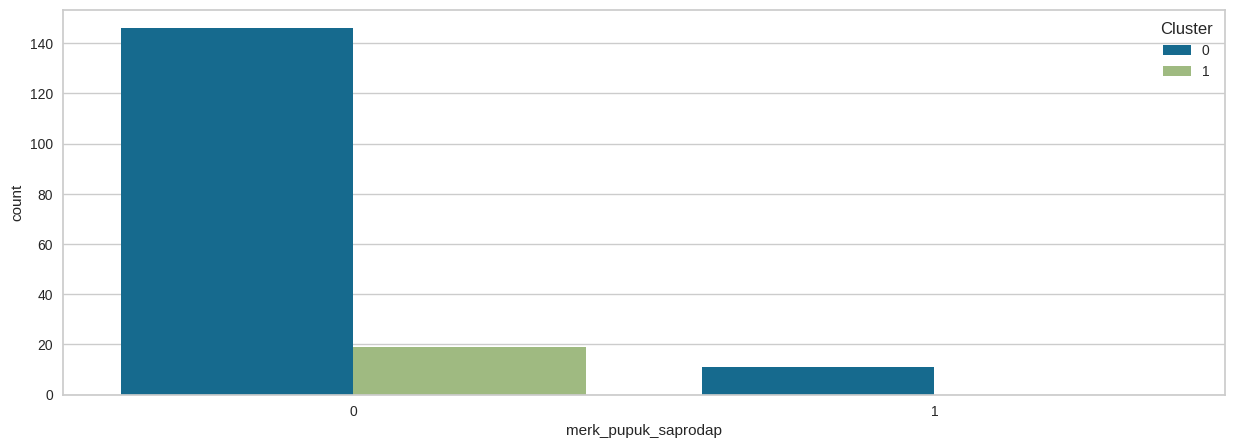

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_saprodap'],order=df_Kmean4['merk_pupuk_saprodap'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_hcl

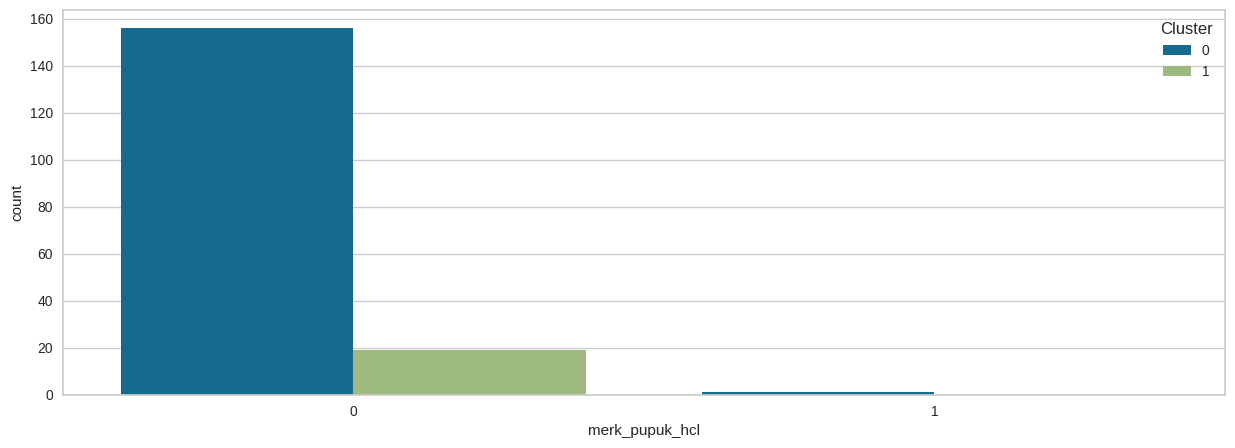

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_hcl'],order=df_Kmean4['merk_pupuk_hcl'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_kamas

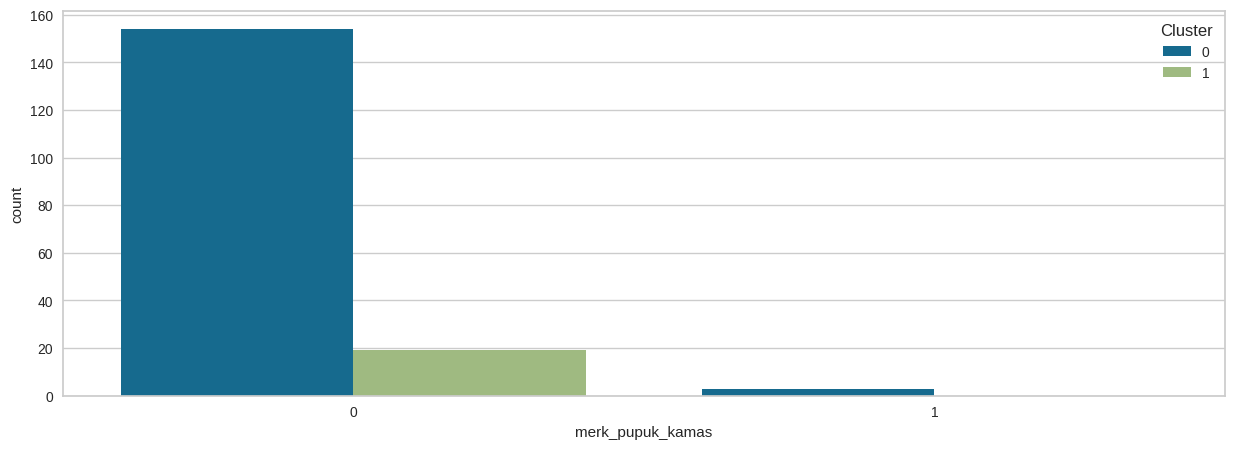

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_kamas'],order=df_Kmean4['merk_pupuk_kamas'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_meroke

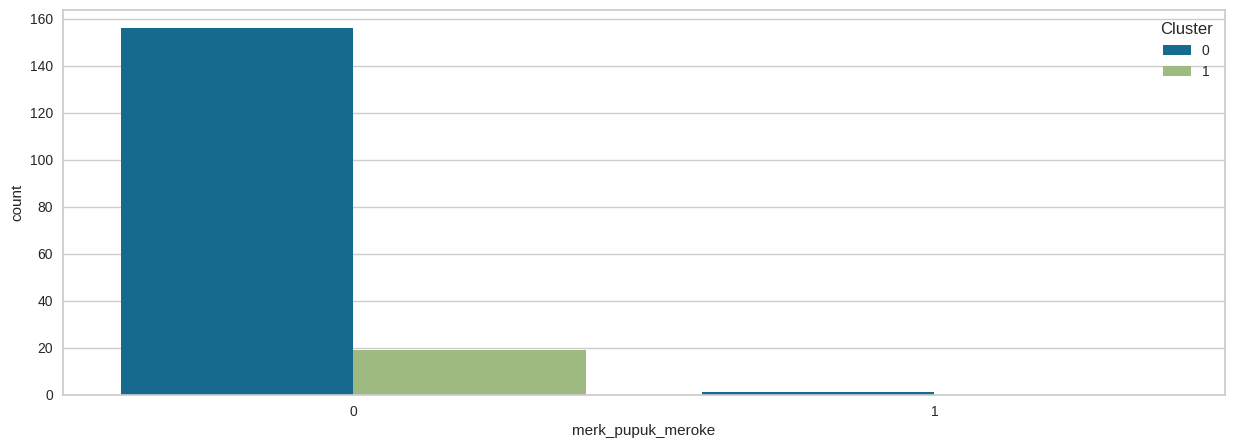

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_meroke'],order=df_Kmean4['merk_pupuk_meroke'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_pak_tani

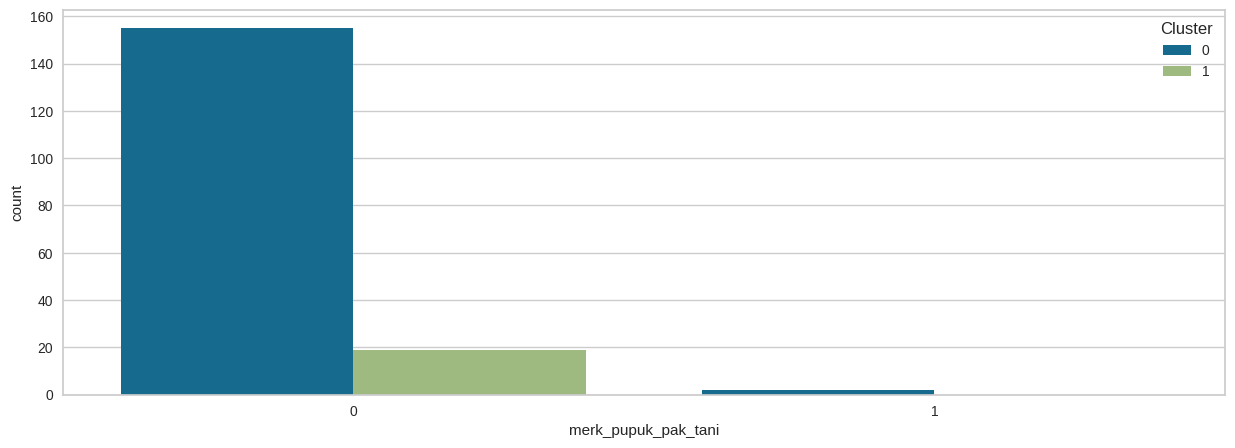

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_pak_tani'],order=df_Kmean4['merk_pupuk_pak_tani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_lao_ying

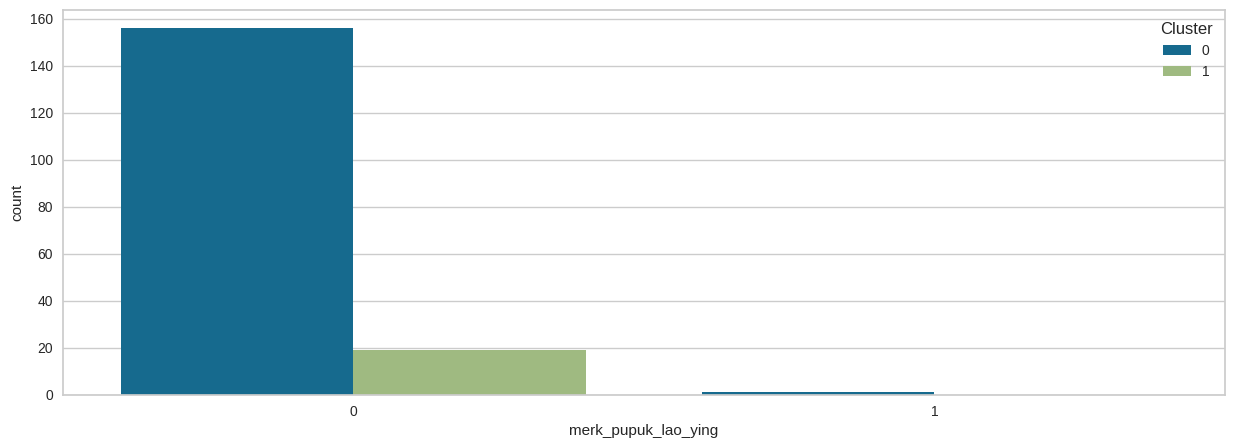

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_lao_ying'],order=df_Kmean4['merk_pupuk_lao_ying'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_mkp

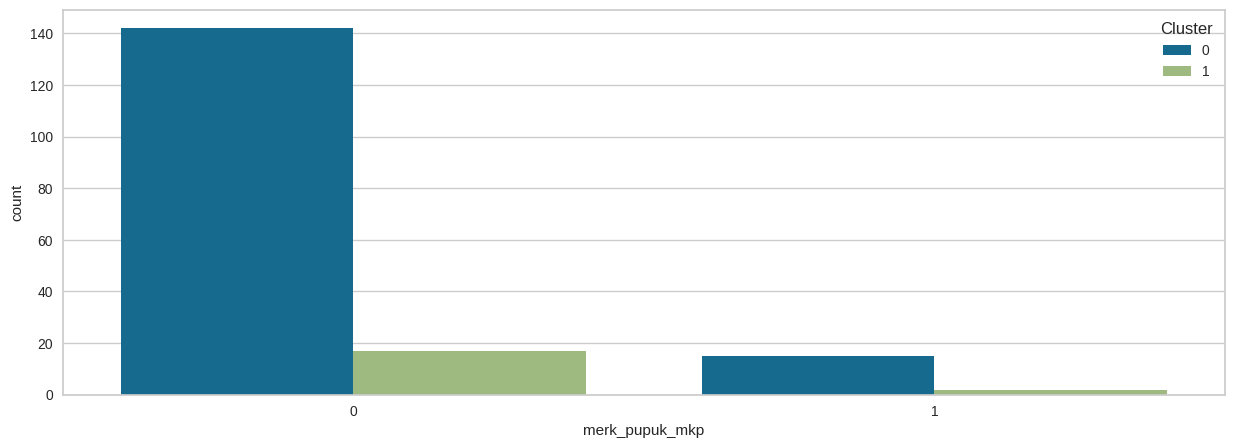

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_mkp'],order=df_Kmean4['merk_pupuk_mkp'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_phonska

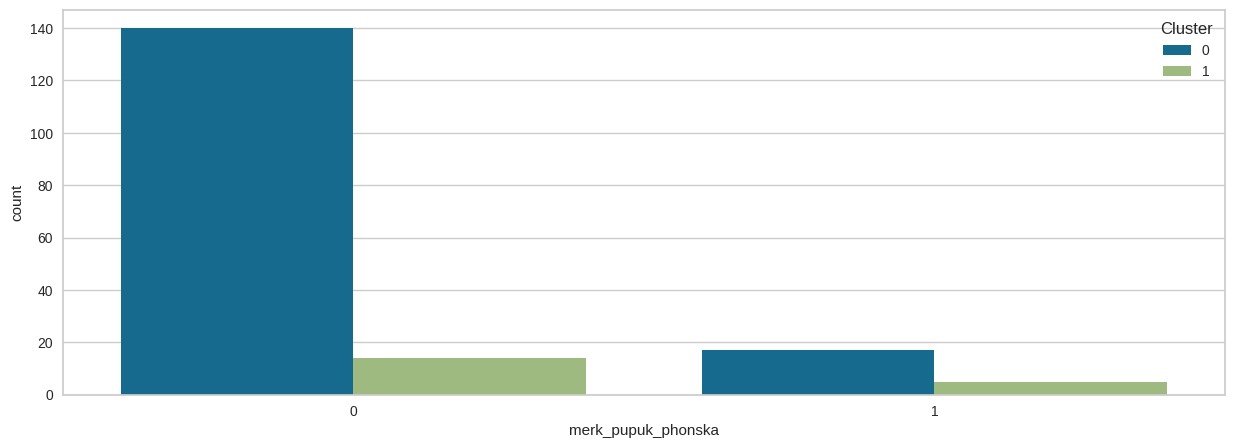

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_phonska'],order=df_Kmean4['merk_pupuk_phonska'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_za

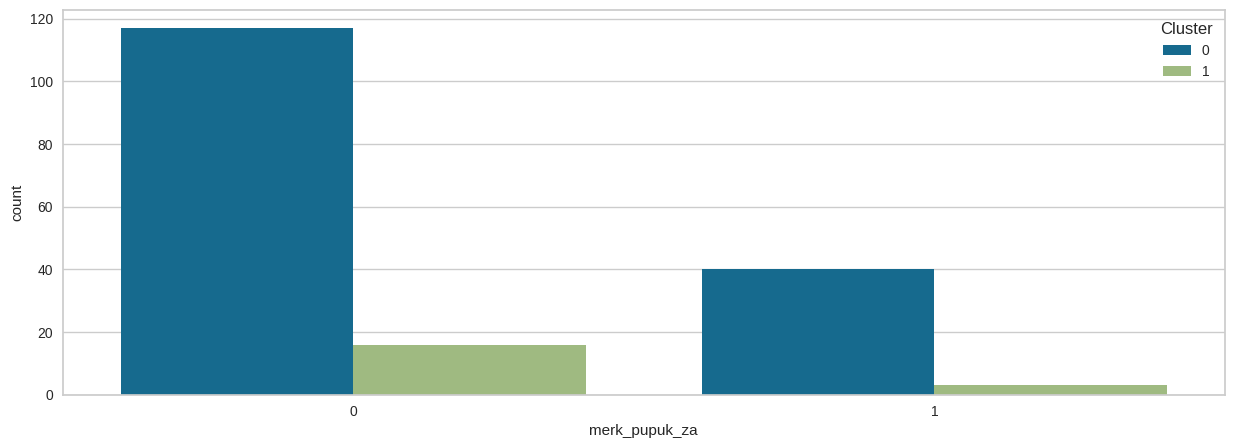

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_za'],order=df_Kmean4['merk_pupuk_za'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_dap

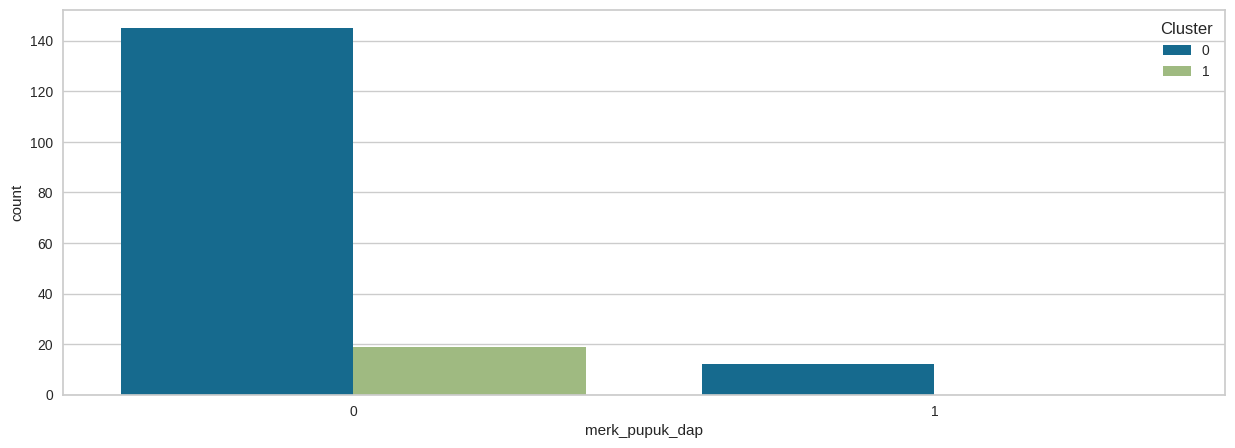

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_dap'],order=df_Kmean4['merk_pupuk_dap'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari merk_pupuk_golden_max

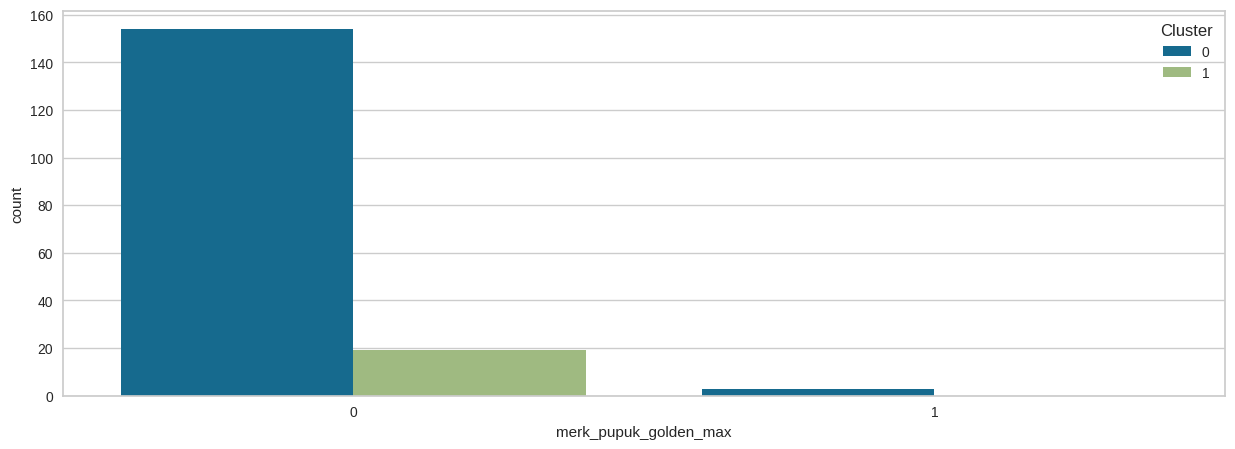

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_golden_max'],order=df_Kmean4['merk_pupuk_golden_max'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_kcl

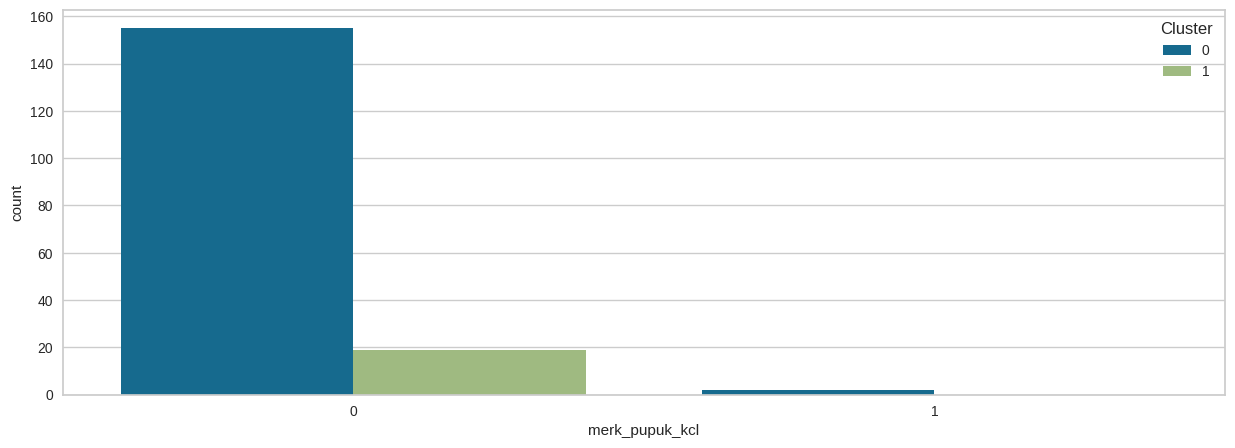

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_kcl'],order=df_Kmean4['merk_pupuk_kcl'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_mahkota

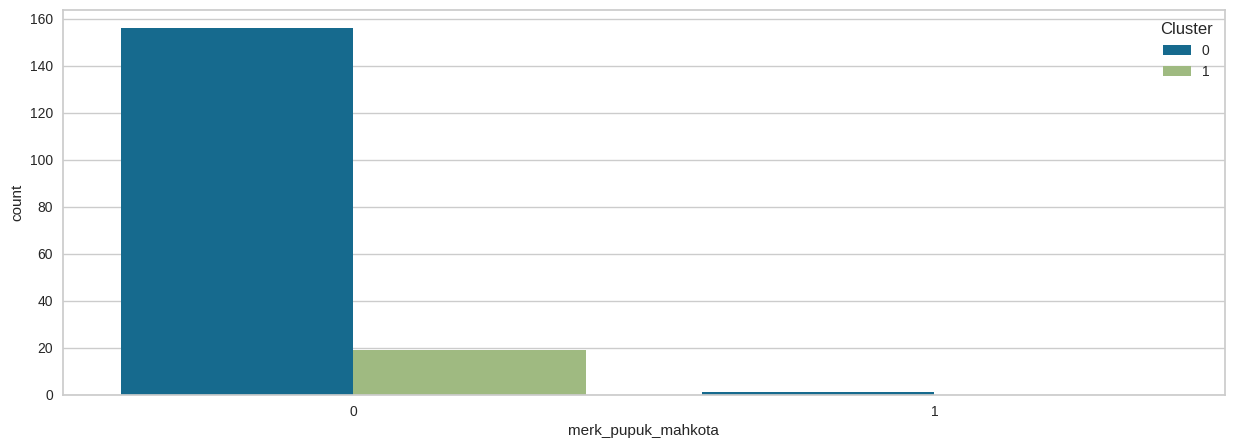

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_mahkota'],order=df_Kmean4['merk_pupuk_mahkota'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_npk

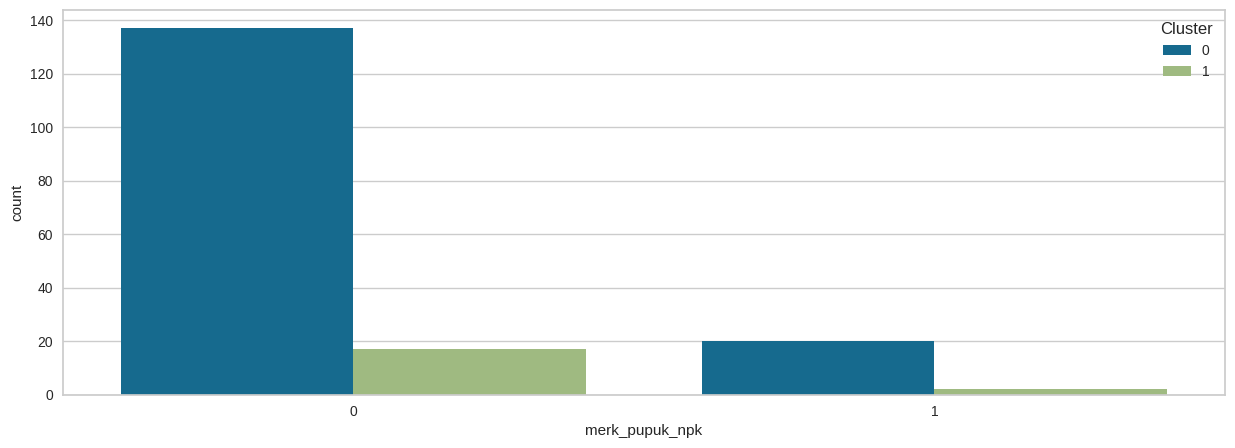

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_npk'],order=df_Kmean4['merk_pupuk_npk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_sp36

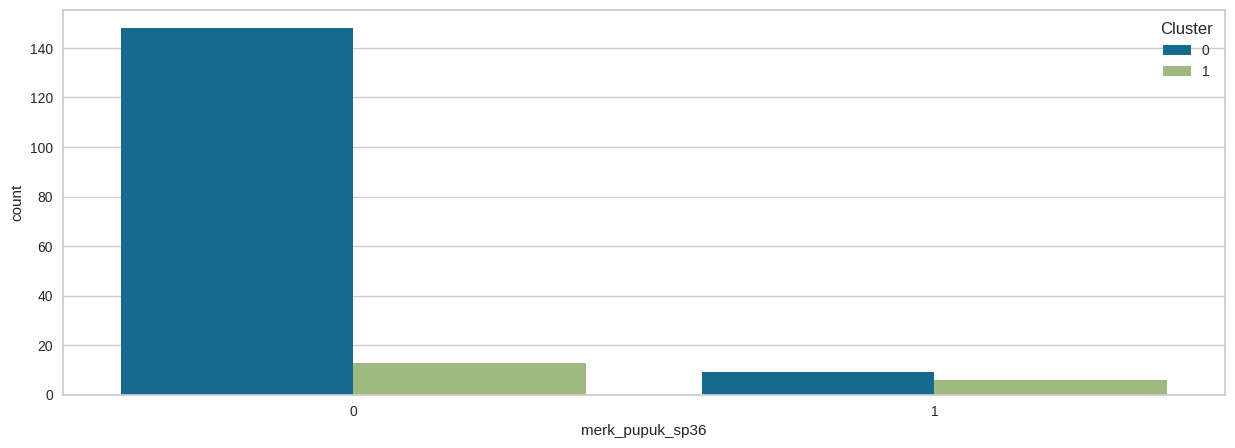

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_sp36'],order=df_Kmean4['merk_pupuk_sp36'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_subur_kali

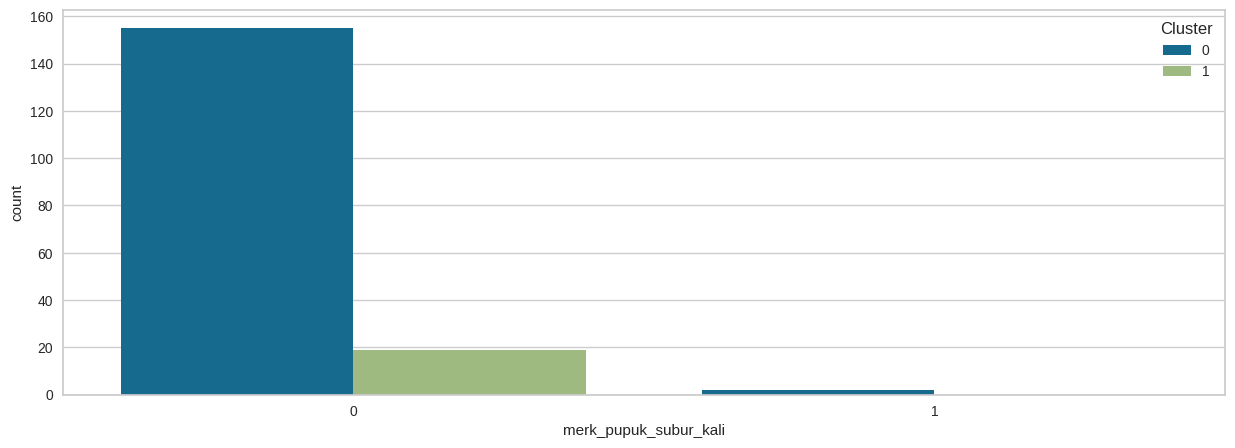

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_subur_kali'],order=df_Kmean4['merk_pupuk_subur_kali'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_ksn

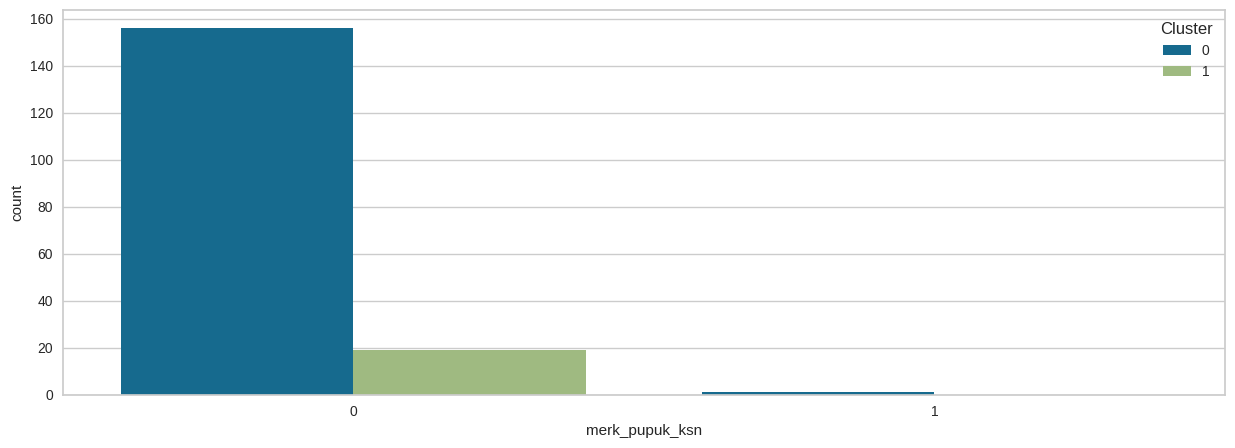

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_ksn'],order=df_Kmean4['merk_pupuk_ksn'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_petroganik

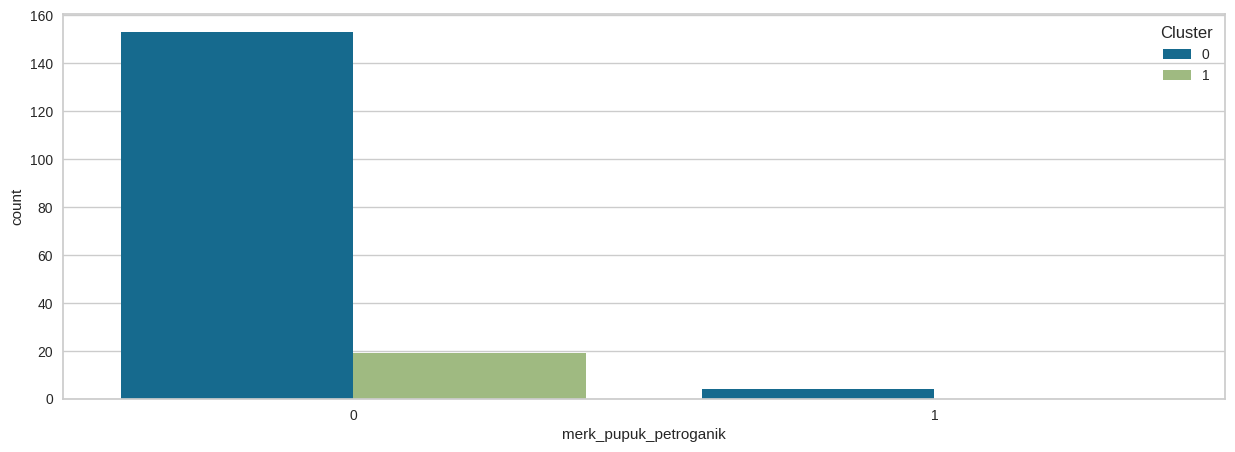

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_petroganik'],order=df_Kmean4['merk_pupuk_petroganik'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_luar_negeri

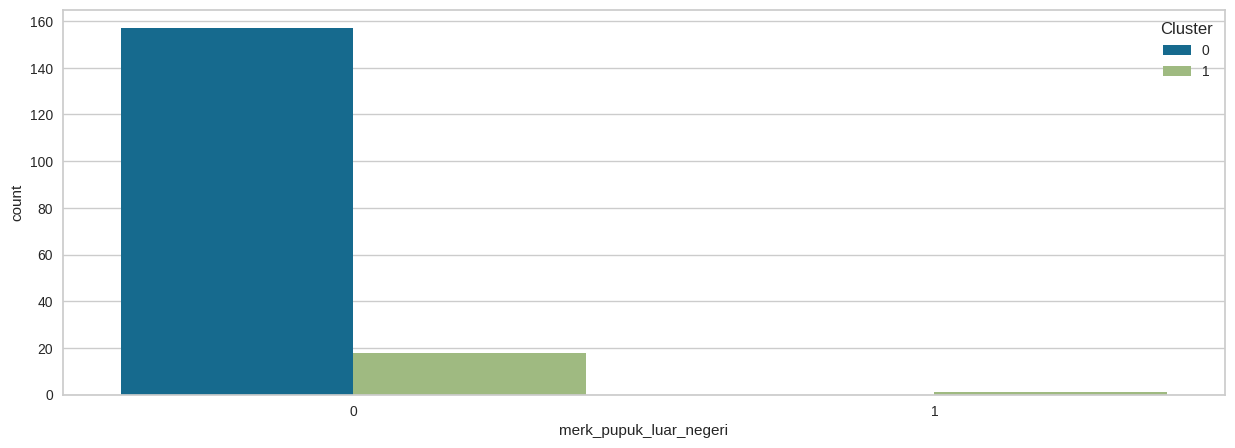

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_luar_negeri'],order=df_Kmean4['merk_pupuk_luar_negeri'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_randex

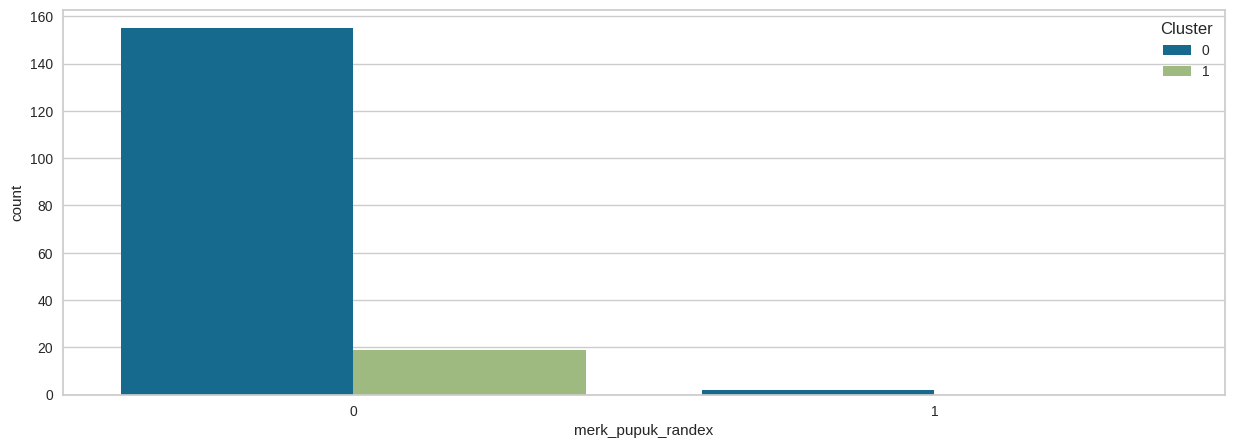

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_randex'],order=df_Kmean4['merk_pupuk_randex'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_urea

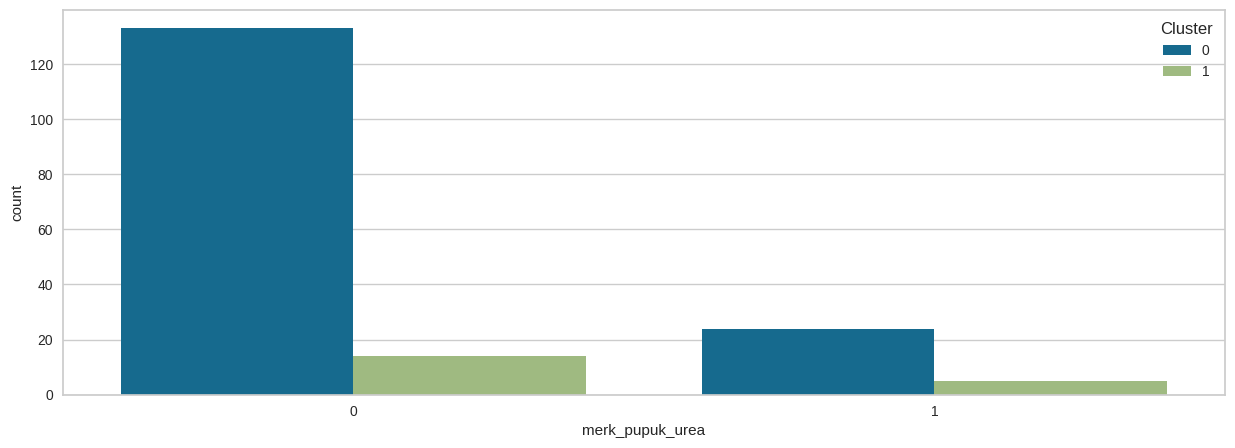

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_urea'],order=df_Kmean4['merk_pupuk_urea'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari merk_pupuk_fosfat

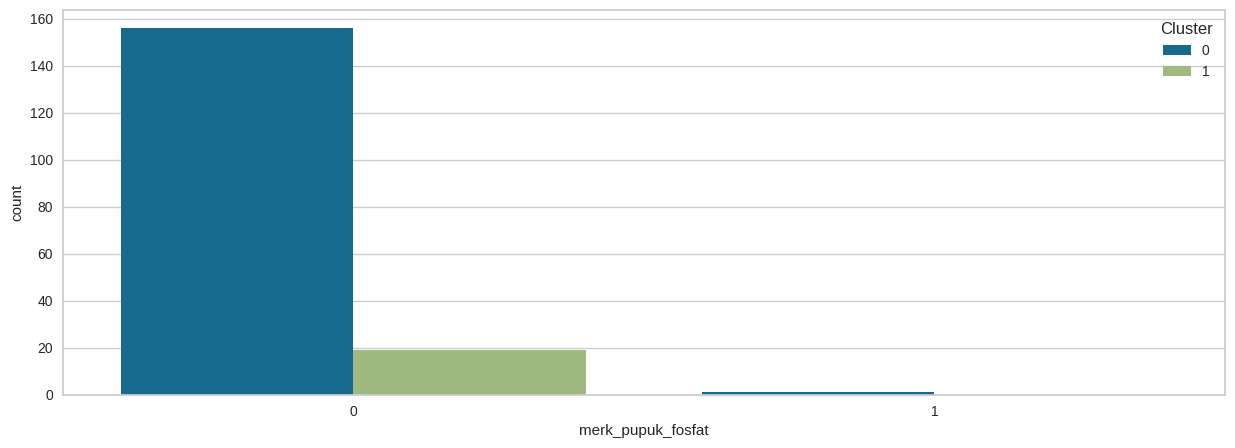

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['merk_pupuk_fosfat'],order=df_Kmean4['merk_pupuk_fosfat'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari hama_grandong

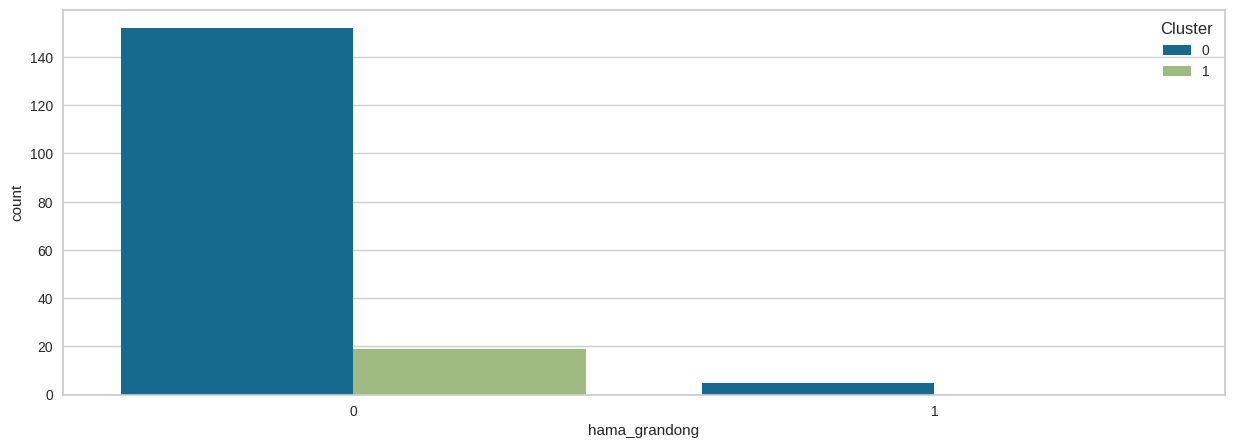

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_grandong'],order=df_Kmean4['hama_grandong'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari hama_ulat

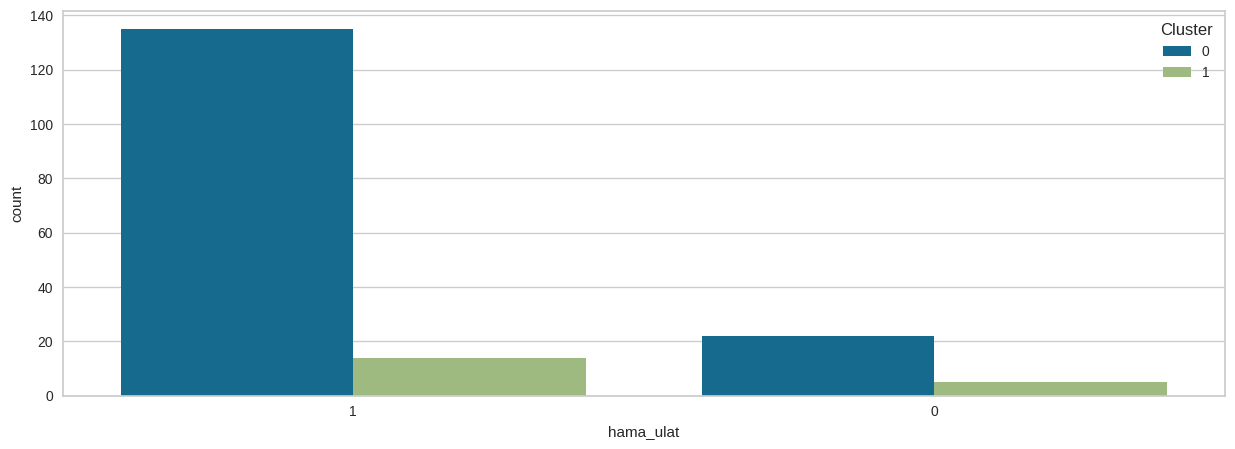

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_ulat'],order=df_Kmean4['hama_ulat'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari hama_lalat

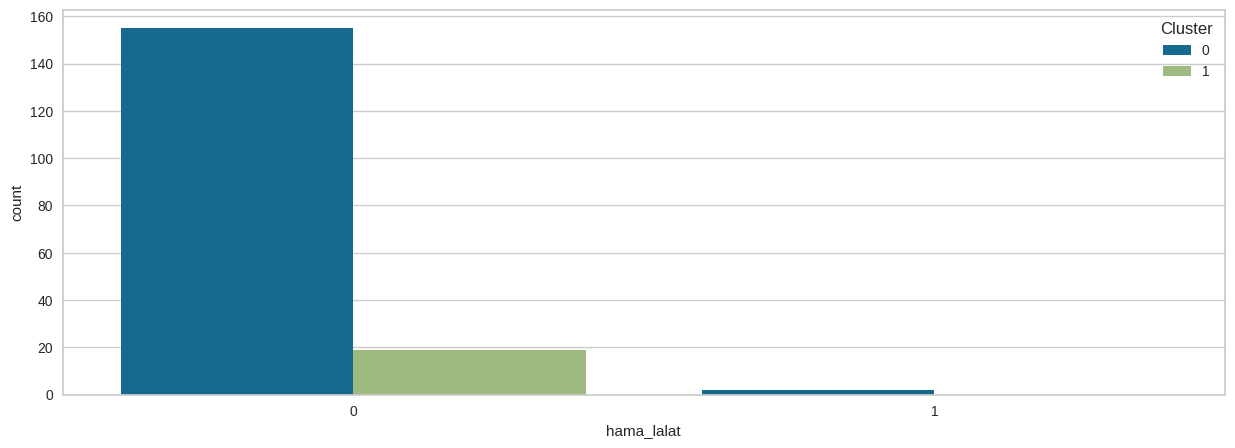

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_lalat'],order=df_Kmean4['hama_lalat'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari hama_kutu

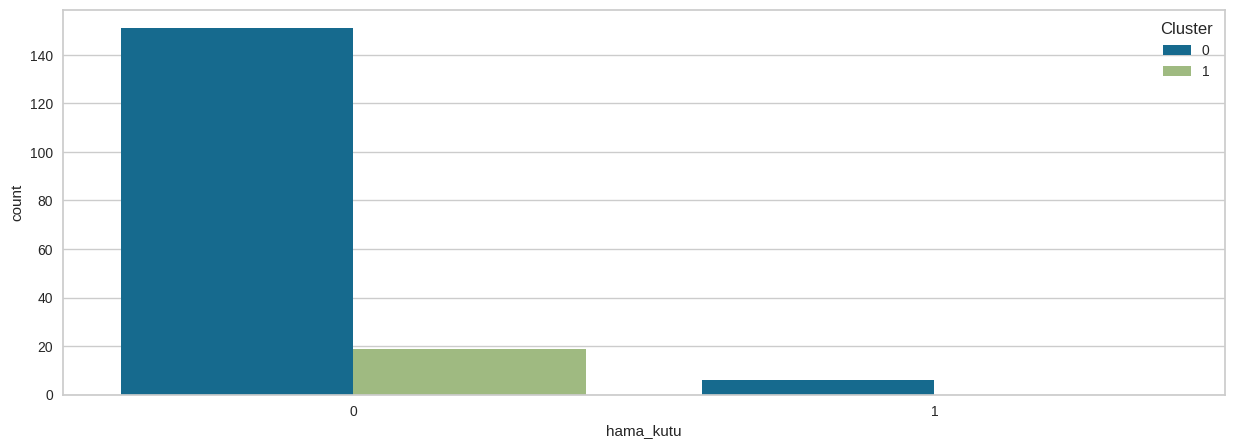

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_kutu'],order=df_Kmean4['hama_kutu'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari hama_tikus

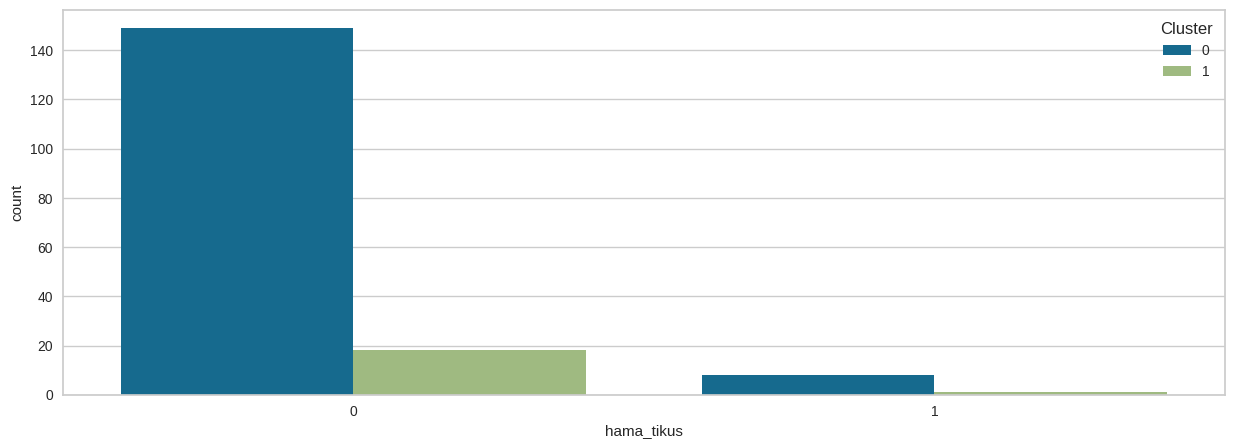

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_tikus'],order=df_Kmean4['hama_tikus'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari hama_wereng

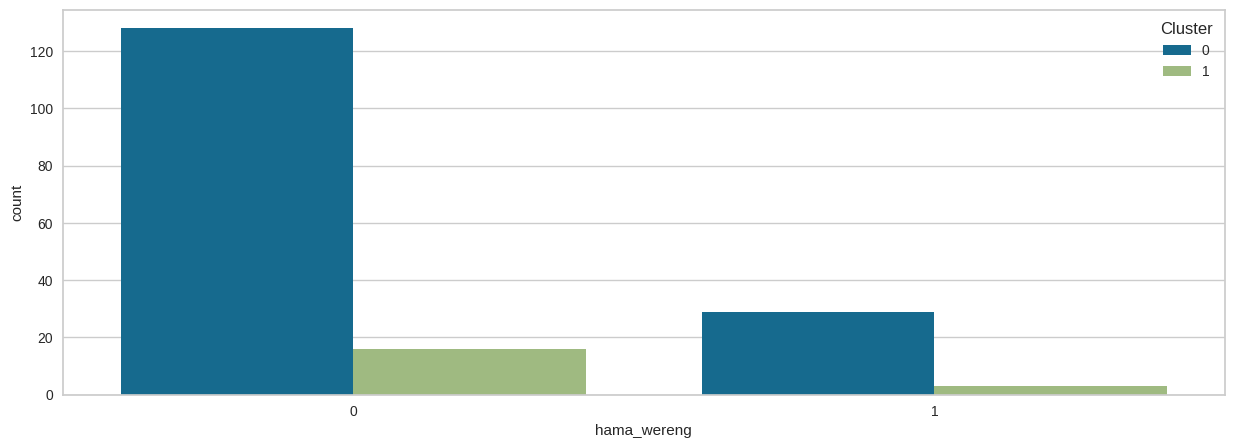

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_wereng'],order=df_Kmean4['hama_wereng'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari hama_amitra_nosa

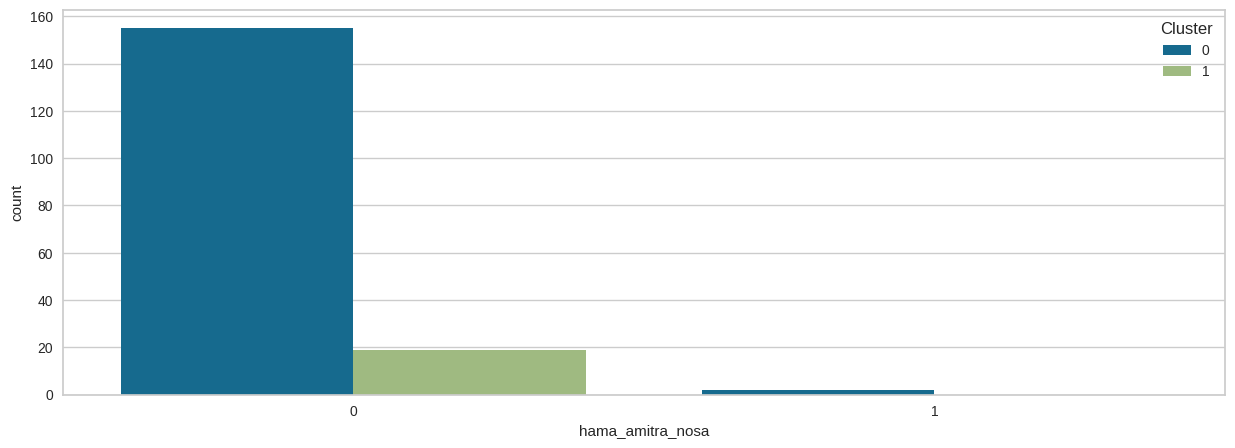

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_amitra_nosa'],order=df_Kmean4['hama_amitra_nosa'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari hama_belalang

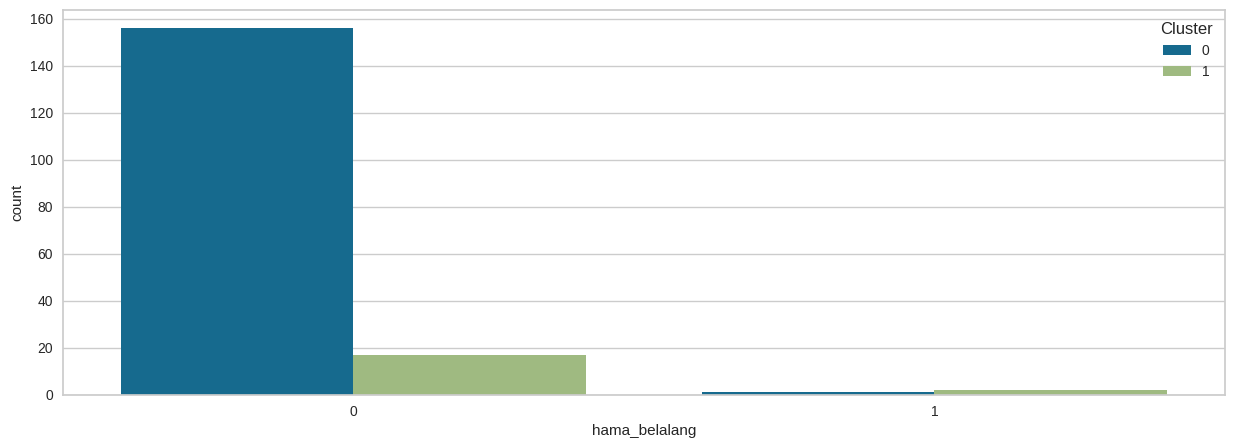

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_belalang'],order=df_Kmean4['hama_belalang'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari hama_engkuk

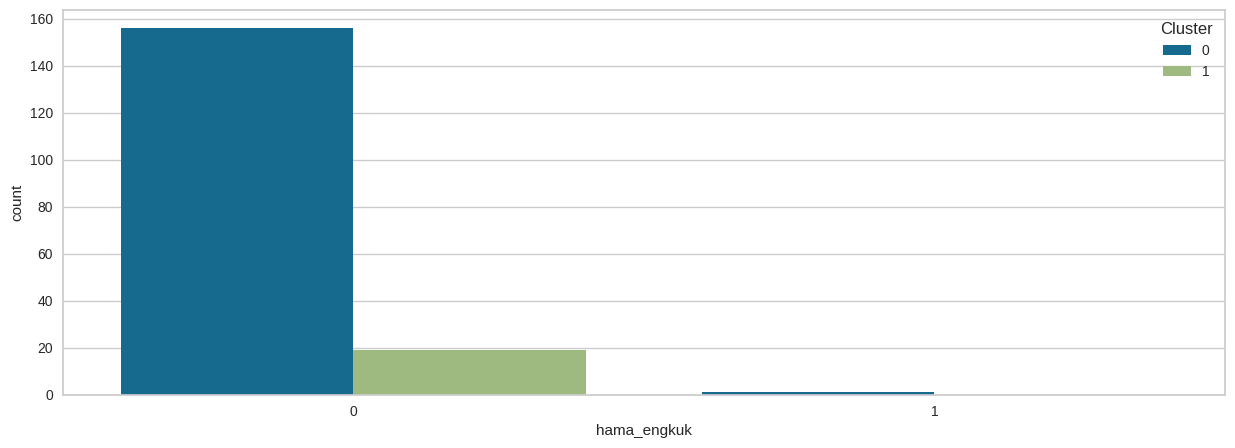

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_engkuk'],order=df_Kmean4['hama_engkuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari hama_serangga

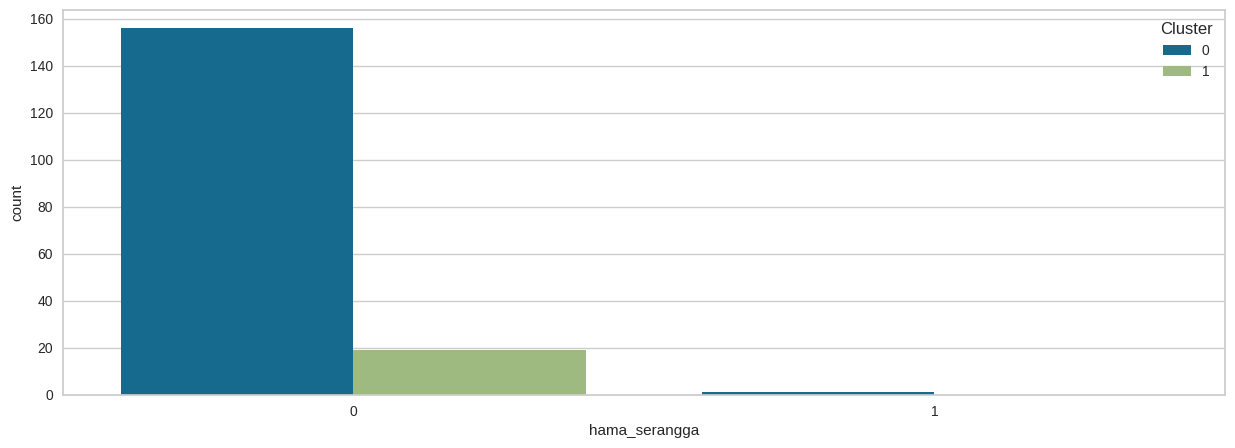

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['hama_serangga'],order=df_Kmean4['hama_serangga'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_akar_busuk

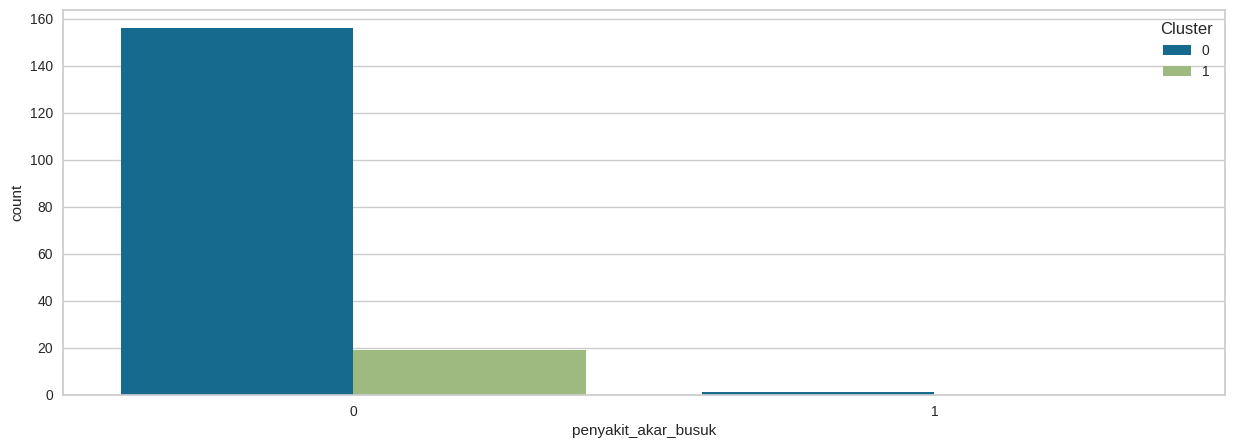

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_akar_busuk'],order=df_Kmean4['penyakit_akar_busuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_trotol

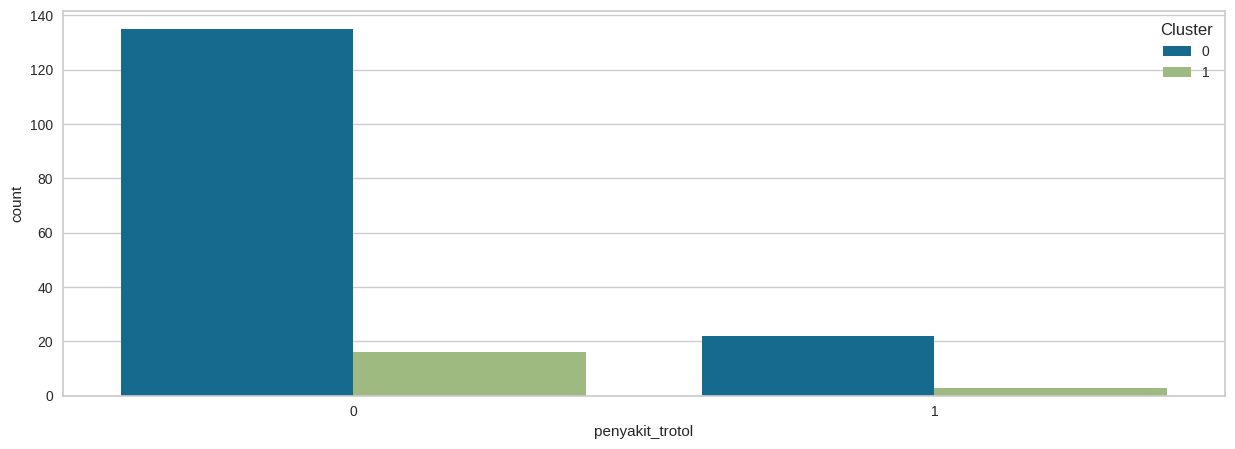

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_trotol'],order=df_Kmean4['penyakit_trotol'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_akar_rusak



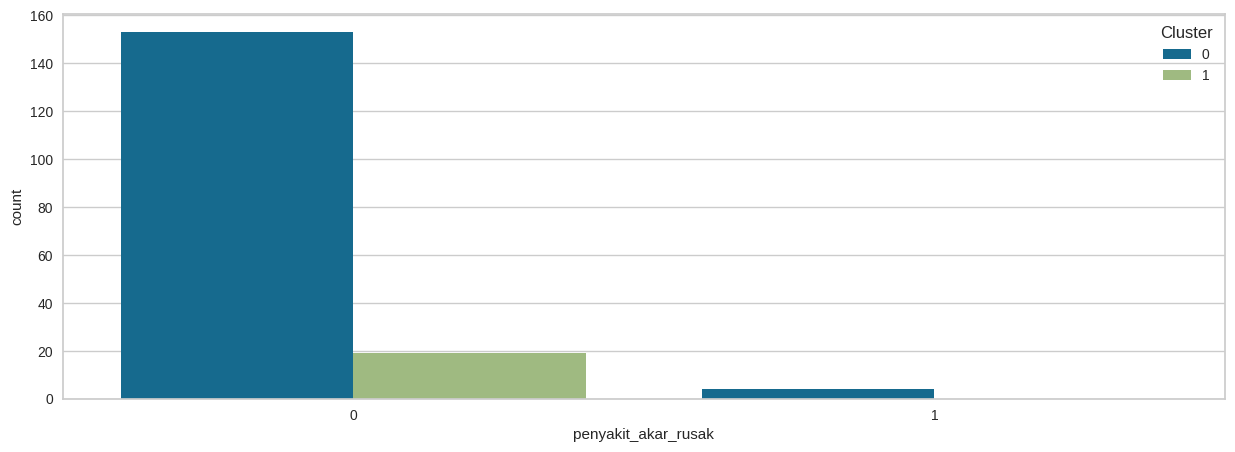

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_akar_rusak'],order=df_Kmean4['penyakit_akar_rusak'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_daun_busuk

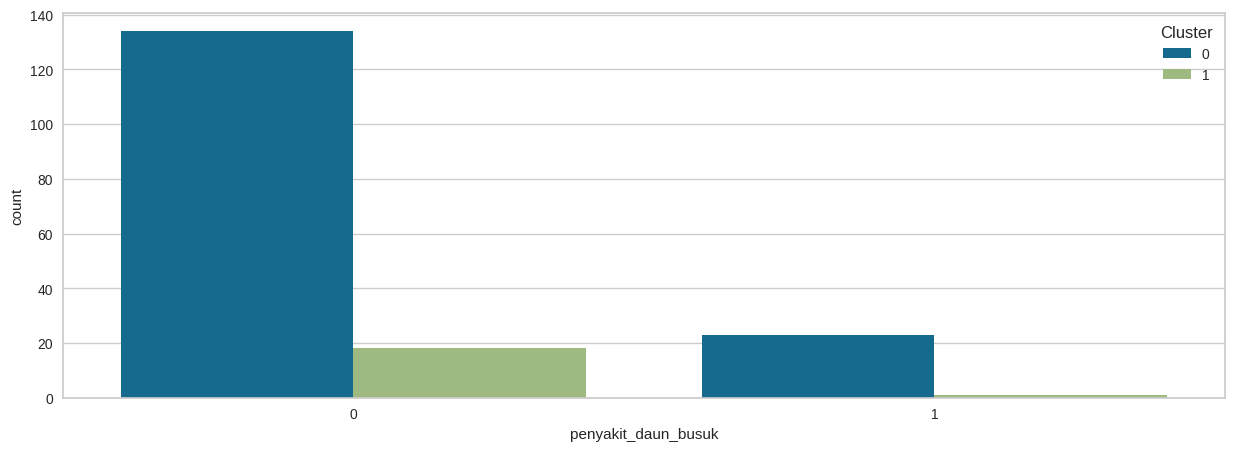

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_daun_busuk'],order=df_Kmean4['penyakit_daun_busuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_buah_busuk

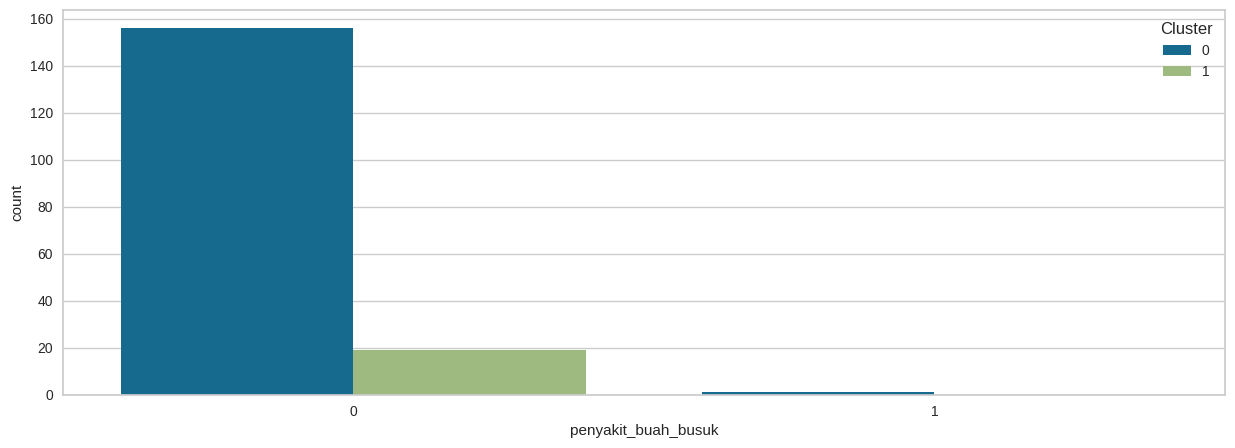

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_buah_busuk'],order=df_Kmean4['penyakit_buah_busuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_daun_layu

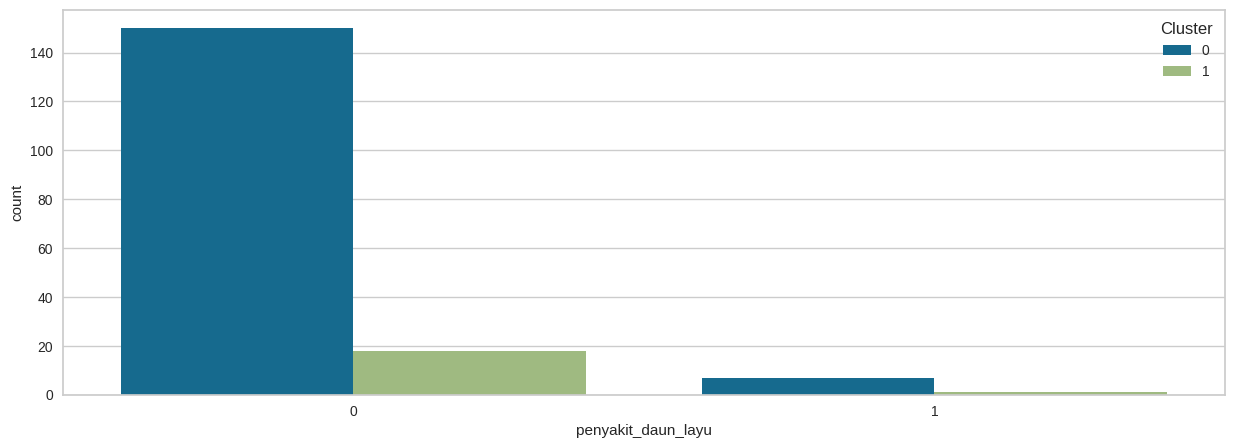

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_daun_layu'],order=df_Kmean4['penyakit_daun_layu'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_busuk_batang

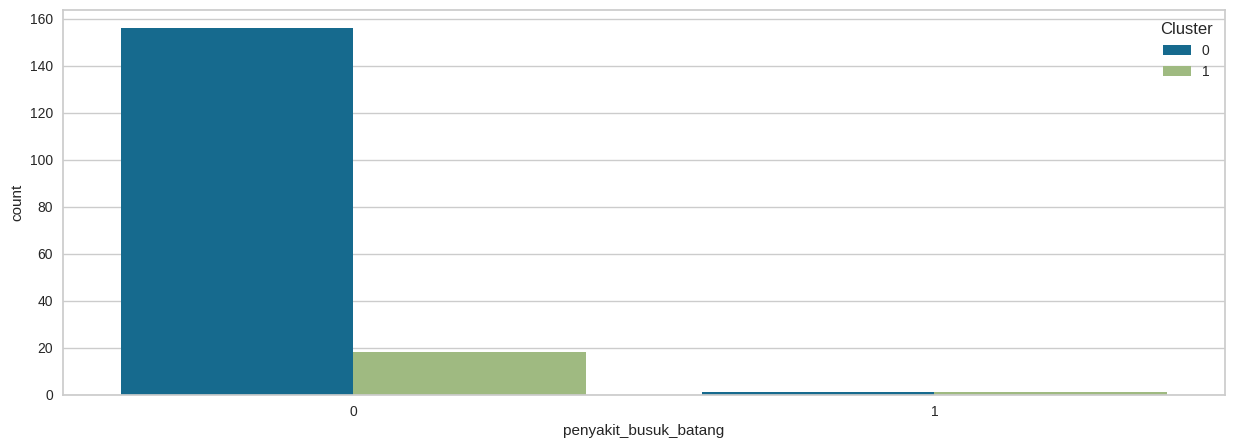

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_busuk_batang'],order=df_Kmean4['penyakit_busuk_batang'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###CLuster dari penyakit_daun_bercak

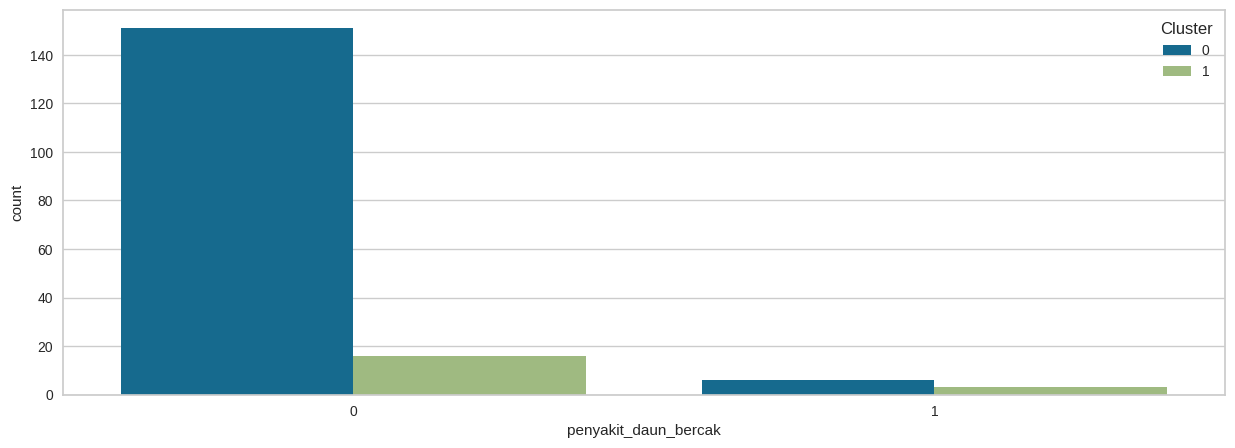

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_daun_bercak'],order=df_Kmean4['penyakit_daun_bercak'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari penyakit_daun_kemerahan

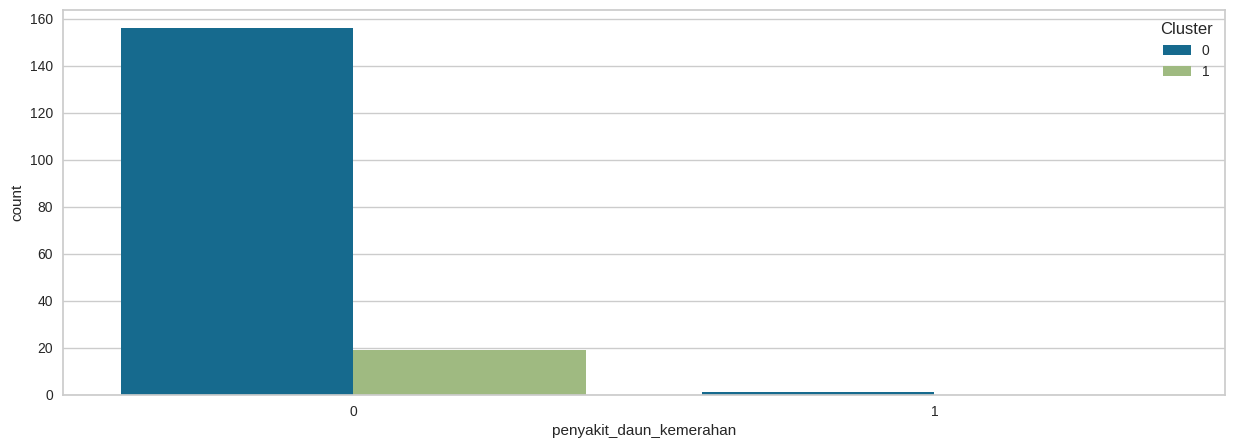

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_daun_kemerahan'],order=df_Kmean4['penyakit_daun_kemerahan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari penyakit_umbi_busuk

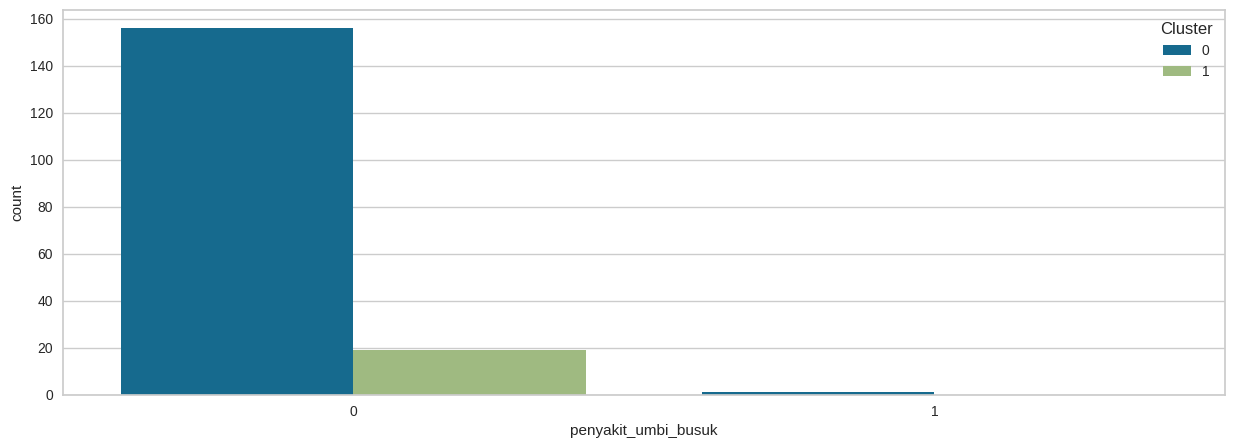

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_umbi_busuk'],order=df_Kmean4['penyakit_umbi_busuk'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_fusarium

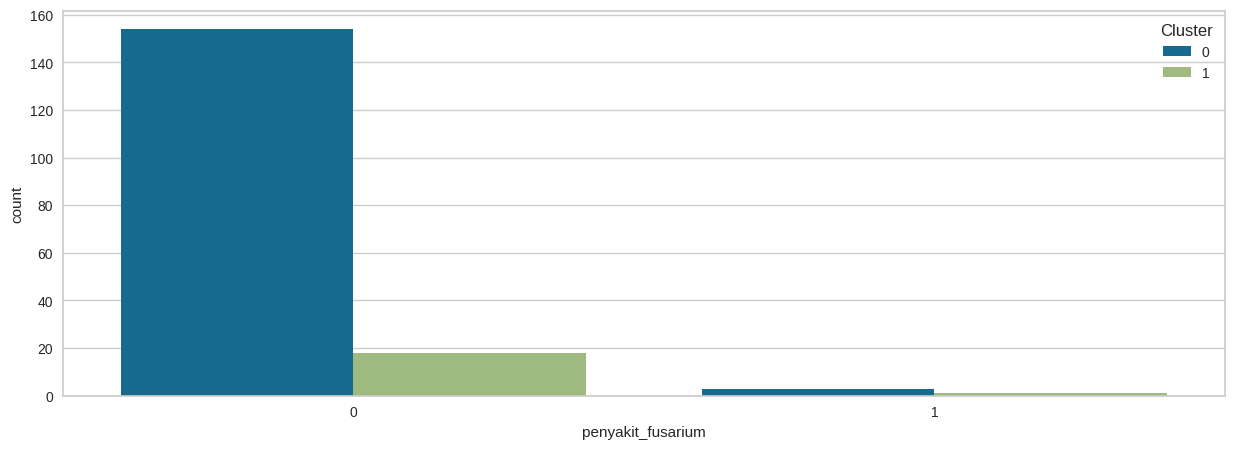

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_fusarium'],order=df_Kmean4['penyakit_fusarium'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_inul

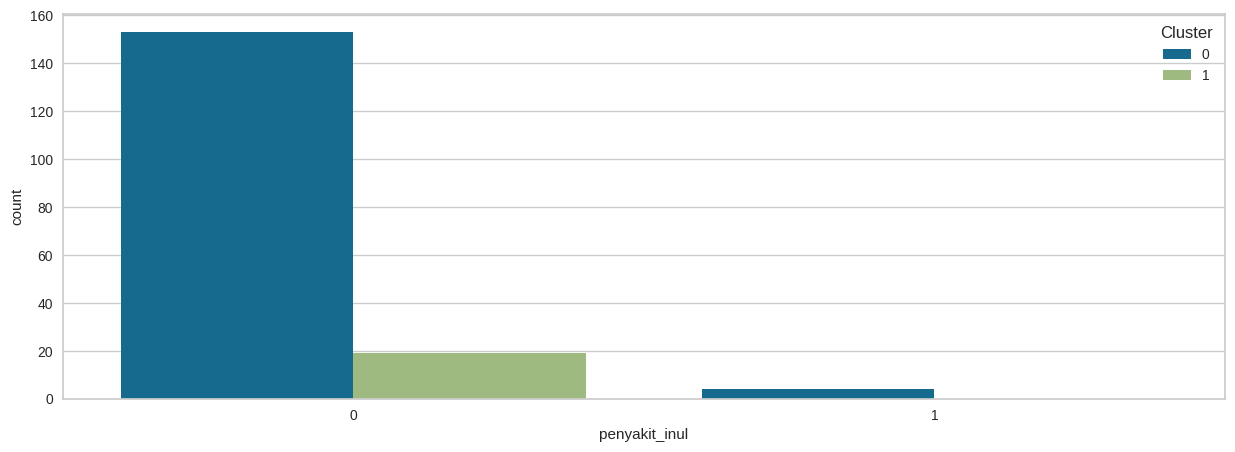

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_inul'],order=df_Kmean4['penyakit_inul'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_jamur

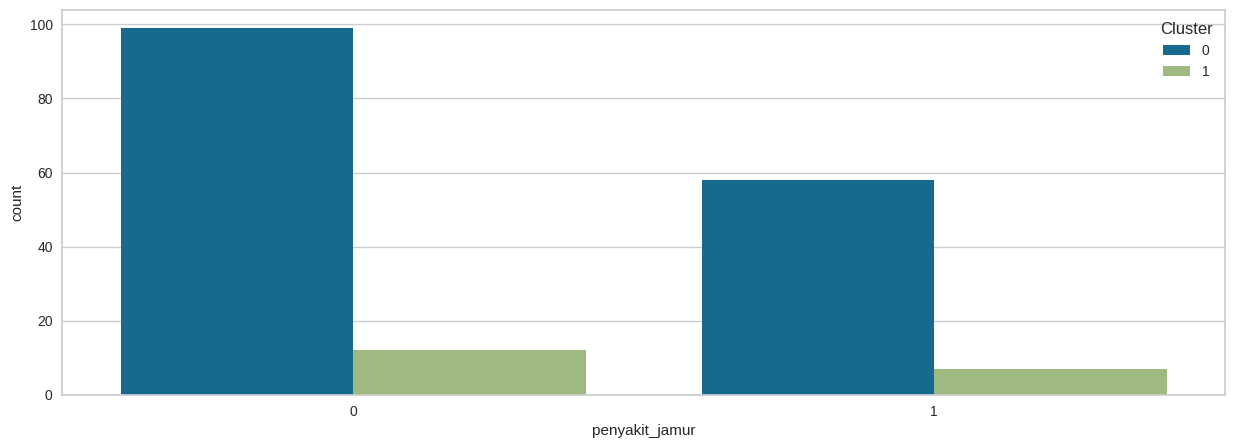

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_jamur'],order=df_Kmean4['penyakit_jamur'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_mulet

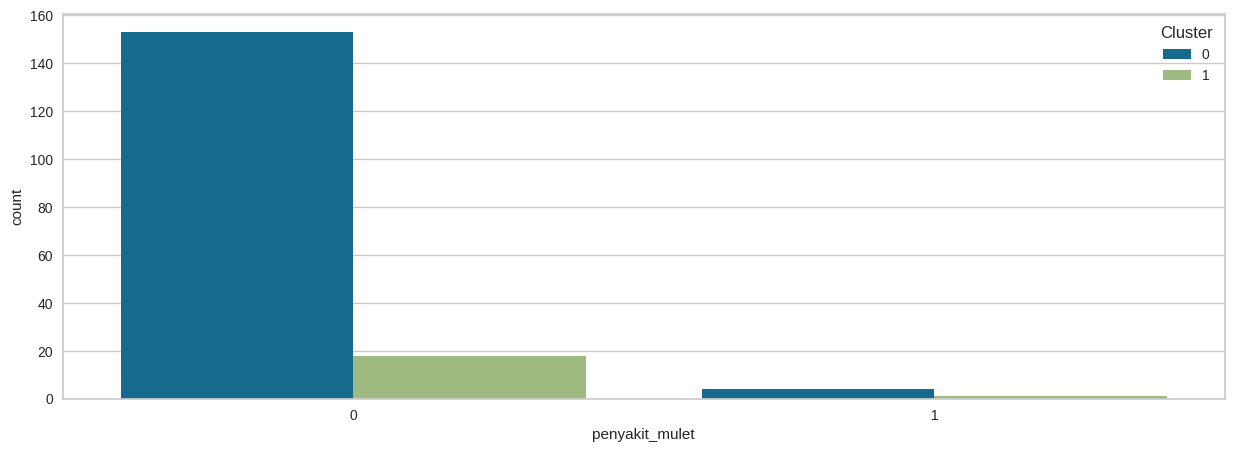

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_mulet'],order=df_Kmean4['penyakit_mulet'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_rencek

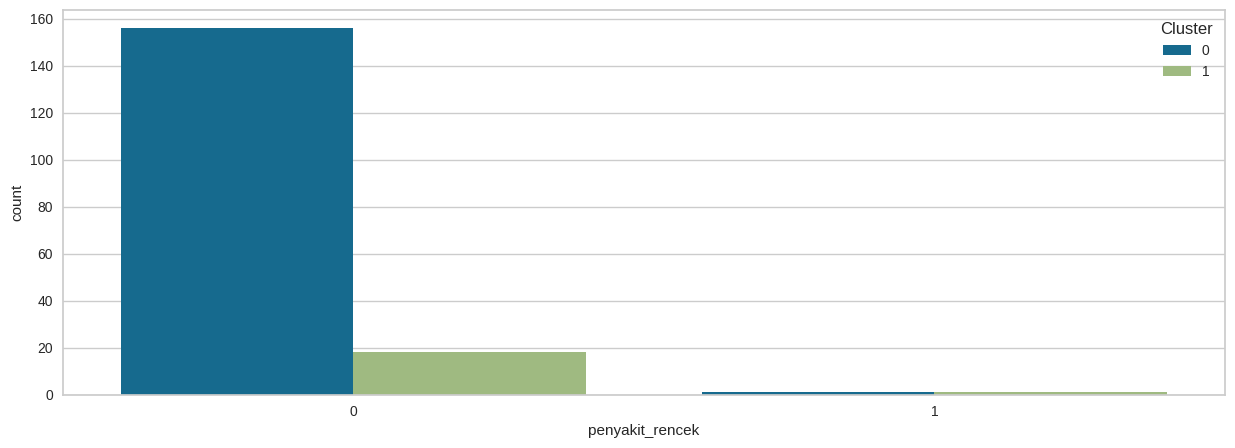

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_rencek'],order=df_Kmean4['penyakit_rencek'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_semu_kuning

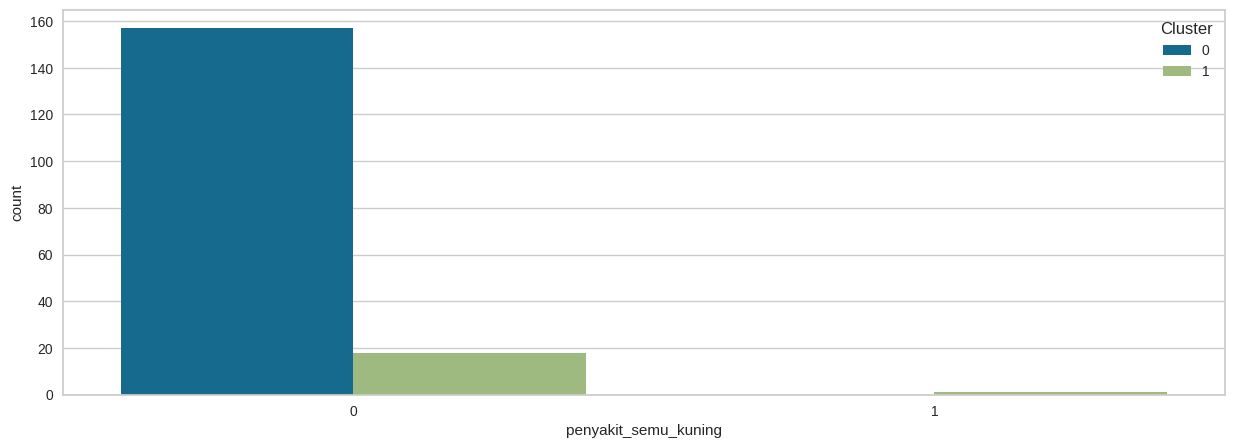

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_semu_kuning'],order=df_Kmean4['penyakit_semu_kuning'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_krapak

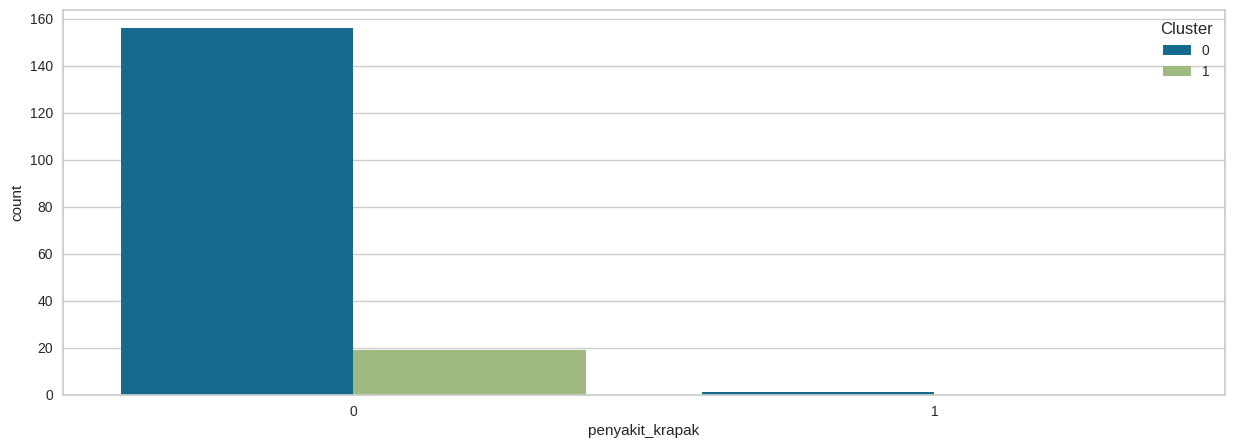

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_krapak'],order=df_Kmean4['penyakit_krapak'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_pohon_kering

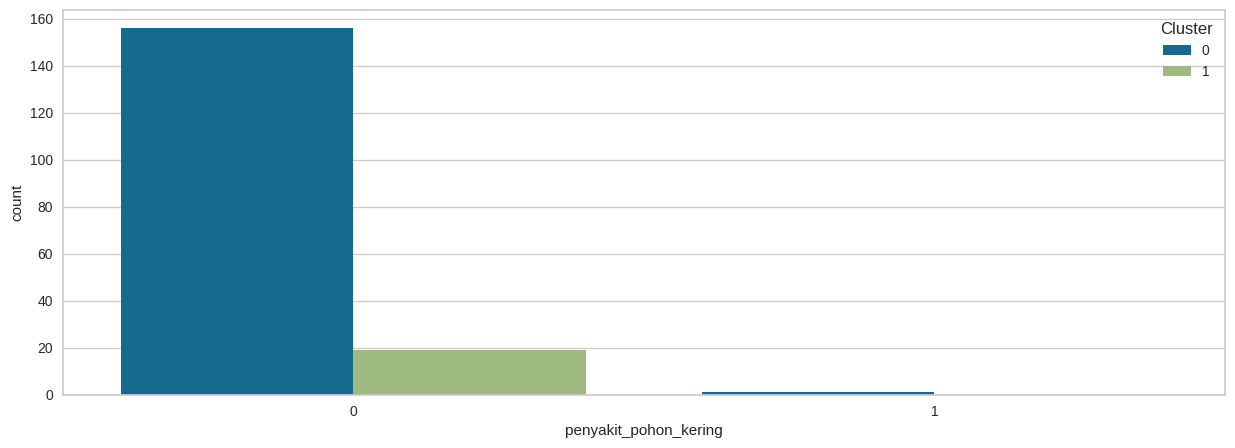

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_pohon_kering'],order=df_Kmean4['penyakit_pohon_kering'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari penyakit_pucuk_menguning

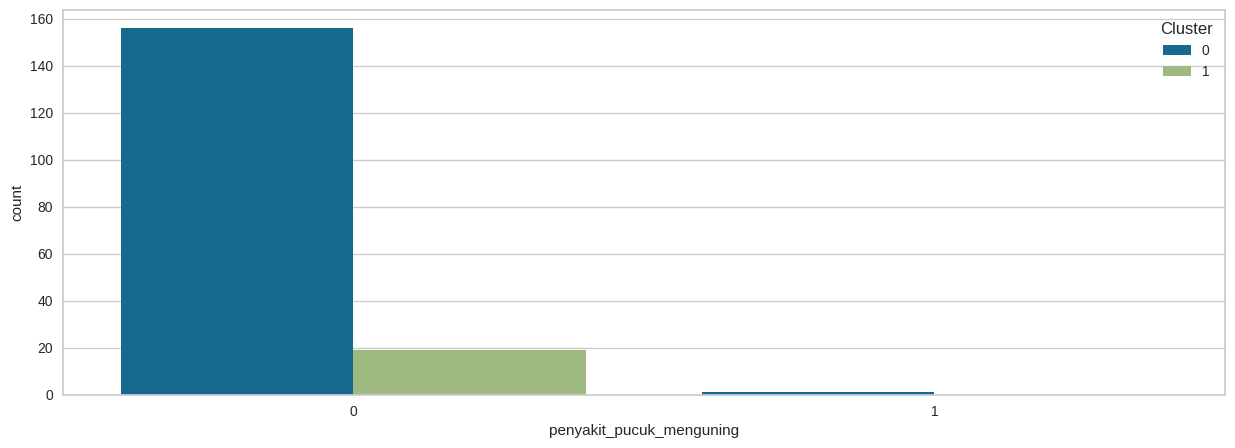

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['penyakit_pucuk_menguning'],order=df_Kmean4['penyakit_pucuk_menguning'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari tempat_beli_toko_obat_pertanian

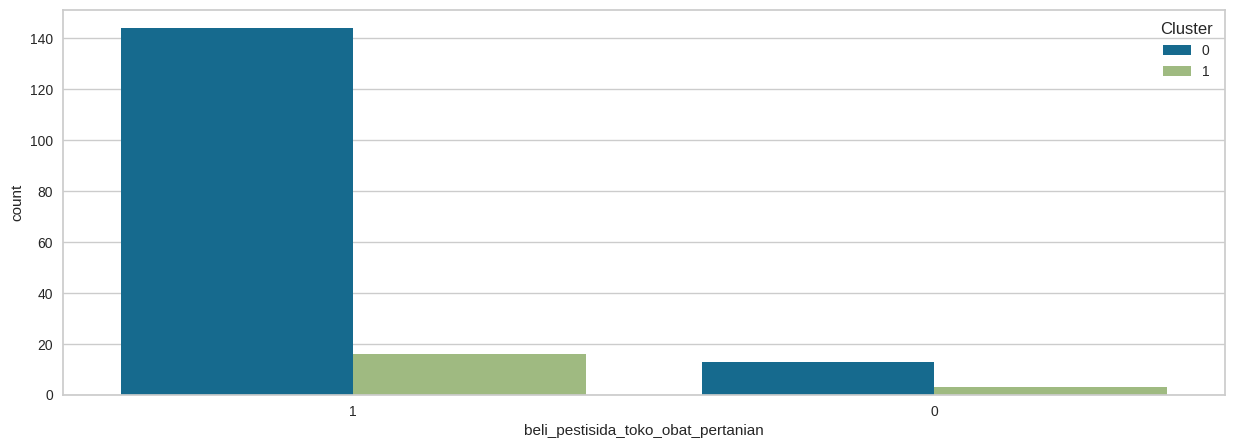

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['beli_pestisida_toko_obat_pertanian'],order=df_Kmean4['beli_pestisida_toko_obat_pertanian'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari tempat_beli_kelompok_tani

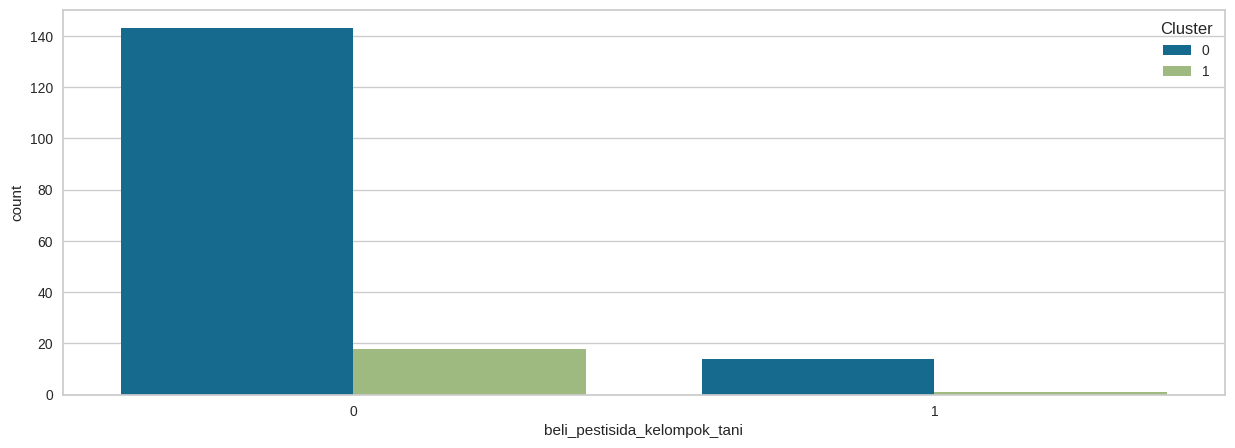

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['beli_pestisida_kelompok_tani'],order=df_Kmean4['beli_pestisida_kelompok_tani'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari pengairan_hujan

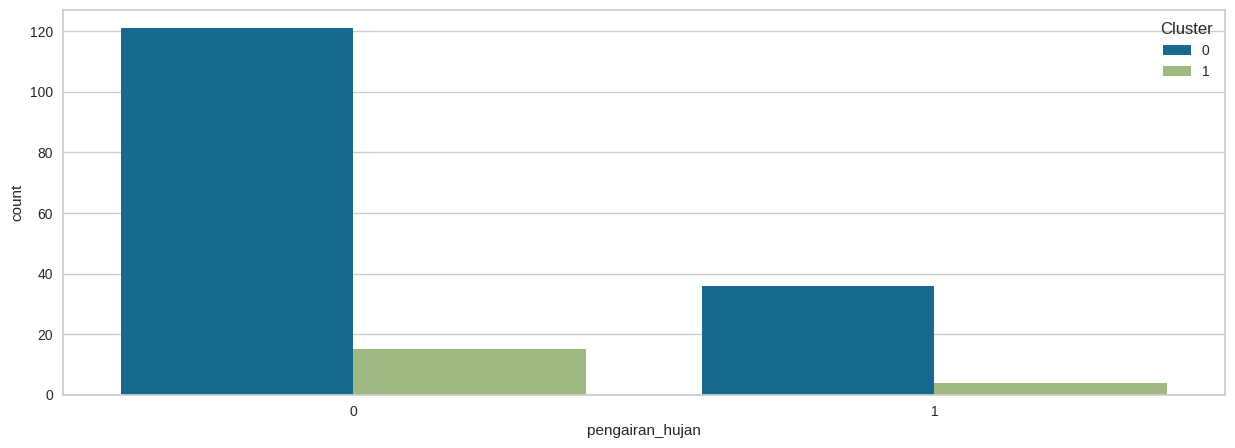

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['pengairan_hujan'],order=df_Kmean4['pengairan_hujan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari pengairan_irigasi

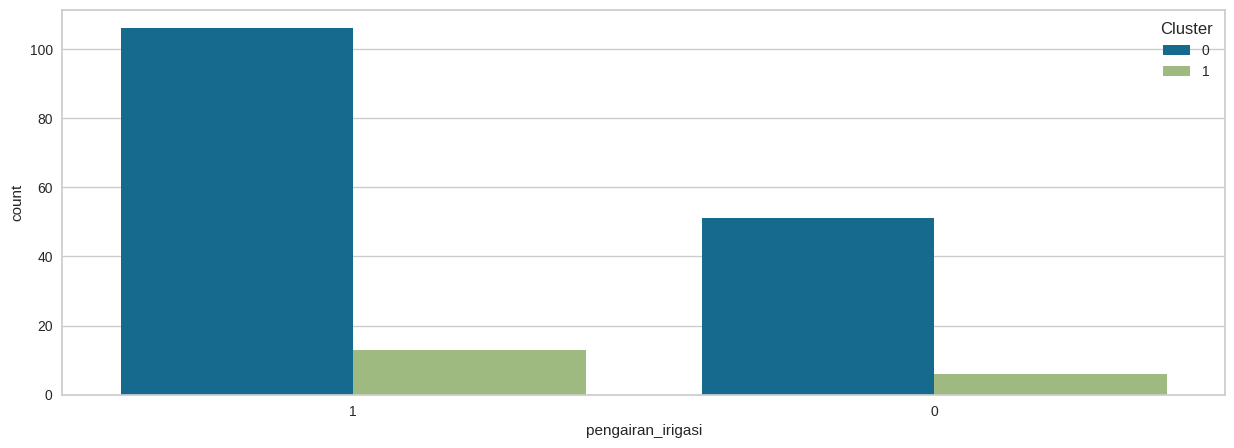

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['pengairan_irigasi'],order=df_Kmean4['pengairan_irigasi'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari pengairan_sungai

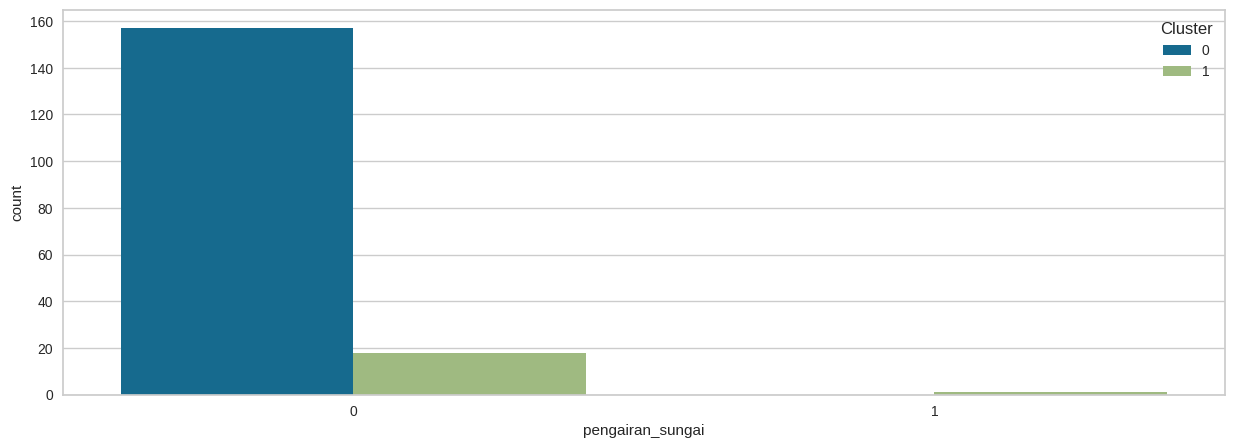

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['pengairan_sungai'],order=df_Kmean4['pengairan_sungai'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari pengairan_mata_air

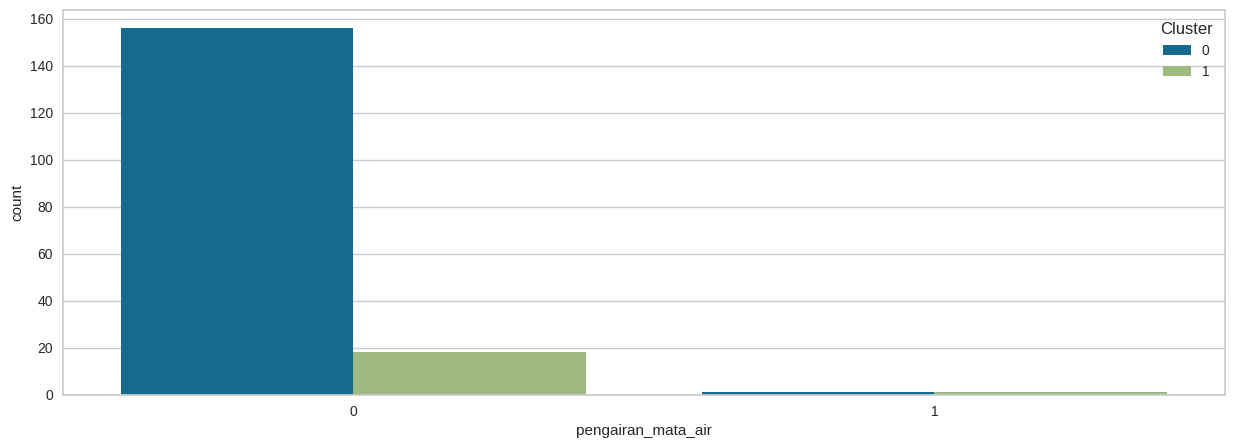

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['pengairan_mata_air'],order=df_Kmean4['pengairan_mata_air'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari pengairan_sumur

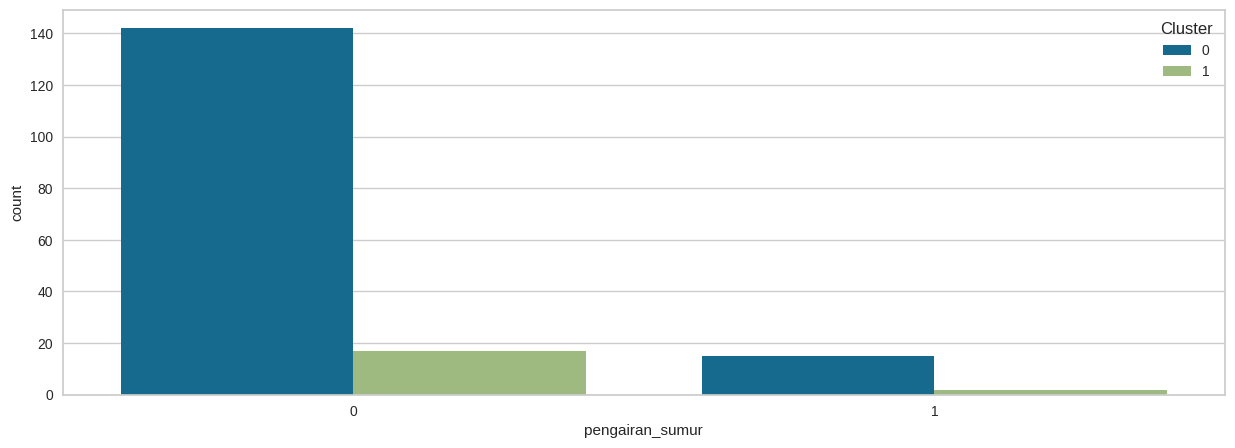

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['pengairan_sumur'],order=df_Kmean4['pengairan_sumur'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari setelah_panen_dijual

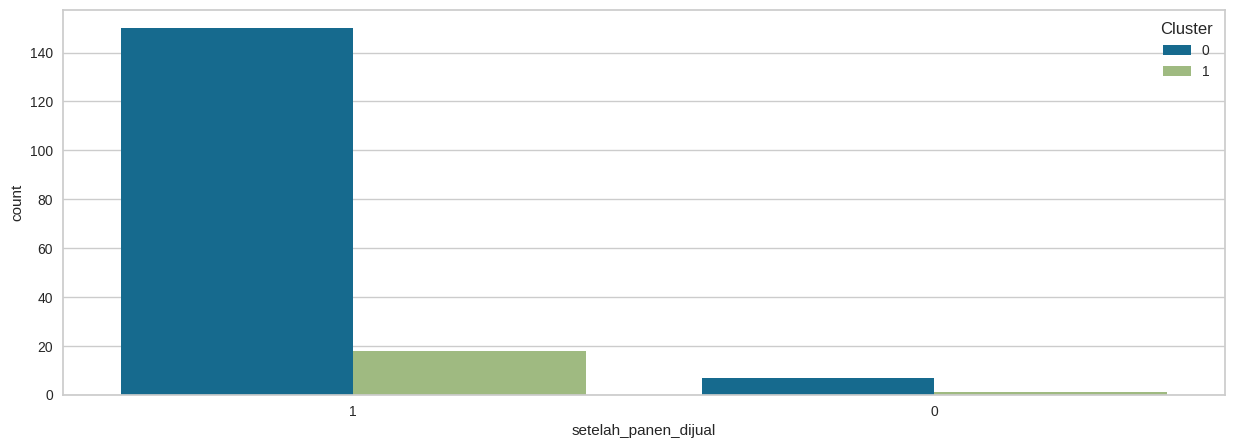

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['setelah_panen_dijual'],order=df_Kmean4['setelah_panen_dijual'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari setelah_panen_disimpan

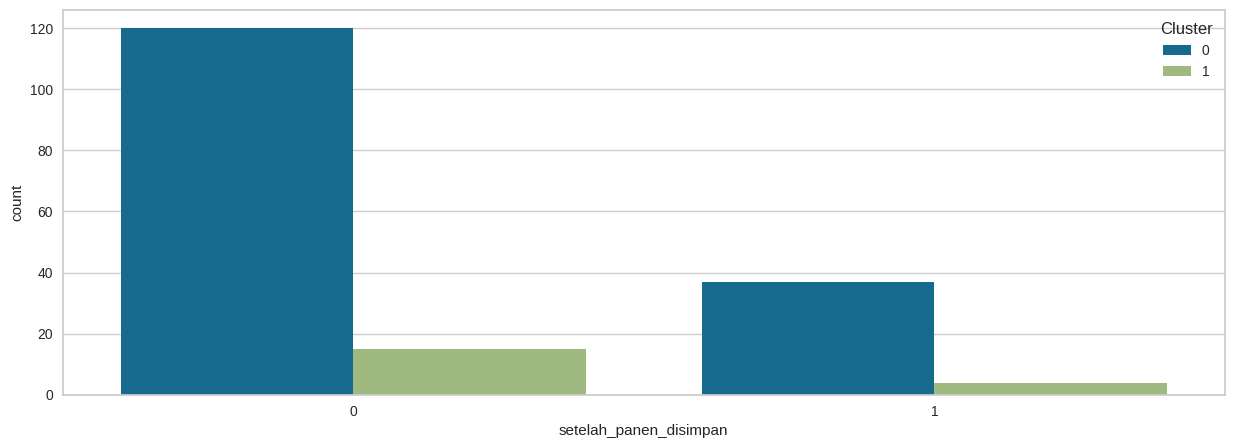

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['setelah_panen_disimpan'],order=df_Kmean4['setelah_panen_disimpan'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

###Cluster dari setelah_panen_tebas

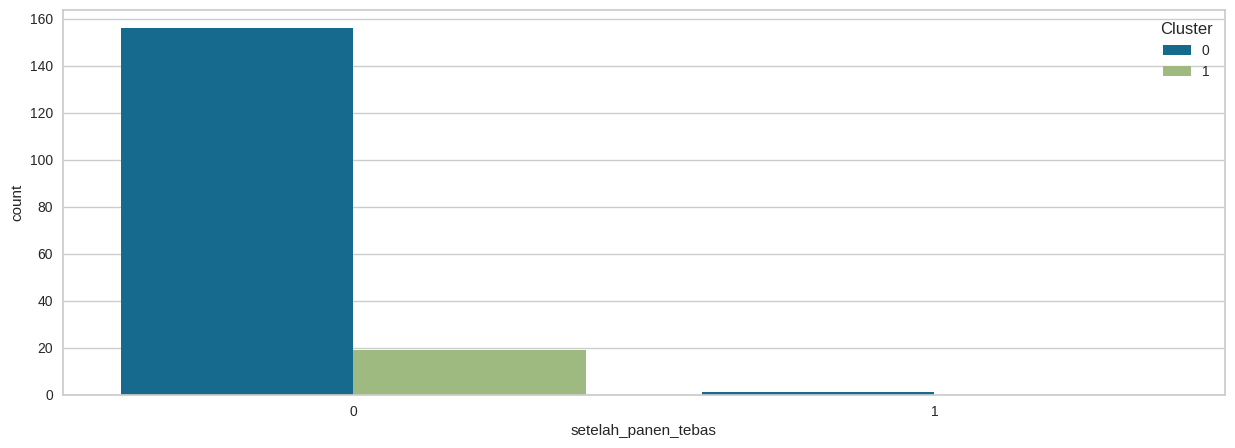

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['setelah_panen_tebas'],order=df_Kmean4['setelah_panen_tebas'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_pasar

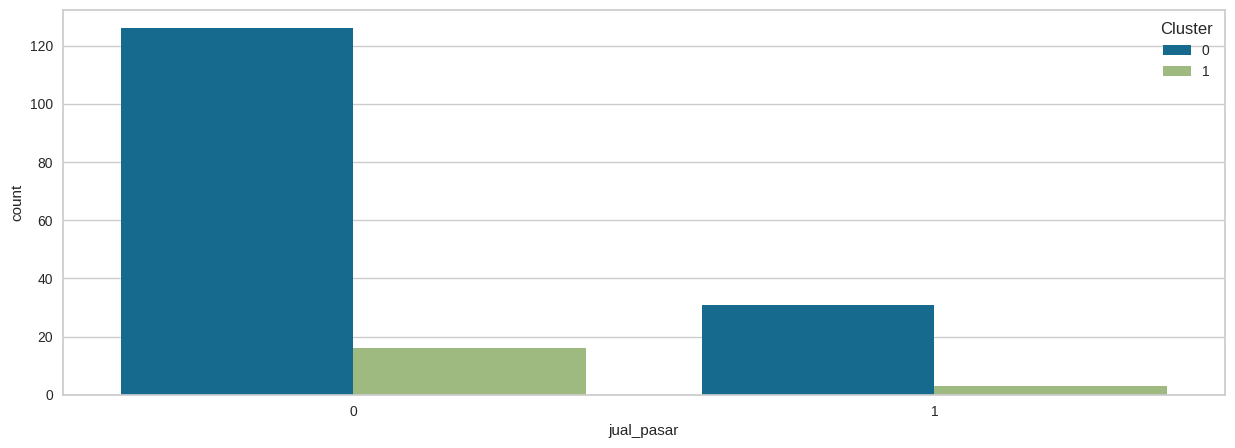

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_pasar'],order=df_Kmean4['jual_pasar'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_pengepul

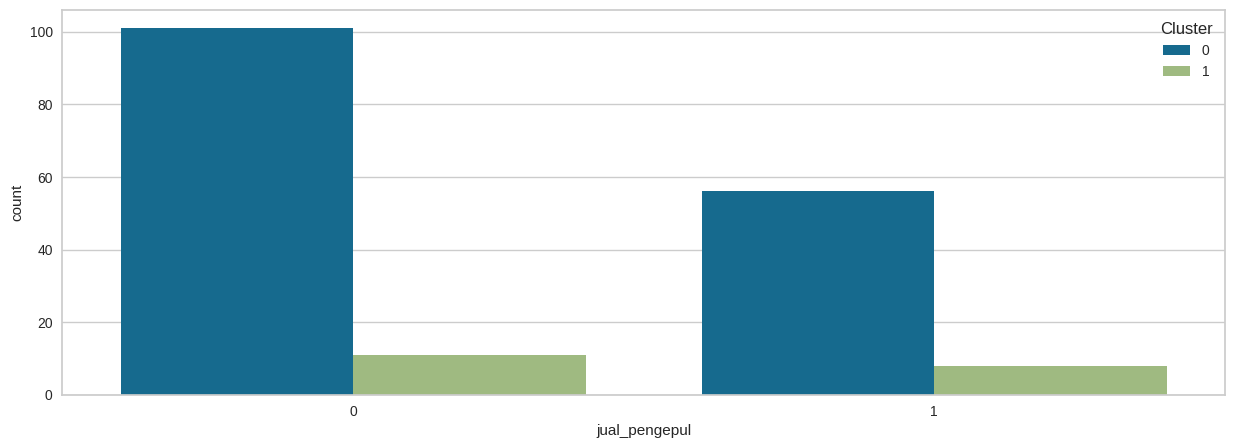

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_pengepul'],order=df_Kmean4['jual_pengepul'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_penggoreng

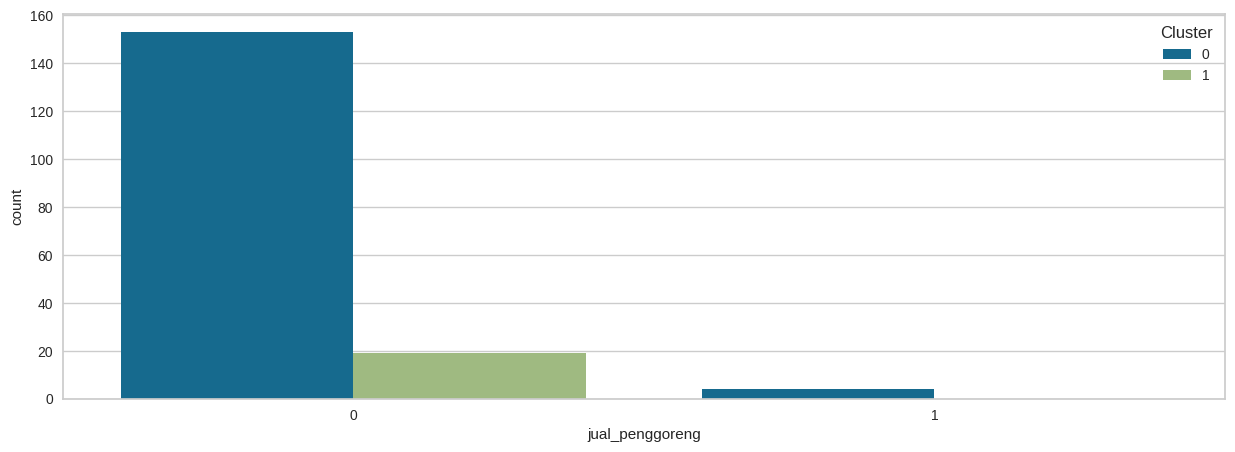

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_penggoreng'],order=df_Kmean4['jual_penggoreng'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_penebas

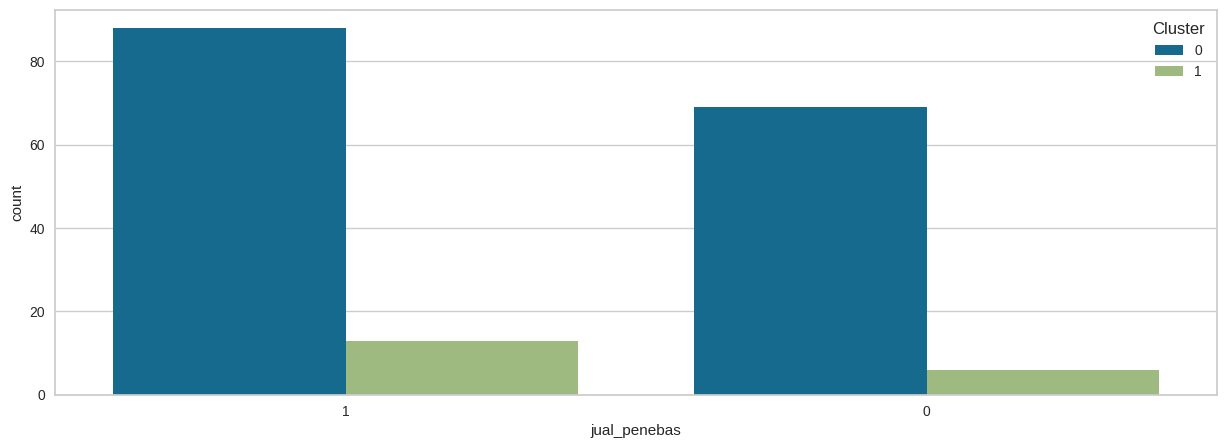

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_penebas'],order=df_Kmean4['jual_penebas'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_ecer

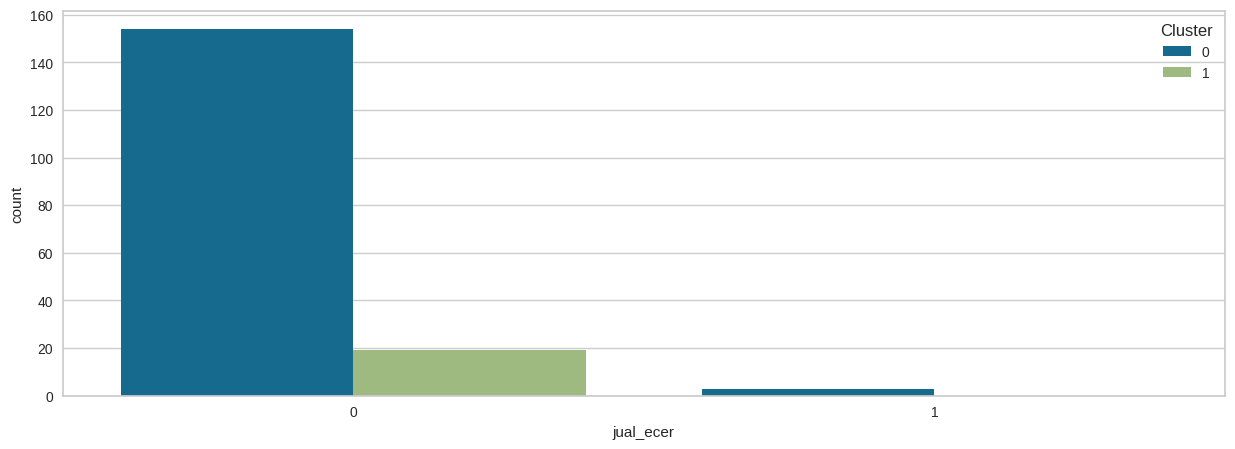

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_ecer'],order=df_Kmean4['jual_ecer'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Cluster dari jual_pedagang

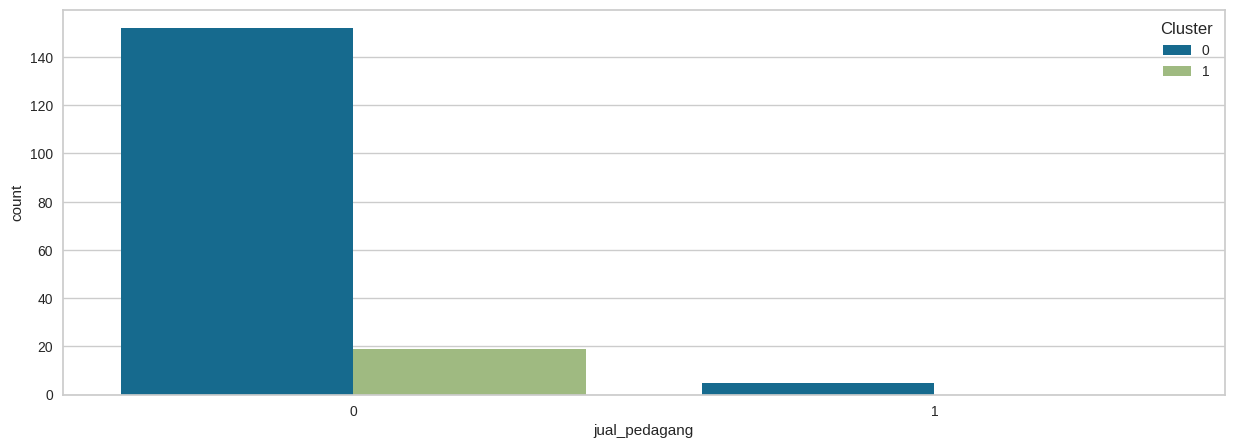

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df_Kmean4['jual_pedagang'],order=df_Kmean4['jual_pedagang'].value_counts().index,hue=df_Kmean4['Cluster'])
plt.show()

### Laporan pupuk tiap kabupaten

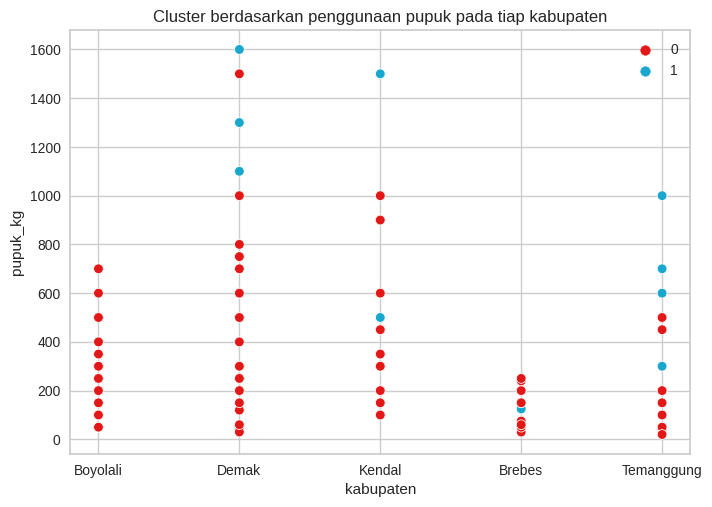

In [ ]:
pl = sns.scatterplot(data = df_Kmean4,x=df_Kmean4["kabupaten"], y=df_Kmean4["pupuk_kg"],hue="Cluster", palette=pal)
pl.set_title("Cluster berdasarkan penggunaan pupuk pada tiap kabupaten")
plt.legend()
plt.show()

### Laporan Luas lahan tiap kabupaten

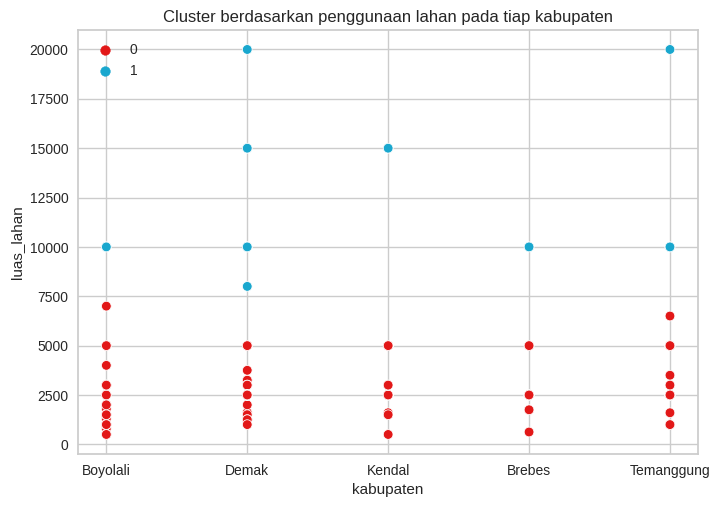

In [ ]:
pl = sns.scatterplot(data = df_Kmean4,x=df_Kmean4["kabupaten"], y=df_Kmean4["luas_lahan"],hue="Cluster", palette=pal)
pl.set_title("Cluster berdasarkan penggunaan lahan pada tiap kabupaten")
plt.legend()
plt.show()

### Kolaborasi penggunaan pupuk pada luas lahan tertentu

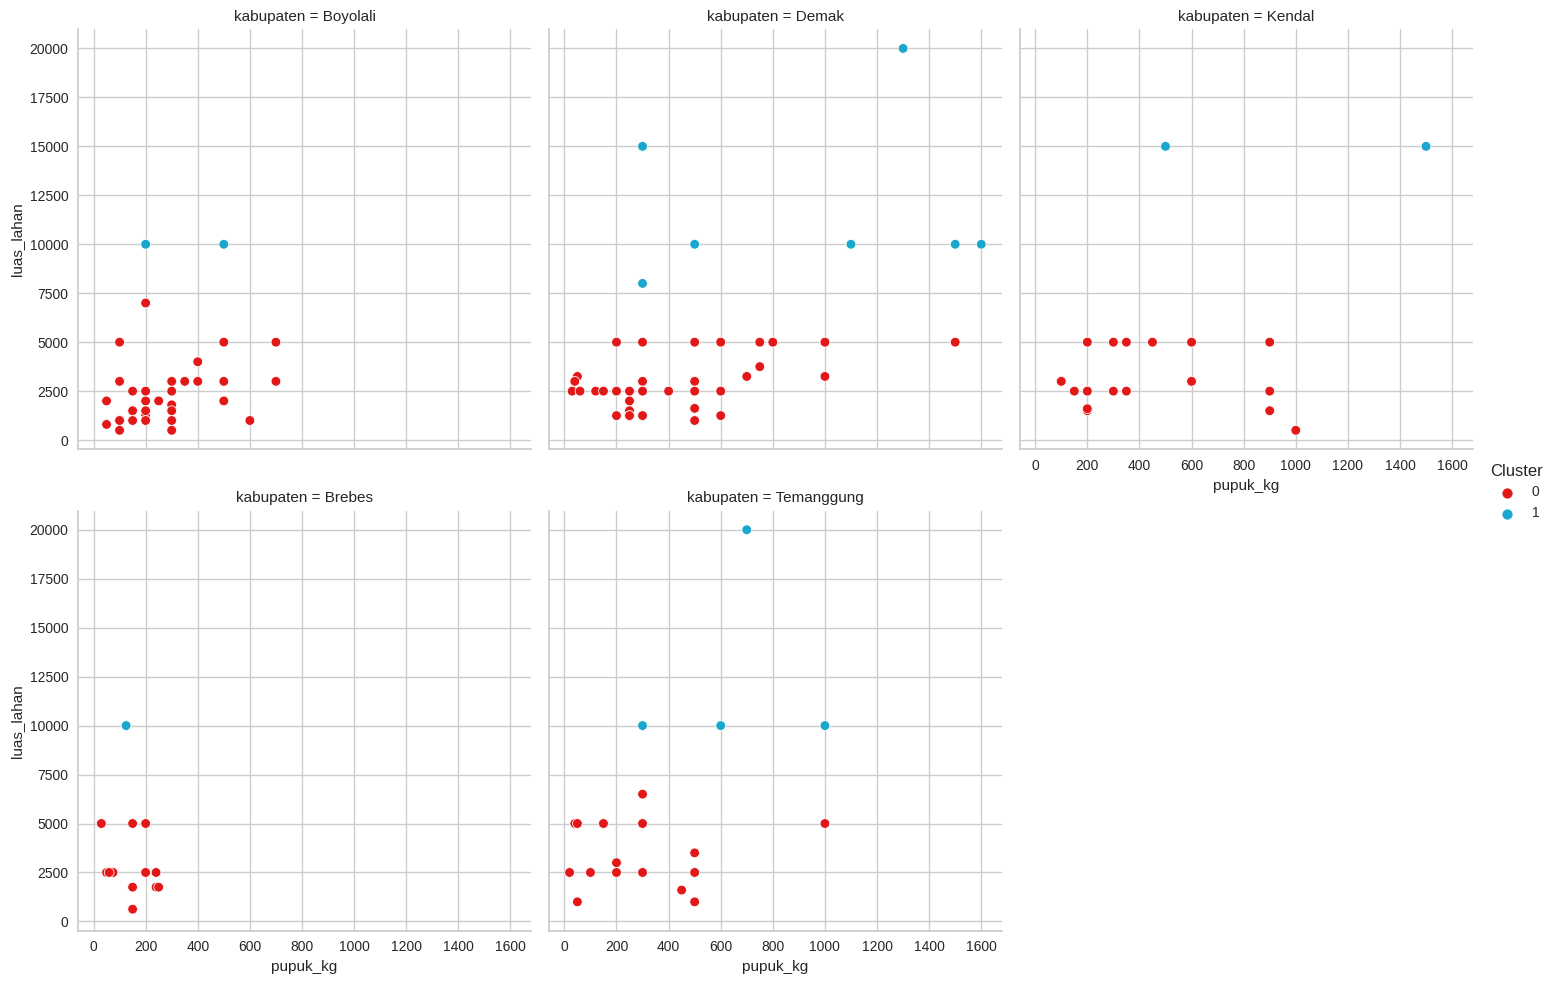

In [ ]:
sns.relplot(data=df_Kmean4, x="pupuk_kg", y="luas_lahan", hue="Cluster", col="kabupaten", col_wrap=3, palette=pal)

## Profiling

In [ ]:
df_Kmean4.head()

Nama  Usia kabupaten Jenis Kelamin Pendidikan Terakhir  durasi_petani  \
0  Ngatno    50  Boyolali     Laki-laki                 SMP           30.0   
1   Suyut    65  Boyolali     Laki-laki                  SD           50.0   
2   Sumar    40  Boyolali     Laki-laki                  SD           20.0   
3  Jumadi    50  Boyolali     Laki-laki                  SD           20.0   
4    wagi    38  Boyolali     Laki-laki                  SD           23.0   

  anggota_kelompok_tani  status_lahan_sendiri  status_lahan_bagi_hasil  \
0                    Ya                     1                        0   
1                    Ya                     1                        0   
2                    Ya                     1                        0   
3                    Ya                     1                        0   
4                    Ya                     1                        0   

   status_lahan_sewa  luas_lahan  lama_tanam_hari  panen_kg  kali_tanam  \
0                  0      7000.0             60.0    1000.0         2.0   
1                  0      3000.0             60.0    2000.0         2.0   
2                  0       800.0             60.0     600.0         3.0   
3                  0      2000.0             60.0    2000.0         3.0   
4                  1      2000.0             60.0     700.0         2.0   

   pupuk_kg  bulan_tanam_januari  bulan_tanam_februari  bulan_tanam_maret  \
0     200.0                    1                     0                  0   
1     350.0                    0                     0                  1   
2      50.0                    0                     0                  1   
3      50.0                    0                     0                  1   
4     250.0                    0                     1                  0   

   bulan_tanam_april  bulan_tanam_mei  bulan_tanam_juni  bulan_tanam_juli  \
0                  0                0                 0                 0   
1                  0                0                 0                 0   
2                  1                0                 0                 0   
3                  1                0                 0                 0   
4                  0                0                 0                 0   

   bulan_tanam_agustus  bulan_tanam_september  bulan_tanam_oktober  \
0                    0                      0                    0   
1                    0                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    0                      0                    0   

   bulan_tanam_november  bulan_tanam_desember  bibit_kg  varietas_bima_brebes  \
0                     0                     1     200.0                     0   
1                     0                     1     350.0                     0   
2                     0                     1     500.0                     0   
3                     0                     1     250.0                     0   
4                     0                     0     250.0                     0   

   varietas_batu_karet  varietas_bali_karet  varietas_batu_ijo  \
0                    0                    1                  1   
1                    0                    0                  1   
2                    0                    1                  0   
3                    0                    0                  1   
4                    0                    0                  1   

   varietas_putih  varietas_garut  varietas_tanjuk  varietas_bima_jokowi  \
0               0               0                0                     0   
1               0               0                0                     0   
2               0               0                0                     0   
3               0               1                0                     0   
4               0            

Catatan
- 1 : Boyolali
- 2 : Demak
- 3 : Kendal
- 4 : Brebes
- 5 : Temanggung

### Cek berdasarkan pupuk

In [ ]:
Personal = ["luas_lahan", "panen_kg", "bibit_kg", "durasi_petani", "lama_tanam_hari", "kali_tanam"]

<Figure size 800x550 with 0 Axes>

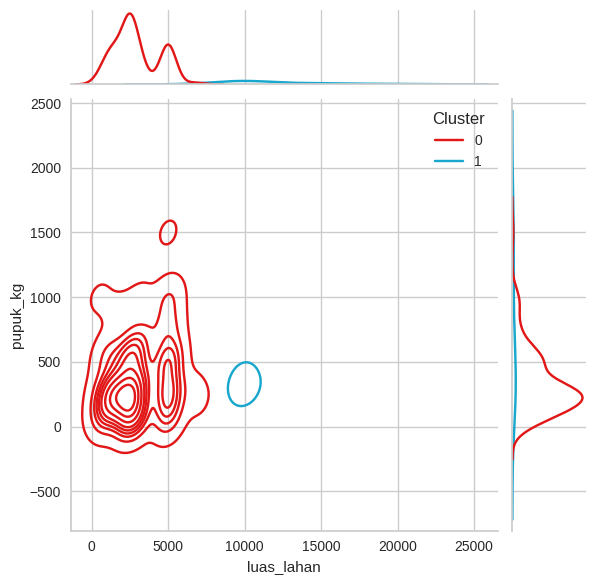

<Figure size 800x550 with 0 Axes>

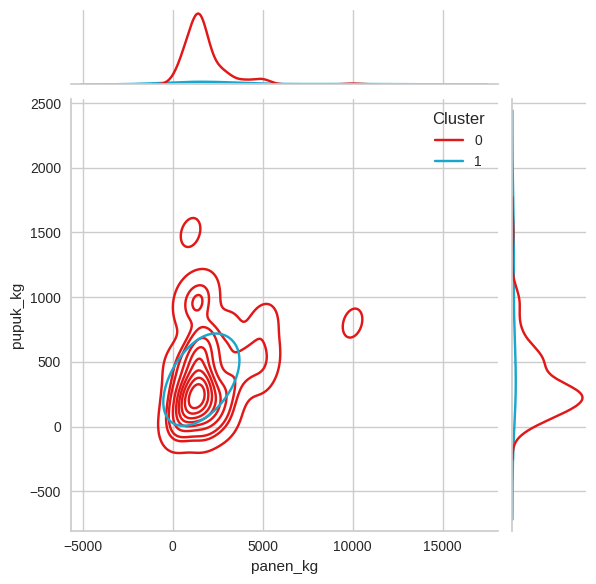

<Figure size 800x550 with 0 Axes>

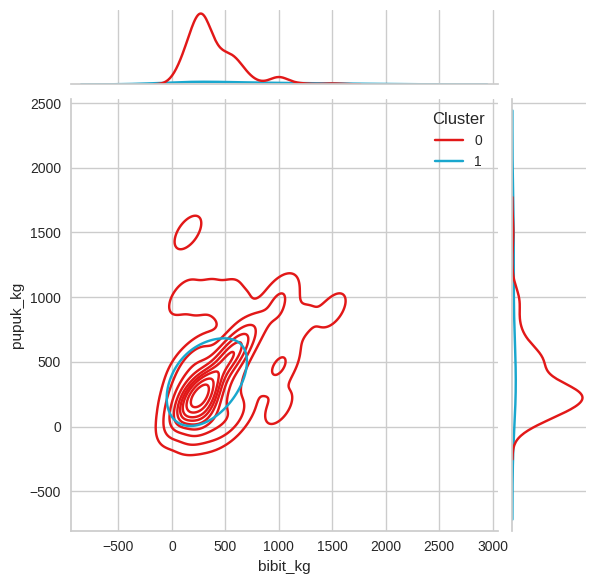

<Figure size 800x550 with 0 Axes>

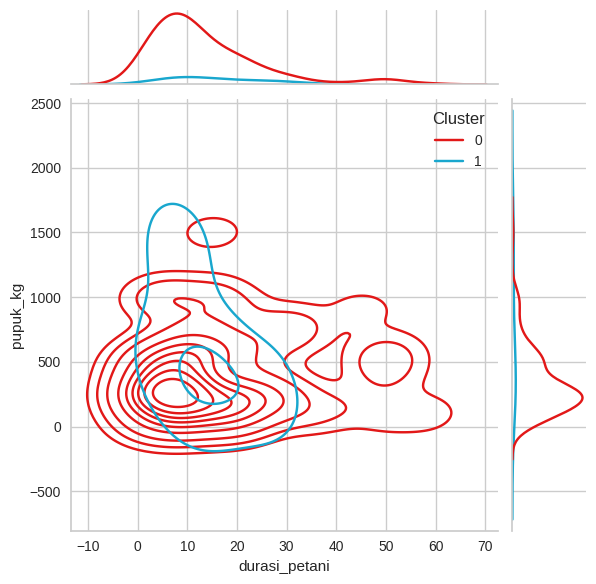

<Figure size 800x550 with 0 Axes>

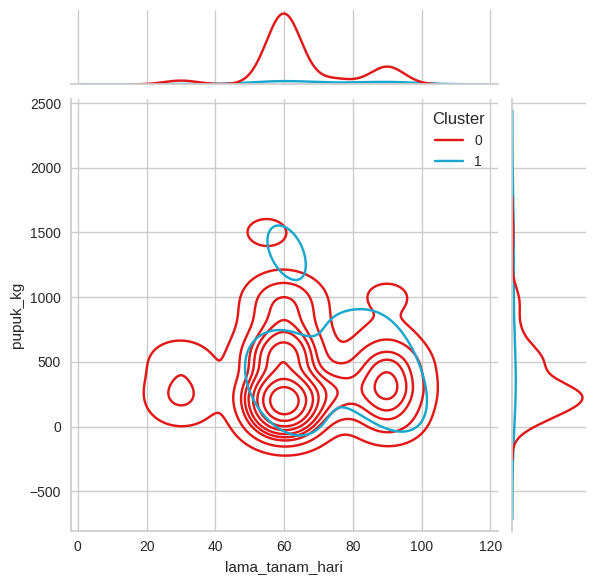

<Figure size 800x550 with 0 Axes>

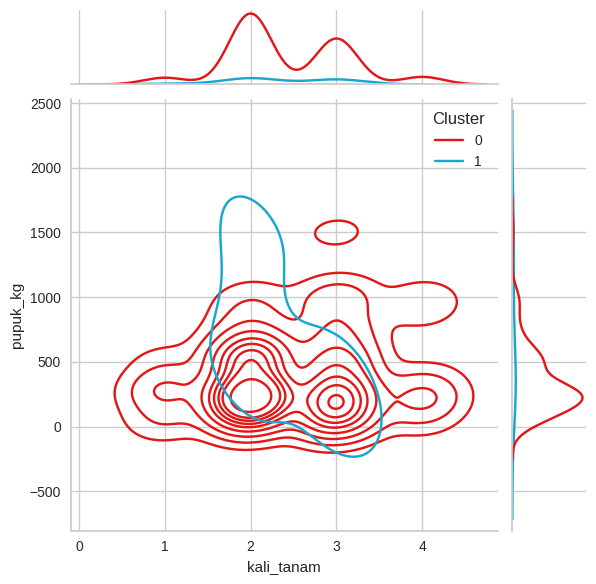

In [ ]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_Kmean4["pupuk_kg"], hue =df_Kmean4["Cluster"], kind="kde", palette=pal)
    plt.show()

Catatan
- 1 : Boyolali
- 2 : Demak
- 3 : Kendal
- 4 : Brebes
- 5 : Temanggung

Penjabaran Cluster :
- Cluster 0
  - luas lahan antara 0 - 5000 meter persegi
  - besaran panen 0 - 5000 kg dan maks 10000 kg
  - penggunaan bibit antara 0 - 1500 kg
  - lama menjadi petani antara 0 - 30 tahun
  - durasi penanaman yaitu 30, 60, maks 90 hari

- Cluster 1
  - luas lahan hingga 10000 meter persegi
  - besaran panen 0 - 3000 kg
  - penggunaan bibit antara 0 - 700 kg
  - lama menjadi petani antara 0 - 60 tahun
  - durasi penanaman yaitu 60 - 90 hari




In [ ]:
profile = ["Usia", 'Jenis Kelamin', "durasi_petani", "lama_tanam_hari", "luas_lahan", "pupuk_kg", "jenis_pupuk_organik", "jenis_pupuk_anorganik", "kali_tanam"]

<Figure size 800x550 with 0 Axes>

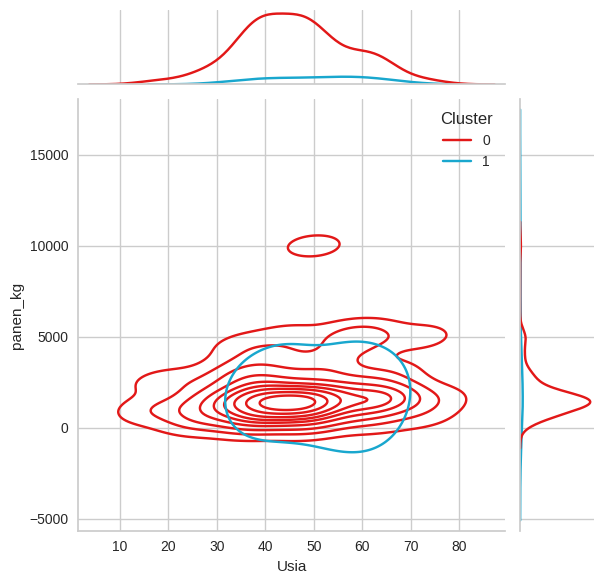

<Figure size 800x550 with 0 Axes>

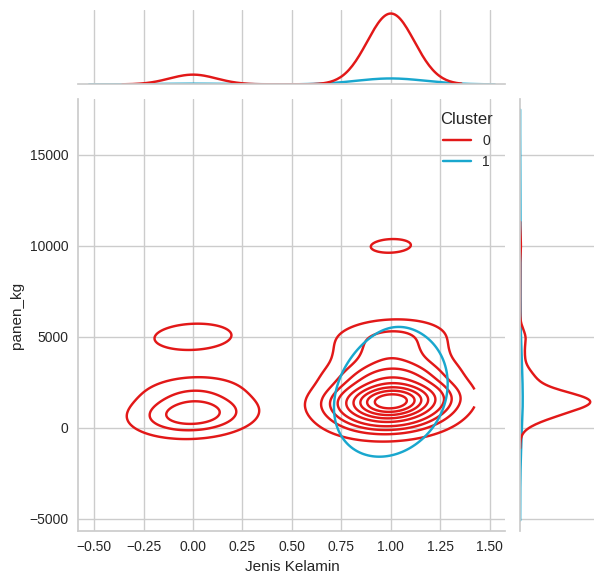

<Figure size 800x550 with 0 Axes>

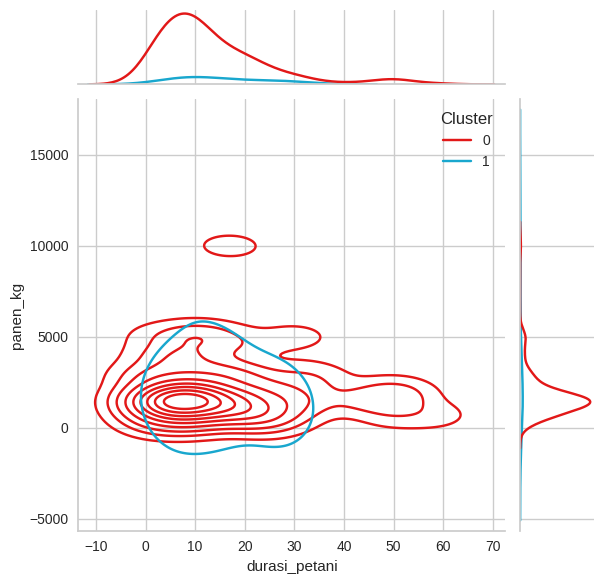

<Figure size 800x550 with 0 Axes>

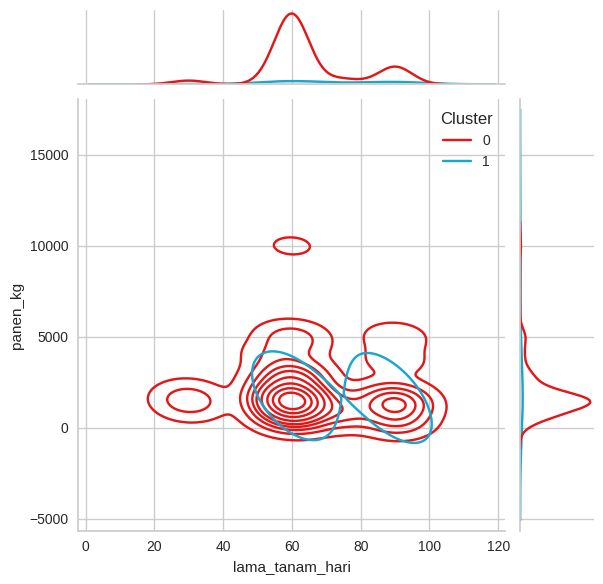

<Figure size 800x550 with 0 Axes>

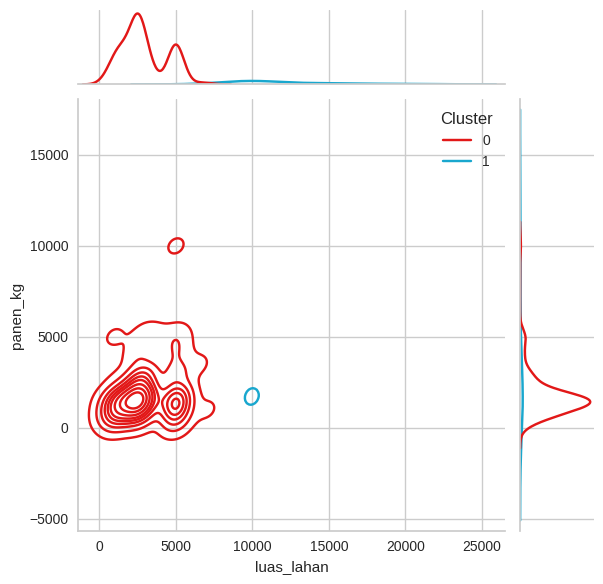

<Figure size 800x550 with 0 Axes>

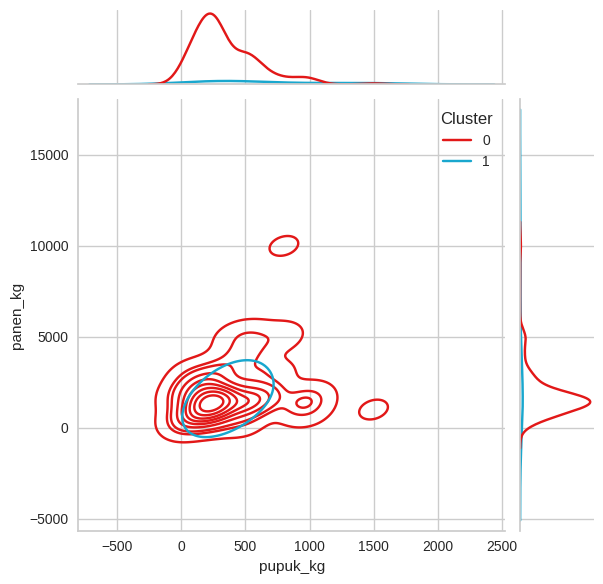

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

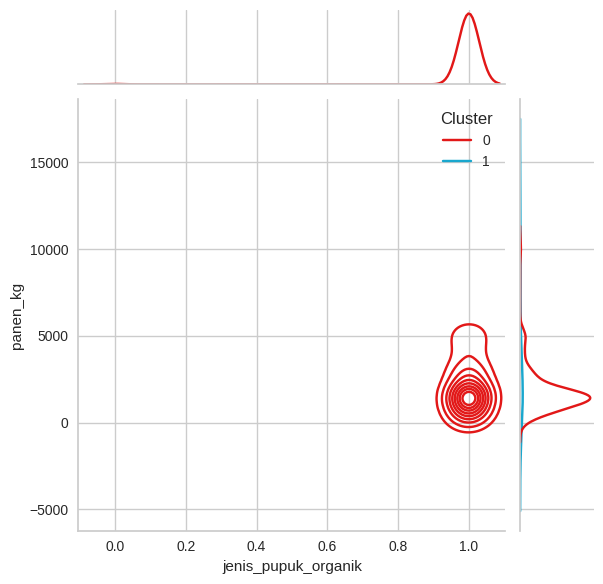

<Figure size 800x550 with 0 Axes>

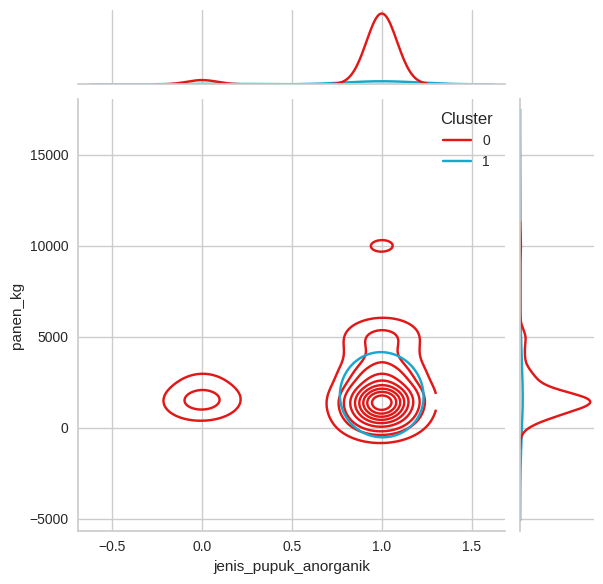

<Figure size 800x550 with 0 Axes>

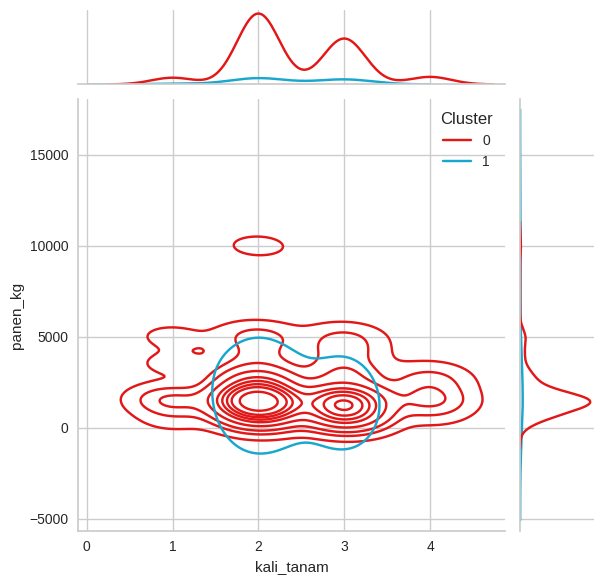

In [ ]:
for i in profile:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_Kmean4["panen_kg"], hue =df_Kmean4["Cluster"], kind="kde", palette=pal)
    plt.show()

Penjabaran cluster :
  - Cluster 0
    - Umur merata
    - Petani pria dan wanita masuk cluster ini
    - Cluster ini terdiri dari petani pemula hingga senior
    - biasa menanaman antara 30 hingga 90 hari
    - lahan relatif kecil
    - penggunaan pupuk lebih banyak
    - menggunakan 2 jenis pupuk yaitu organik dan anorganik
    - dalam sekali musim tanam rata-rata menanam bawang sebanyak 1 sampai 4 kali

  - Cluster 1
    - Umur lebih tua
    - Hanya petani pria yang ada di cluster ini
    - Cluster ini didominasi oleh petani pemula
    - biasa menanaman antara 60 hingga 90 hari
    - lahan relatif lebih luas
    - penggunaan pupuk relatif sedikit
    - menggunakan pupuk hanya jenis anorganik
    - dalam sekali musim tanam rata-rata menanam bawang sebanyak 2 sampai 3 kali

### Cek semua data berdasarkan kabupaten

In [ ]:
Personal_1 = ['Usia','Jenis Kelamin','Pendidikan Terakhir','durasi_petani','anggota_kelompok_tani','status_lahan_sendiri','status_lahan_bagi_hasil','status_lahan_sewa','luas_lahan','lama_tanam_hari',
              'panen_kg','kali_tanam',
              'bulan_tanam_januari','bulan_tanam_februari','bulan_tanam_maret','bulan_tanam_april','bulan_tanam_mei','bulan_tanam_juni','bulan_tanam_juli','bulan_tanam_agustus','bulan_tanam_september','bulan_tanam_oktober','bulan_tanam_november','bulan_tanam_desember','bibit_kg',
              'varietas_bima_brebes','varietas_batu_karet','varietas_bali_karet','varietas_batu_ijo','varietas_putih','varietas_garut','varietas_tanjuk','varietas_bima_jokowi','varietas_bima_juna','varietas_bima_curut','varietas_bima_jaya','varietas_nganjuk',
              'modal_tanam_sendiri','modal_tanam_pinjam','jenis_pupuk_organik','jenis_pupuk_anorganik',
              'sumber_pupuk_organik_bantuan','sumber_pupuk_organik_beli_dipeternak','sumber_pupuk_organik_kompos','sumber_pupuk_organik_buat_sendiri','sumber_pupuk_organik_kelompok_tani','sumber_pupuk_organik_toko_pertanian','sumber_pupuk_organik_kotoran_ayam','sumber_pupuk_organik_kotoran_sapi','sumber_pupuk_organik_kotoran_kambing','sumber_pupuk_organik_kotoran_hewan',
              'sumber_pupuk_anorganik_toko_pertanian','sumber_pupuk_anorganik_kelompok_tani','sumber_pupuk_anorganik_peternak',
              'merk_pupuk_bio_to_grow','merk_pupuk_dgw',
              'merk_pupuk_mutiara','merk_pupuk_meganic','merk_pupuk_phoska','merk_pupuk_saprodap','merk_pupuk_hcl','merk_pupuk_kamas','merk_pupuk_meroke','merk_pupuk_pak_tani','merk_pupuk_lao_ying','merk_pupuk_mkp','merk_pupuk_phonska','merk_pupuk_za','merk_pupuk_dap','merk_pupuk_golden_max','merk_pupuk_kcl','merk_pupuk_mahkota','merk_pupuk_npk','merk_pupuk_sp36','merk_pupuk_subur_kali','merk_pupuk_ksn','merk_pupuk_petroganik','merk_pupuk_luar_negeri','merk_pupuk_randex','merk_pupuk_urea','merk_pupuk_fosfat',
              'hama_engkuk','hama_lalat','hama_grandong','hama_ulat','hama_kutu','hama_tikus','hama_wereng','hama_amitra_nosa','hama_belalang','hama_serangga',
              'penyakit_akar_busuk','penyakit_trotol','penyakit_akar_rusak','penyakit_daun_busuk','penyakit_buah_busuk','penyakit_daun_layu','penyakit_busuk_batang','penyakit_daun_bercak','penyakit_daun_kemerahan','penyakit_umbi_busuk','penyakit_fusarium','penyakit_inul','penyakit_jamur','penyakit_mulet','penyakit_rencek','penyakit_semu_kuning','penyakit_krapak','penyakit_pohon_kering','penyakit_pucuk_menguning',
              'pengairan_hujan','pengairan_irigasi','pengairan_sungai','pengairan_mata_air','pengairan_sumur',
              'setelah_panen_dijual','setelah_panen_disimpan','setelah_panen_tebas',
              'jual_pasar','jual_pengepul','jual_penggoreng','jual_penebas','jual_ecer','jual_pedagang']

In [ ]:
# for i in Personal_1:
#     plt.figure()
#     sns.jointplot(x=df_clean[i], y=df_clean["kabupaten"], hue =df_Kmean4["Cluster"], kind="kde", palette=pal)
#     plt.show()

### Pak Farrikh

In [ ]:
Personal_2 = ['Usia','Jenis Kelamin','Pendidikan Terakhir','durasi_petani','anggota_kelompok_tani','status_lahan_sendiri','status_lahan_bagi_hasil','status_lahan_sewa','luas_lahan','lama_tanam_hari',
              'kali_tanam','kabupaten',
              'bulan_tanam_januari','bulan_tanam_februari','bulan_tanam_maret','bulan_tanam_april','bulan_tanam_mei','bulan_tanam_juni','bulan_tanam_juli','bulan_tanam_agustus','bulan_tanam_september','bulan_tanam_oktober','bulan_tanam_november','bulan_tanam_desember','bibit_kg',
              'varietas_bima_brebes','varietas_batu_karet','varietas_bali_karet','varietas_batu_ijo','varietas_putih','varietas_garut','varietas_tanjuk','varietas_bima_jokowi','varietas_bima_juna','varietas_bima_curut','varietas_bima_jaya','varietas_nganjuk',
              'modal_tanam_sendiri','modal_tanam_pinjam','jenis_pupuk_organik','jenis_pupuk_anorganik',
              'sumber_pupuk_organik_bantuan','sumber_pupuk_organik_beli_dipeternak','sumber_pupuk_organik_kompos','sumber_pupuk_organik_buat_sendiri','sumber_pupuk_organik_kelompok_tani','sumber_pupuk_organik_toko_pertanian','sumber_pupuk_organik_kotoran_ayam','sumber_pupuk_organik_kotoran_sapi','sumber_pupuk_organik_kotoran_kambing','sumber_pupuk_organik_kotoran_hewan',
              'sumber_pupuk_anorganik_toko_pertanian','sumber_pupuk_anorganik_kelompok_tani','sumber_pupuk_anorganik_peternak',
              'merk_pupuk_bio_to_grow','merk_pupuk_dgw',
              'merk_pupuk_mutiara','merk_pupuk_meganic','merk_pupuk_phoska','merk_pupuk_saprodap','merk_pupuk_hcl','merk_pupuk_kamas','merk_pupuk_meroke','merk_pupuk_pak_tani','merk_pupuk_lao_ying','merk_pupuk_mkp','merk_pupuk_phonska','merk_pupuk_za','merk_pupuk_dap','merk_pupuk_golden_max','merk_pupuk_kcl','merk_pupuk_mahkota','merk_pupuk_npk','merk_pupuk_sp36','merk_pupuk_subur_kali','merk_pupuk_ksn','merk_pupuk_petroganik','merk_pupuk_luar_negeri','merk_pupuk_randex','merk_pupuk_urea','merk_pupuk_fosfat',
              'hama_engkuk','hama_lalat','hama_grandong','hama_ulat','hama_kutu','hama_tikus','hama_wereng','hama_amitra_nosa','hama_belalang','hama_serangga',
              'penyakit_akar_busuk','penyakit_trotol','penyakit_akar_rusak','penyakit_daun_busuk','penyakit_buah_busuk','penyakit_daun_layu','penyakit_busuk_batang','penyakit_daun_bercak','penyakit_daun_kemerahan','penyakit_umbi_busuk','penyakit_fusarium','penyakit_inul','penyakit_jamur','penyakit_mulet','penyakit_rencek','penyakit_semu_kuning','penyakit_krapak','penyakit_pohon_kering','penyakit_pucuk_menguning',
              'pengairan_hujan','pengairan_irigasi','pengairan_sungai','pengairan_mata_air','pengairan_sumur',
              'setelah_panen_dijual','setelah_panen_disimpan','setelah_panen_tebas',
              'jual_pasar','jual_pengepul','jual_penggoreng','jual_penebas','jual_ecer','jual_pedagang']

In [ ]:
# for i in Personal_2:
#     plt.figure()
#     sns.jointplot(x=df_clean[i], y=df_clean["panen_kg"], hue =df_Kmean4["Cluster"], kind="kde", palette=pal)
#     plt.show()

Penjabaran Cluster
- CLuster 0
  - Kebanyakan berusia 40 - 50 tahun
  - Petani berjenis kelamin laki-laki dan perempuan
  - Pendidikan terakhir (skip)
  - lama menjadi petani antara 0 - 60 tahun (lebih senior)
  - ada yang anggota kelompok tani ada yang bukan anggota
  - sebagian memiliki lahan sendiri dan sebagian lain tidak memiliki lahan sendiri
  - sebagian menyewa lahan dan sebagian lain tidak menyewa lahan
  - sebagian besar tidak memilih lahan bagi hasil dan beberapa memilih bagi hasil
  - luas lahan yang dimiliki antara 2000 - 5000 meter persegi
  - rata-rata durasi tanam 30 - 90 hari
  - kali tanam (skip)
  - kabupaten (skip)
  - sebagian menanam pada bulan januari dan sebagian tidak menanam pada bulan januari
  - sebagian menanam pada bulan februari dan sebagian tidak menanam pada bulan februari
  - sebagian menanam pada bulan maret dan sebagian tidak menanam pada bulan maret
  - sebagian menanam pada bulan april dan sebagian tidak menanam pada bulan april
  - sebagian menanam pada bulan mei dan sebagian tidak menanam pada bulan mei
  - sebagian menanam pada bulan juni dan sebagian tidak menanam pada bulan juni
  - sebagian menanam pada bulan juli dan sebagian tidak menanam pada bulan juli
  - sebagian menanam pada bulan agustus dan sebagian tidak menanam pada bulan agustus
  - sebagian menanam pada bulan september dan sebagian tidak menanam pada bulan september
  - sebagian menanam pada bulan oktober dan sebagian tidak menanam pada bulan oktober
  - sebagian menanam pada bulan november dan sebagian tidak menanam pada bulan november
  - sebagian menanam pada bulan desember dan sebagian tidak menanam pada bulan desember
  - bibit (skip)
  - sebagian menggunakan varietas bima brebes dan sebagian tidak menggunakan varietas bima brebes
  - sebagian menggunakan varietas batu karet dan sebagian tidak menggunakan varietas batu karet
  - sebagian menggunakan varietas bali karet dan sebagian tidak menggunakan varietas bali karet
  - sebagian menggunakan varietas batu ijo dan sebagian tidak menggunakan varietas batu ijo
  - sebagian menggunakan varietas putih dan sebagian tidak menggunakan varietas putih
  - tidak menggunakan varietas garut
  - tidak menggunakan varietas tanjuk
  - sebagian menggunakan varietas bima jokowi dan sebagian tidak menggunakan varietas bima jokowi
  - sebagian menggunakan varietas bima juna dan sebagian tidak menggunakan varietas bima juna
  - sebagian menggunakan varietas bima curut dan sebagian tidak menggunakan varietas bima curut
  - sebagian menggunakan varietas bima jaya dan sebagian tidak menggunakan varietas bima jaya
  - menggunakan modal tanam sendiri dan tidak menggunakan modal tanam sendiri
  - menggunakan modal tanam pinjam dan tidak menggunakan modal tanam pinjam
  - menggunakan pupuk jenis organik
  - menggunakan pupuk jenis anorganik dan tidak menggunakan pupuk jenis anorganik
  - tidak menggunakan pupuk organik dari bantuan pemerintah
  - sebagian menggunakan pupuk organik dari peternak dan sebagian tidak menggunakan pupuk organik dari peternak
  - sebagian menggunakan pupuk organik kompos dan sebagian tidak menggunakan pupuk organik kompos
  - tidak menggunakan pupuk organik yang dibuat sendiri
  - sebagian menggunakan pupuk organik dari kelompok tani dan sebagian tidak menggunakan pupuk organik dari kelompok tani
  - sebagian menggunakan pupuk organik dari toko pertanian dan sebagian tidak menggunakan pupuk organik dari toko pertanian
  - sebagian menggunakan pupuk organik dari kotoran ayam dan sebagian tidak menggunakan pupuk organik dari kotoran ayam
  - sebagian menggunakan pupuk organik dari kotoran sapi dan sebagian tidak menggunakan pupuk organik dari kotoran sapi
  - sebagian menggunakan pupuk organik dari kotoran kambing dan sebagian tidak menggunakan pupuk organik dari kotoran kambing
  - sebagian menggunakan pupuk organik dari kotoran hewan dan sebagian tidak menggunakan pupuk organik dari kotoran hewan
  - sebagian menggunakan pupuk anorganik dari toko pertanian dan sebagian tidak menggunakan pupuk anorganik dari toko pertanian
  - sebagian menggunakan pupuk anorganik dari kelompok tani dan sebagian tidak menggunakan pupuk anorganik dari kelompok tani
  - tidak menggunakan pupuk anorganik dari peternak
  - sebagian menggunakan pupuk merk bio to grow dan sebagian tidak menggunakan pupuk merk bio to grow
  - tidak menggunakan pupuk merk DGW
  - sebagian menggunakan pupuk merk mutiara dan sebagian tidak menggunakan pupuk merk mutiara
  - tidak menggunakan pupuk merk meganic
  - sebagian menggunakan pupuk merk phoska dan sebagian tidak menggunakan pupuk merk phoska
  - sebagian menggunakan pupuk merk saprodap dan sebagian tidak menggunakan pupuk merk saprodap
  - tidak menggunakan pupuk merk HCL
  - sebagian menggunakan pupuk merk kamas dan sebagian tidak menggunakan pupuk merk kamas
  - tidak menggunakan pupuk merk meroke
  - tidak menggunakan pupuk merk pak tani
  - tidak menggunakan pupuk merk lao ying
  - sebagian menggunakan pupuk merk MKP dan sebagian tidak menggunakan pupuk merk MKP
  - sebagian menggunakan pupuk merk phonska dan sebagian tidak menggunakan pupuk merk phonska
  - sebagian menggunakan pupuk merk ZA dan sebagian tidak menggunakan pupuk merk ZA
  - sebagian menggunakan pupuk merk DAP dan sebagian tidak menggunakan pupuk merk DAP
  - sebagian menggunakan pupuk merk golden max dan sebagian tidak menggunakan pupuk merk golden max
  - tidak menggunakan pupuk merk KCL
  - tidak menggunakan pupuk merk mahkota
  - sebagian menggunakan pupuk merk NPK dan sebagian tidak menggunakan pupuk merk NPK
  - sebagian menggunakan pupuk merk SP 36 dan sebagian tidak menggunakan pupuk merk SP 36
  -
  -
  -
  -
  -
  -
  -


- Cluster 1
  - Kebanyakan berusia (skip)
  - Petani berjenis kelamin laki-laki saja
  - Pendidikan terakhir (skip)
  - lama menjadi petani antara 0 - 30 tahun
  - merupakan anggota kelompok tani
  - memiliki lahan sendiri
  - tidak memiliki lahan sewa
  - tidak memilih lahan bagi hasil
  - luas lahan yang dimiliki 10000 meter persegi
  - rata-rata durasi tanam 60 - 90 hari
  - kali tanam (skip)
  - kabupaten (skip)
  - tidak menanam pada bulan januari
  - tidak menanam pada bulan februari
  - tidak menanam pada bulan maret
  - tidak menanam pada bulan april
  - tidak menanam pada bulan mei
  - tidak menanam pada bulan juli
  - sebagian menanam pada bulan september dan sebagian tidak menanam pada bulan september
  - tidak menanam pada bulan november
  - tidak menanam pada bulan desember
  - bibit (skip)
   bibit (skip)
  - sebagian menggunakan varietas bima brebes dan sebagian tidak menggunakan varietas bima brebes
  - tidak menggunakan varietas batu karet
  - tidak menggunakan varietas bali karet
  - tidak menggunakan varietas batu ijo
  - tidak menggunakan varietas bima jokowi
  - tidak menggunakan varietas bima juna
  - tidak menggunakan varietas bima curut
  - tidak menggunakan varietas bima jaya
  - sebagian menggunakan varietas nganjuk dan sebagian tidak menggunakan varietas nganjuk
  - menggunakan modal tanam sendiri dan tidak menggunakan modal tanam sendiri
  - menggunakan modal tanam pinjam dan tidak menggunakan modal tanam pinjam
  - menggunakan pupuk jenis anorganik
  - tidak menggunakan pupuk dari peternak
  - tidak menggunakan pupuk kompos
  - tidak menggunakan pupuk dari kelompok tani
  - sebagian menggunakan pupuk organik dari toko pertanian dan sebagian tidak menggunakan pupuk organik dari toko pertanian
  - tidak menggunakan pupuk organik dari kotoran ayam
  - tidak menggunakan pupuk organik dari kotoran sapi
  - tidak menggunakan pupuk organik dari kotoran hewan
  - menggunakan pupuk anorganik dari toko pertanian
  - sebagian menggunakan pupuk anorganik dari kelompok tani dan sebagian tidak menggunakan pupuk anorganik dari kelompok tani
  - sebagian menggunakan pupuk merk DGW dan sebagian tidak menggunakan pupuk merk DGW
  - sebagian menggunakan pupuk merk mutiara dan sebagian tidak menggunakan pupuk merk mutiara
  - tidak menggunakan pupuk merk phoska
  - tidak menggunakan pupuk merk MKP
  - tidak menggunakan pupuk merk phonska
  - tidak menggunakan pupuk merk ZA
  - tidak menggunakan pupuk merk NPK
  - tidak menggunakan pupuk merk SP 36
  -
  -
  -
  -

# Penyimpanan


In [ ]:
# import joblib

In [ ]:
# # save the model to disk
# joblib.dump(KM, '/content/drive/My Drive/Colab Notebooks/cluster_kmeans_v1_rizal.sav', compress=1)